In [1]:
%matplotlib inline

from HeaderP import *
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import math
plt.rcParams.keys()
plt.rc('font', family='serif')
params = {
   'axes.labelsize': 30,
   'axes.linewidth': 1.5,
   'legend.fontsize': 25,
   'legend.frameon': False,
   'lines.linewidth': 2,
   'xtick.direction': 'in',
   'xtick.labelsize': 25,
   'xtick.major.bottom': True,
   'xtick.major.pad': 10,
   'xtick.major.size': 10,
   'xtick.major.width': 1,
   'xtick.minor.bottom': True,
   'xtick.minor.pad': 3.5,
   'xtick.minor.size': 5,
   'xtick.minor.top': True,
   'xtick.minor.visible': True,
   'xtick.minor.width': 1,
   'xtick.top': True,
   'ytick.direction': 'in',
   'ytick.labelsize': 25,
   'ytick.major.pad': 10,
   'ytick.major.size': 10,
   'ytick.major.width': 1,
   'ytick.minor.pad': 3.5,
   'ytick.minor.size': 5,
   'ytick.minor.visible': True,
   'ytick.minor.width': 1,
   'ytick.right': True,
   'figure.figsize': [10,10], # instead of 4.5, 4.5
   'savefig.format': 'eps',
   }
plt.rcParams.update(params)


def radiusTrend(df_abun_st_ha,df_abun_st_la,agebin,start,end,figname):
    abun_apog=['M_H','C_FE','N_FE','O_FE','NA_FE','MG_FE','AL_FE','SI_FE','S_FE','K_FE','CA_FE','TI_FE',
           'V_FE','MN_FE','NI_FE','P_FE','CR_FE','CO_FE']
    
    abun_apog_err=[i+'_ERR' for i in abun_apog]

    abund={'C_FE':'[C/','MG_FE':'[Mg/','AL_FE':'[Al/','SI_FE':'[Si/','S_FE':'[Sc/',
       'CA_FE':'[Ca/','TI_FE':'[Ti/','CR_FE':'[Cr/','MN_FE':'[Mn/','CO_FE':'[Co/',
       'NI_FE':'[Ni/','CU_FE':'[Cu/','O_FE':'[O/','NA_FE':'[Na/','K_FE':'[K/','V_FE':'[V/',
       'P_FE':'[P/','RB_FE':'[Rb/','N_FE':'[N/','S_FE':'[S/','M_H':'[Fe/'}
    
    size=int(np.ceil((end-start)/agebin))
    age_binned=[(2*j+1)*agebin/2+start for j in range(size)]
    
    plt.figure(figsize=(30,25))
    for i in range(len(abun_apog)):
        clear_output(wait = True)
        df_plot_ha=df_abun_st_ha.loc[df_abun_st_ha[abun_apog[i]]>-100]
        df_plot_ha=df_plot_ha.loc[df_plot_ha['Age']<10]
        df_plot_ha=df_plot_ha.loc[df_plot_ha['Age_err']<10]
        df_plot_ha=df_plot_ha.reset_index(drop=True)

        df_plot_la=df_abun_st_la.loc[df_abun_st_la[abun_apog[i]]>-100]
        df_plot_la=df_plot_la.loc[df_plot_la['Age']<10]
        df_plot_la=df_plot_la.loc[df_plot_la['Age_err']<10]
        df_plot_la=df_plot_la.reset_index(drop=True)
            
        
        plt.subplot(5,4,i+1)

        z = np.polyfit(df_plot_la['Age'].values,df_plot_la['M_H'].values,2)
        p_la = np.poly1d(z)
        z = np.polyfit(df_plot_ha['Age'].values,df_plot_ha['M_H'].values,2)
        p_ha = np.poly1d(z)
        
        if len(df_plot_la['Age'])!=0:   
            print(abun_apog[i])

            slope_la=[]
            slope_ha=[]
            slope_la_err=[]
            slope_ha_err=[]
            
            slope_starn_la=[]
            slope_starn_ha=[]
            
            for j in range(size):
                agemin=j*agebin+start
                agemax=(j+1)*agebin+start

                new_df_inbin_la=df_plot_la.loc[df_plot_la['R']>agemin]
                new_df_inbin_la=new_df_inbin_la.loc[new_df_inbin_la['R']<agemax]

                new_df_inbin_ha=df_plot_ha.loc[df_plot_ha['R']>agemin]
                new_df_inbin_ha=new_df_inbin_ha.loc[new_df_inbin_ha['R']<agemax]
                print(len(new_df_inbin_la),len(new_df_inbin_ha))
                
                slope_starn_la.append(len(new_df_inbin_la))
                slope_starn_ha.append(len(new_df_inbin_ha))

                la_slope=np.zeros(500)
                ha_slope=np.zeros(500)
                
                laage=new_df_inbin_la['Age'].values
                laabund=new_df_inbin_la[abun_apog[i]].values
                laage_err=new_df_inbin_la['Age_err'].values
                laabund_err=new_df_inbin_la[abun_apog[i]+'_ERR'].values
                
                haage=new_df_inbin_ha['Age'].values
                haabund=new_df_inbin_ha[abun_apog[i]].values
                haage_err=new_df_inbin_ha['Age_err'].values
                haabund_err=new_df_inbin_ha[abun_apog[i]+'_ERR'].values
                
                
                for ii in range(500):
                    new_df_inbin_la['newage']=np.array([np.random.normal(laage[k], laage_err[k],1)[0] for k in range(len(laage))])
                    new_df_inbin_la['newabun']=np.array([np.random.normal(laabund[k], laabund_err[k],1)[0] for k in range(len(laabund))])
                    new_df_inbin_ha['newage']=np.array([np.random.normal(haage[k], haage_err[k],1)[0] for k in range(len(haage))])
                    new_df_inbin_ha['newabun']=np.array([np.random.normal(haabund[k], haabund_err[k],1)[0] for k in range(len(haabund))])
                    
                    if len(new_df_inbin_la)<10:
                        la_slope[ii]=np.nan
                    else:
                        z = np.polyfit(new_df_inbin_la['newage'].values,new_df_inbin_la['newabun'].values,1,w=1/(laabund_err**2+laage_err**2))
                        la_slope[ii]=z[0]
                    if len(new_df_inbin_ha)<10:
                        ha_slope[ii]=np.nan
                    else:
                        z = np.polyfit(new_df_inbin_ha['newage'].values,new_df_inbin_ha['newabun'].values,1,w=1/(haabund_err**2+haage_err**2))
                        ha_slope[ii]=z[0]
                
                if len(new_df_inbin_la)<10:
                    slope_la.append(np.nan)
                else:
                    z = np.polyfit(new_df_inbin_la['Age'].values,new_df_inbin_la[abun_apog[i]].values,1)
                    slope_la.append(z[0])
                if len(new_df_inbin_ha)<10:
                    slope_ha.append(np.nan)
                else:
                    z = np.polyfit(new_df_inbin_ha['Age'].values,new_df_inbin_ha[abun_apog[i]].values,1)
                    slope_ha.append(z[0])
                
                if math.isnan(la_slope[0]):
                    slope_la_err.append(np.nan)
                else:
                    slope_la_err.append(np.std(la_slope))
                if math.isnan(ha_slope[0]):
                    slope_ha_err.append(np.nan)
                else:
                    slope_ha_err.append(np.std(ha_slope))
            
            age_binned,slope_la,slope_la_err,slope_starn_la=np.array(age_binned),np.array(slope_la),np.array(slope_la_err),np.array(slope_starn_la)
            slope_ha,slope_ha_err,slope_starn_ha=np.array(slope_ha),np.array(slope_ha_err),np.array(slope_starn_ha)
            
            plt.errorbar(age_binned,slope_la,yerr=slope_la_err,
                         fmt='b-o',label='low-$\\alpha$',capsize=10)
            plt.errorbar(age_binned,slope_ha,yerr=slope_ha_err,
                         fmt='r-o',label='high-$\\alpha$',capsize=10)
            
            
            
            if abun_apog[i]=='M_H':
                plt.ylabel('Fe')
            else:
                plt.ylabel(abund[abun_apog[i]]+'Fe]')
            plt.xlabel('R [kpc]')
            ax2=plt.twinx()
            ax2.bar(age_binned,slope_starn_ha,color='r',alpha=0.2)
            ax2.bar(age_binned,slope_starn_la,color='b',alpha=0.2)
            ax2.set_ylabel('# of stars')
        
        plt.xlabel('Radius bin center [kpc]')
        plt.tight_layout()
        plt.savefig(figname)

# Training set

In [2]:
df_age=pd.read_pickle('training.pkl')

In [3]:
len(df_age)

2616

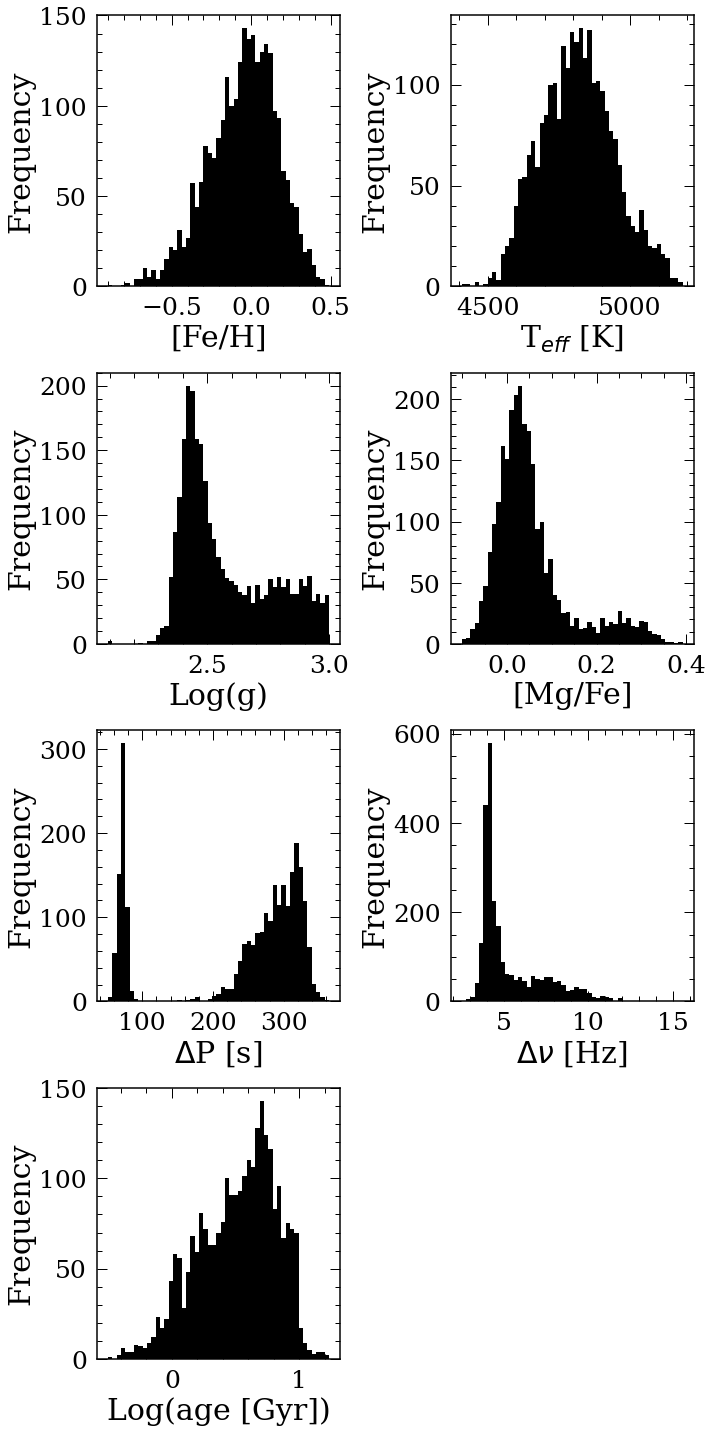

In [4]:
TF=['M_H','TEFF','LOGG','MG_FE','DPi1','Dnu','LogAge']
df_age['LogAge']=np.log10(np.power(10,df_age['LogAge'])/1000)
titles=['[Fe/H]','T$_{eff}$ [K]','Log(g)','[Mg/Fe]','$\Delta$P [s]','$\Delta$$\\nu$ [Hz]','Log(age [Gyr])']
plt.figure(figsize=(10,20))
for i in range(1,8):
    plt.subplot(4,2,i)
    plt.hist(df_age[TF[i-1]],color='k',bins=int(np.sqrt(len(df_age))))
    plt.xlabel(titles[i-1])
    plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('TraningHist.png')

Ages from https://ui.adsabs.harvard.edu/abs/2019yCat..22390032P/abstract

# For AS stars

In [5]:
df=pd.read_pickle('../ASstars.pkl')
print(len(df))
print(np.median(df['Age_err'].dropna()))

6727
0.8777411473258232


1601 5109


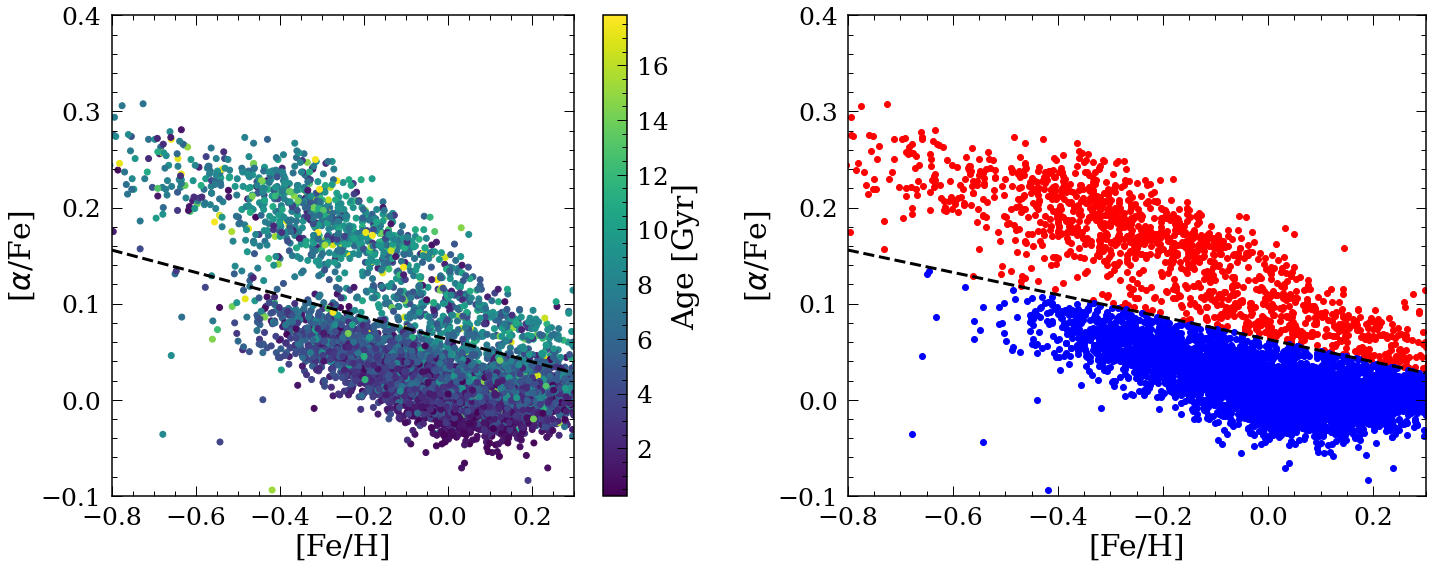

In [6]:
p=fitpoints([-0.75,0.11],[0.15,0.05])

plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
cm = plt.cm.get_cmap('viridis',5)
plt.scatter(df['FeH'],df['AFe'],c=df['Age'])
plt.plot([-0.8,0.3],p([-0.8,0.3]),'k--',linewidth=3)
plt.xlim([-0.8,0.3])
plt.ylim([-0.1,0.4])
plt.xlabel('[Fe/H]')
plt.ylabel('[$\\alpha$/Fe]')
cb=plt.colorbar()
cb.set_label('Age [Gyr]')


high_alpha=df[df['AFe']-p(df['FeH'])>=0]
low_alpha=df[df['AFe']-p(df['FeH'])<0]

print(len(high_alpha),len(low_alpha))

p=fitpoints([-0.75,0.11],[0.15,0.05])

plt.subplot(1,2,2)
plt.scatter(high_alpha['FeH'],high_alpha['AFe'],c='r')
plt.scatter(low_alpha['FeH'],low_alpha['AFe'],c='b')
plt.plot([-0.8,0.3],p([-0.8,0.3]),'k--',linewidth=3)
plt.xlim([-0.8,0.3])
plt.ylim([-0.1,0.4])
plt.xlabel('[Fe/H]')
plt.ylabel('[$\\alpha$/Fe]')

plt.tight_layout()

In [7]:
df_abun_st_ha=high_alpha.loc[abs(high_alpha['M_H']-0.1)<0.05]
df_abun_st_la=low_alpha.loc[abs(low_alpha['M_H']-0.1)<0.05]

In [8]:
#radiusTrend(df_abun_st_ha,df_abun_st_la,1,3,13)


# For rc stars

In [42]:
abun_apog=['M_H','C_FE','N_FE','O_FE','NA_FE','MG_FE','AL_FE','SI_FE','S_FE','K_FE','CA_FE','TI_FE',
           'V_FE','MN_FE','NI_FE','P_FE','CR_FE','CO_FE','ALPHA_M']
print(len(abun_apog))

19


In [43]:
df_CM=pd.read_pickle('../CannonDR16_cut.pkl')
for i in abun_apog:
    df_CM=df_CM.loc[abs(df_CM[i])<5]
df_CM=df_CM.reset_index(drop=True)

print('All stars:',len(df_CM))

# get red clump stars
df_rc=df_CM.loc[df_CM['DP']>230]


print('rc stars',len(df_rc))

All stars: 64317
rc stars 22031


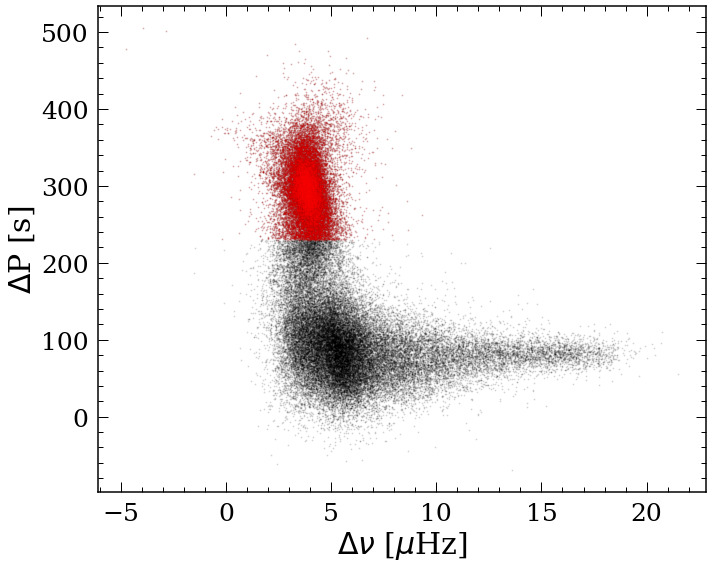

In [44]:
plt.figure(figsize=(10,8))
plt.scatter(df_CM['Dnu'],df_CM['DP'],c='k',s=1,alpha=0.1,label='all stars')
plt.scatter(df_rc['Dnu'],df_rc['DP'],c='r',s=1,alpha=0.1,label='Red Clump stars')
plt.xlabel('$\Delta$$\\nu$ [$\mu$Hz]')
plt.ylabel('$\Delta$P [s]')
plt.tight_layout()
plt.savefig('RCdet.png')

In [45]:
np.mean(df_CM['LogAge_err']+0.17)

0.24652228844275806

In [46]:
df_CM['Age_err']=(np.power(10,df_CM['LogAge']+df_CM['LogAge_err']+0.17)-
                  np.power(10,df_CM['LogAge']-df_CM['LogAge_err']-0.17))/2/1000


In [47]:
la=df_CM[df_CM['hi_low_line']==0]
ha=df_CM[df_CM['hi_low_line']==1]

In [48]:
np.mean(df_CM['Age']),np.std(df_CM['Age'])

(6.263124030660083, 3.293839005500926)

2480 2480


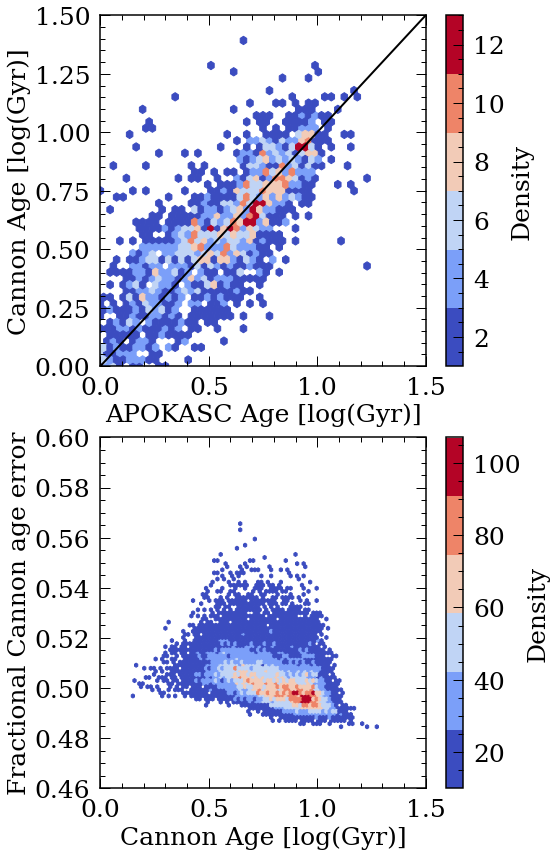

In [49]:
orig=np.load('../orig.npy')
cannon=np.load('../cannon.npy')
print(len(orig),len(cannon))
    
# calculate bias and scatter
scatter = np.round(np.std(orig-cannon),5)
bias  = np.round(np.mean(orig-cannon),5)


cm = plt.cm.get_cmap('coolwarm',6)

plt.figure(figsize=(8,12))
plt.subplot(2,1,1)
plt.plot([0, 1.5], [0, 1.5], 'k-', linewidth=2.0, label="x=y")
plt.xlim(0, 1.5)
plt.ylim(0, 1.5)

h = plt.hexbin(orig, cannon, cmap=cm, gridsize=50, mincnt = 1, extent=(0,1.5,0,1.5))
cbar = plt.colorbar(h)
car = cbar.set_label('Density',fontsize = 25,labelpad = 5)

plt.xlabel("APOKASC Age [log(Gyr)]", fontsize=25)
plt.ylabel("Cannon Age [log(Gyr)]", fontsize=25)
plt.tight_layout()

diff = cannon-orig
npoints = len(diff)
mu = np.mean(diff)
sig = np.std(diff)

plt.subplot(2,1,2)
df=pd.read_pickle('../CannonDR16_cut.pkl')

h = plt.hexbin(np.log10(df['Age']), df['Age_err']/df['Age'], cmap=cm, 
               extent=(0,1.5,0.46,0.6), gridsize=100, mincnt = 10)
cbar = plt.colorbar(h)
car = cbar.set_label('Density',fontsize = 25,labelpad = 5)

plt.xlabel("Cannon Age [log(Gyr)]", fontsize=25)
plt.ylabel("Fractional Cannon age error", fontsize=25)
plt.tight_layout()
plt.ylim([0.46,0.6])
plt.xlim([0,1.5])

plt.savefig('Age_cv.png')

In [50]:
print(np.mean(la['Age']),np.std(la['Age']))
print(np.mean(ha['Age']),np.std(ha['Age']))

5.394826336614512 2.887607618409482
8.798635856205737 3.09056952062504


In [51]:
(sum(la['Age']>8))/len(la)
la_old=la.loc[~(la['Age']>8)].reset_index()

In [52]:
(sum(ha['Age']<5))/len(ha)
ha_young=ha.loc[~(ha['Age']<5)].reset_index()

In [53]:
import random
testN=500
perc=np.zeros((testN,2))
oldage_la, oldage_err_la=la_old['Age'].values,la_old['Age_err'].values
oldage_ha, oldage_err_ha=ha_young['Age'].values,ha_young['Age_err'].values
for i in range(testN):
    newageLa=np.array([random.gauss(oldage_la[j],oldage_err_la[j]) for j in range(len(oldage_la))])
    newageHa=np.array([random.gauss(oldage_ha[j],oldage_err_ha[j]) for j in range(len(oldage_ha))])
    perc[i,0]=(sum(newageLa>8))/len(newageLa)
    perc[i,1]=(sum(newageHa<5))/len(newageHa)

old low-$\alpha$ 0.146053540672211 0.0016087347045915992
young high-$\alpha$ 0.2458924464192368 0.0032024619722008404


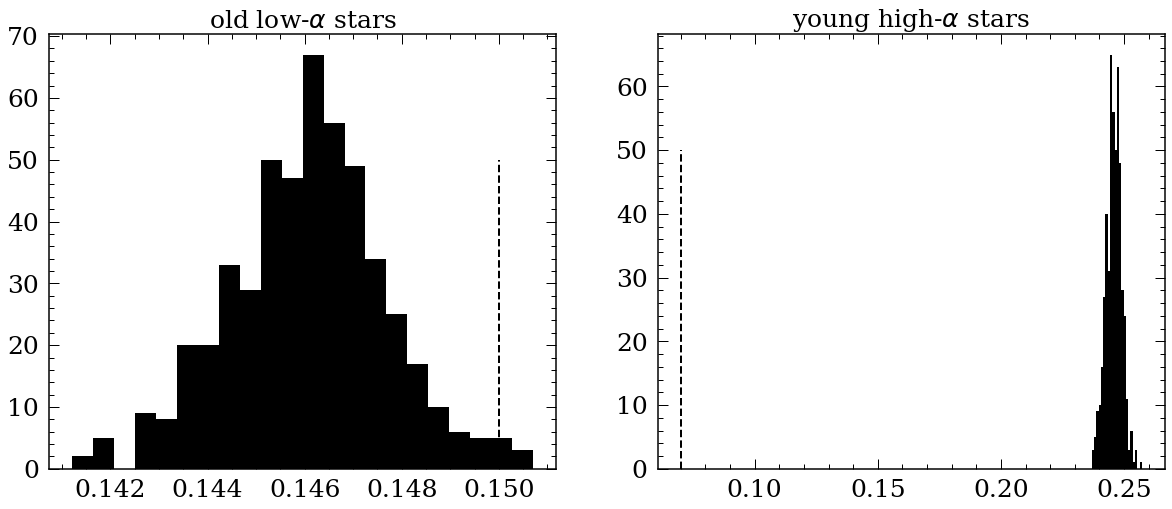

In [54]:
# test how many stars stayed in the young/old regine after perturbing with error
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.hist(perc[:,0],bins=int(np.sqrt(testN)),color='k')
plt.plot([0.15,0.15],[0,50],'k--')
plt.title('old low-$\\alpha$ stars',fontsize=25)
print('old low-$\\alpha$',np.mean(perc[:,0]),np.std(perc[:,0]))

plt.subplot(1,2,2)
plt.hist(perc[:,1],bins=int(np.sqrt(testN)),color='k')
plt.plot([0.07,0.07],[0,50],'k--')
plt.title('young high-$\\alpha$ stars',fontsize=25)
print('young high-$\\alpha$',np.mean(perc[:,1]),np.std(perc[:,1]))

## Plot age image

# screwness

In [55]:
df_CM=pd.read_pickle('../CannonDR16_cut.pkl')



In [56]:
from scipy.stats import skew
def calcaverage(df):
    #xgrit=np.linspace(min(df['R']),max(df['R']),50)
    #ygrit=np.linspace(min(df['z']),max(df['z']),50)
    r_range=50
    z_range=25
    R=np.linspace(0,20,r_range)
    z=np.linspace(-5,5,z_range)
    R_grid=[]
    z_grid=[]
    age_grid=[]
    count=0
    for i in trange(r_range-1):
        for j in range(z_range-1):
            R_grid.append((R[i]+R[i+1])/2.)
            z_grid.append((z[j]+z[j+1])/2.)
            
            df_grid=df.loc[df['R']>R[i]]
            #print(len(df_grid))
            df_grid=df_grid.loc[df_grid['R']<R[i+1]]
            #print(len(df_grid))
            df_grid=df_grid.loc[df_grid['z']>z[j]]
            #print(len(df_grid))
            df_grid=df_grid.loc[df_grid['z']<z[j+1]]
            #print(len(df_grid))
            
            df_grid=df_grid.dropna(subset=['M_H'])
            if len(df_grid)>20:
                #age_grid.append(3*(np.mean(df_grid['M_H'])-np.median(df_grid['M_H']))/np.std(df_grid['M_H']))
                age_grid.append(skew(df_grid['M_H'].values))
                #print(skew(df_grid['M_H'].values))
            else:
                age_grid.append(np.nan)
            #print(df_grid['Age'])
    #print(age_grid)
    return R_grid,z_grid,age_grid

In [57]:
#R_grid,z_grid,screwness=calcaverage(df_CM)

In [58]:
#R_grid,z_grid,screwness_la=calcaverage(df_CM.loc[df_CM['hi_low_line']==0].reset_index(drop=True))

In [59]:
#R_grid,z_grid,screwness_ha=calcaverage(df_CM.loc[df_CM['hi_low_line']==1].reset_index(drop=True))

In [60]:
#skrewness=pd.DataFrame(np.array((R_grid,z_grid,screwness,screwness_la,screwness_ha)).T,columns=['R','z','skew','skew_la','skew_ha'])
#skrewness.to_pickle('../skewness_scipy.pkl')
#skrewness


In [61]:
skrewness=pd.read_pickle('../skewness_scipy.pkl')

0.1821121796965599 0.18760032117865336


/Users/yl4331/Desktop/SecondYear/Figures/HeaderP.py:1174: RuntimeWarning: invalid value encountered in true_divide
  image = hist1/hist1_norm
/Users/yl4331/Desktop/SecondYear/Figures/HeaderP.py:1174: RuntimeWarning: invalid value encountered in true_divide
  image = hist1/hist1_norm
/Users/yl4331/Desktop/SecondYear/Figures/HeaderP.py:1174: RuntimeWarning: invalid value encountered in true_divide
  image = hist1/hist1_norm


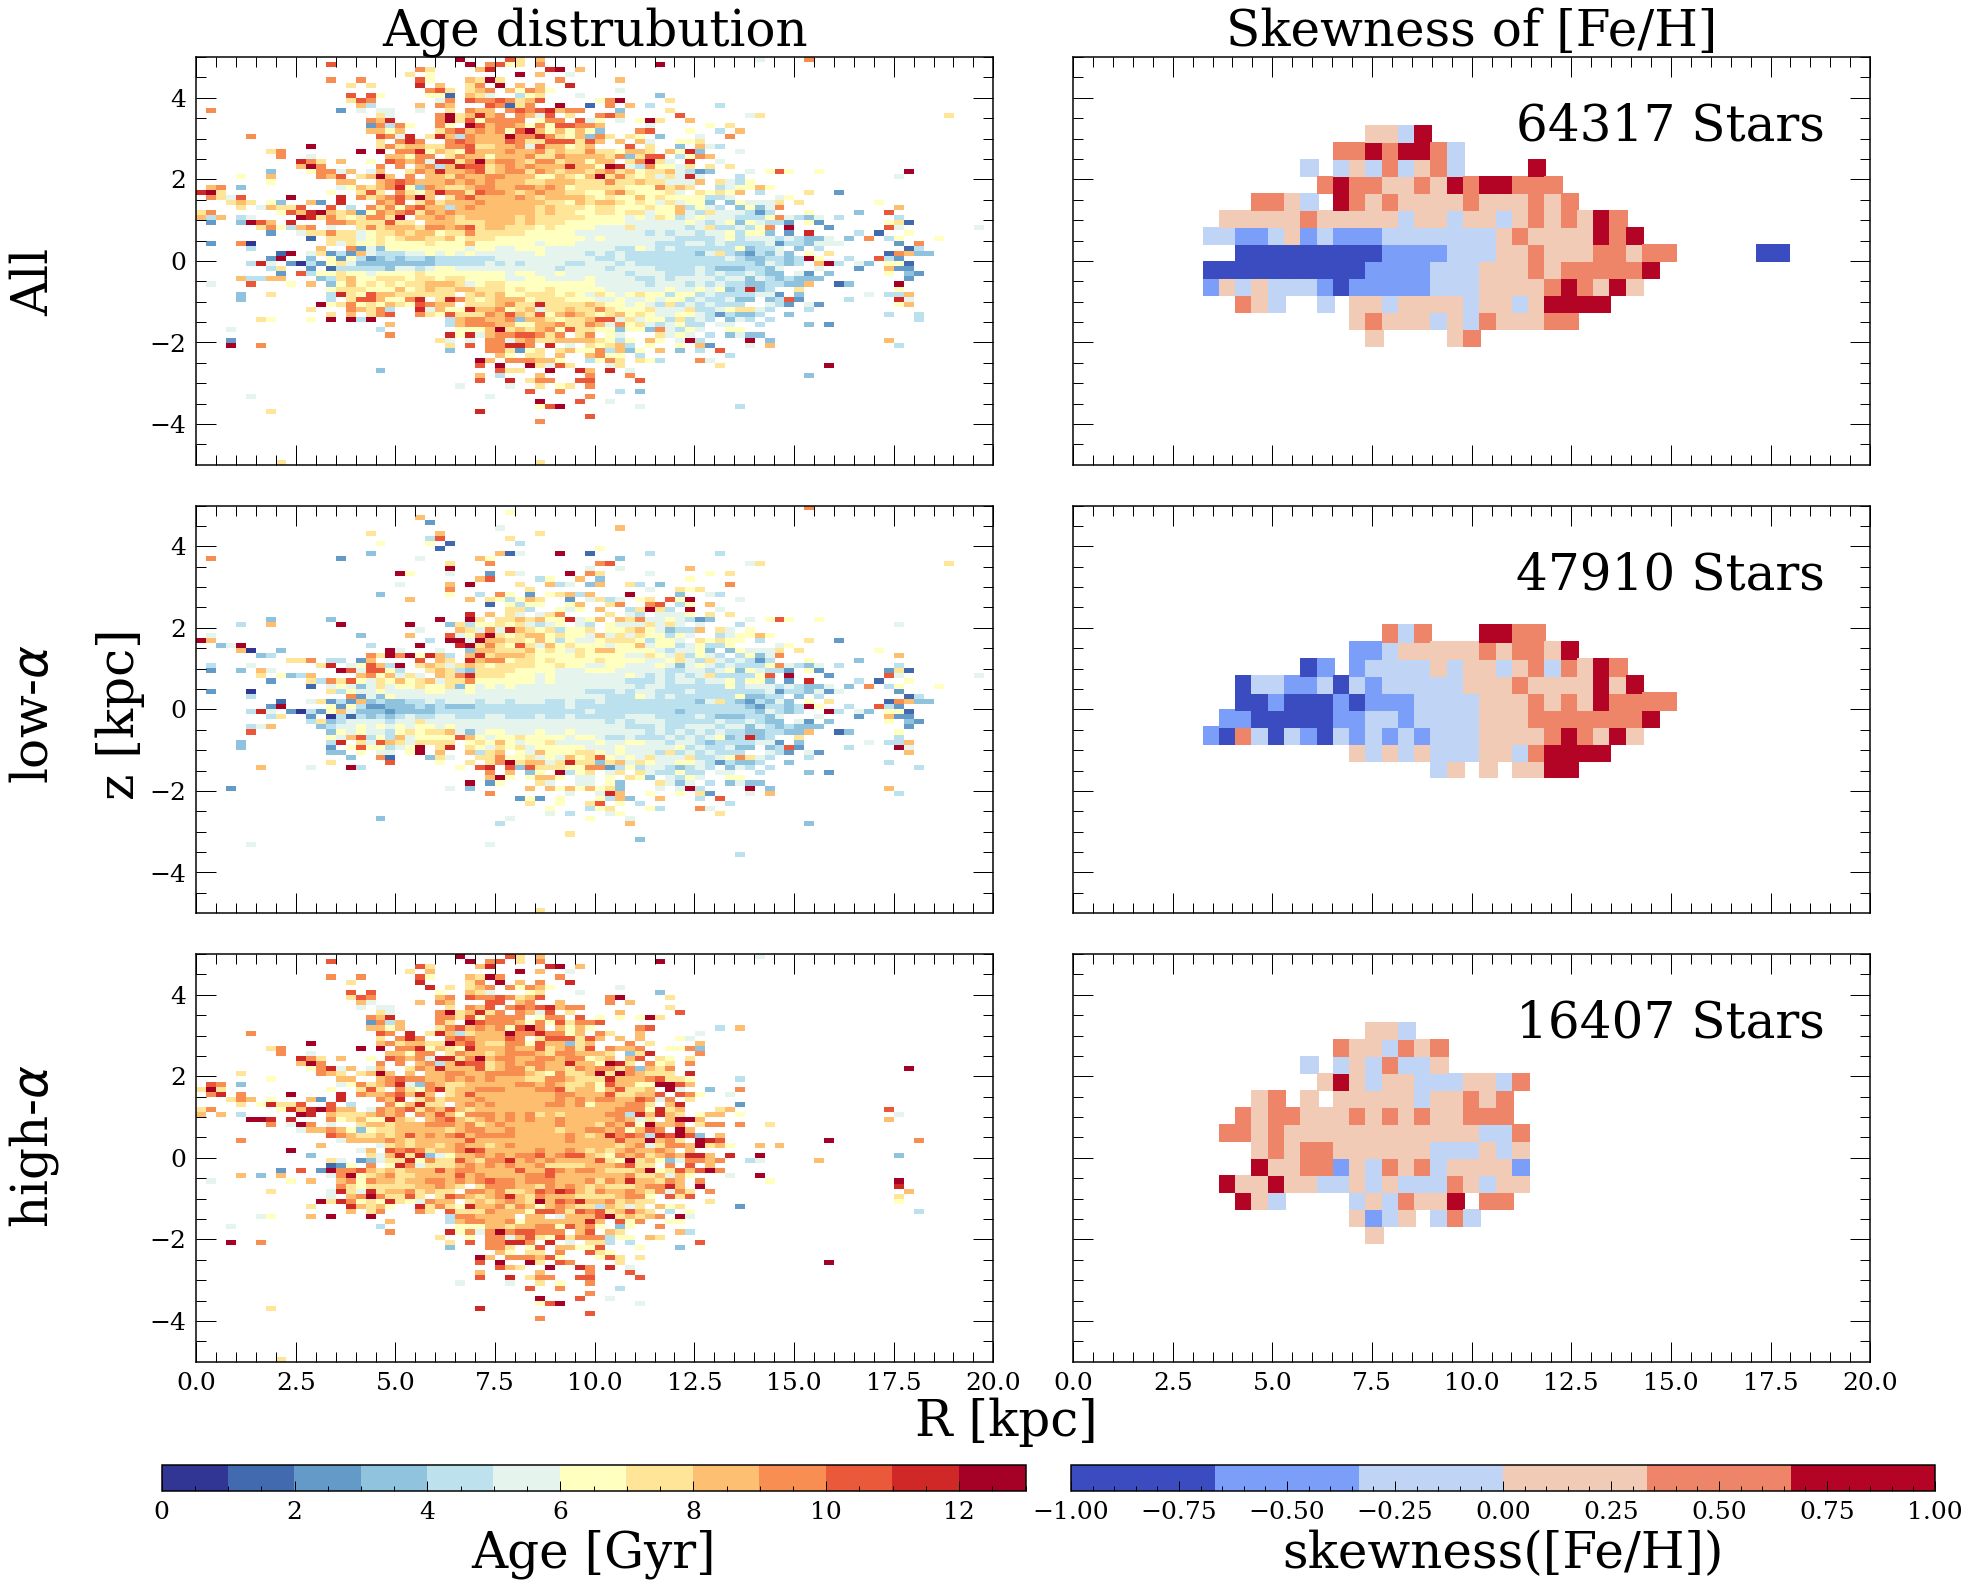

In [62]:

x1,x2,y1,y2 = 0,20,-5,5
lims = [x1,x2,y1,y2]
lims = np.array(lims)
binnum = 80


fig, axarr = plt.subplots(3,2,gridspec_kw={'hspace': 0.1, 'wspace': 0.1},
                          figsize=(30,24))

cm = plt.cm.get_cmap('coolwarm',6)
im=axarr[0,1].scatter(skrewness['R'],skrewness['z'],marker='s',c=skrewness['skew'],
                   cmap=cm,vmin=-1,vmax=1,s=300,alpha=1)
axarr[0,1].set_xlim([0,20])
axarr[0,1].set_ylim([-5,5])
axarr[0,1].set_title('Skewness of [Fe/H]',fontsize=50)
axarr[0,1].set_yticklabels([])
axarr[0,1].set_xticklabels([])
axarr[0,1].plot(-1000,-1000,'.',markersize=0.01,label='%d Stars'%len(df_CM))
axarr[0,1].legend(loc=1,fontsize=50)
axarr[0,1].tick_params(which='major',labelsize=25,direction='in',top=True,right=True,length=20)
axarr[0,1].tick_params(which='minor', length=10, direction='in',top=True,right=True)

m=skrewness['R']<16
skrewness=skrewness[m]
im=axarr[1,1].scatter(skrewness['R'],skrewness['z'],marker='s',c=skrewness['skew_la'],
                   cmap=cm,vmin=-1,vmax=1,s=300,alpha=1)
axarr[1,1].set_xlim([0,20])
axarr[1,1].set_ylim([-5,5])
axarr[1,1].set_yticklabels([])
axarr[1,1].set_xticklabels([])
axarr[1,1].plot(-1000,-1000,'.',markersize=0.01,label='%d Stars'%sum(df_CM['hi_low_line']==0))
axarr[1,1].legend(loc=1,fontsize=50)
axarr[1,1].tick_params(which='major',labelsize=25,direction='in',top=True,right=True,length=20)
axarr[1,1].tick_params(which='minor', length=10, direction='in',top=True,right=True)


im=axarr[2,1].scatter(skrewness['R'],skrewness['z'],marker='s',c=skrewness['skew_ha'],
                   cmap=cm,vmin=-1,vmax=1,s=300,alpha=1)

print(np.median(skrewness['skew_ha'].dropna()),np.mean(skrewness['skew_ha'].dropna()))

axarr[2,1].set_xlim([0,20])
axarr[2,1].set_ylim([-5,5])
axarr[2,1].plot(-1000,-1000,'.',markersize=0.01,label='%d Stars'%sum(df_CM['hi_low_line']==1))
axarr[2,1].legend(loc=1,fontsize=50)
axarr[2,1].set_yticklabels([])
axarr[2,1].tick_params(which='major',labelsize=25,direction='in',top=True,right=True,length=20)
axarr[2,1].tick_params(which='minor', length=10, direction='in',top=True,right=True)

cb_ax = fig.add_axes([0.53, 0.05, 0.4, 0.015])
cbar = fig.colorbar(im, cax=cb_ax,orientation = 'horizontal')
car = cbar.set_label('skewness([Fe/H])',fontsize = 50,labelpad = 5)



cmap1 = plt.cm.get_cmap('RdYlBu_r',13)
cmap1.set_bad('white',1.)

image=makeagemap_each(df_CM['R'].values,df_CM['z'].values,
                df_CM['Age'].values,lims, binnum)
axarr[0,0].imshow(image.T, interpolation="nearest" ,aspect = 'auto',origin = 'lower', 
           extent = (x1,x2, y1,y2),cmap=cmap1, vmin=0,vmax=13)
axarr[0,0].set_title('Age distrubution',fontsize=50)
axarr[0,0].set_xticklabels([])
axarr[0,0].tick_params(which='major',labelsize=25,direction='in',top=True,right=True,length=20)
axarr[0,0].tick_params(which='minor', length=10, direction='in',top=True,right=True)


image=makeagemap_each(df_CM.loc[df_CM['hi_low_line']==0]['R'].values,df_CM.loc[df_CM['hi_low_line']==0]['z'].values,
                df_CM['Age'].loc[df_CM['hi_low_line']==0].values,lims, binnum)
im=axarr[1,0].imshow(image.T, interpolation="nearest" ,aspect = 'auto',origin = 'lower', 
           extent = (x1,x2, y1,y2),cmap=cmap1, vmin=0,vmax=13)
axarr[1,0].set_xticklabels([])
axarr[1,0].tick_params(which='major',labelsize=25,direction='in',top=True,right=True,length=20)
axarr[1,0].tick_params(which='minor', length=10, direction='in',top=True,right=True)

image=makeagemap_each(df_CM.loc[df_CM['hi_low_line']==1]['R'].values,df_CM.loc[df_CM['hi_low_line']==1]['z'].values,
                df_CM['Age'].loc[df_CM['hi_low_line']==1].values,lims, binnum)
#print(np.median(image))
axarr[2,0].imshow(image.T, interpolation="nearest" ,aspect = 'auto',origin = 'lower', 
           extent = (x1,x2, y1,y2),cmap=cmap1, vmin=0,vmax=13)
axarr[2,0].tick_params(which='major',labelsize=25,direction='in',top=True,right=True,length=20)
axarr[2,0].tick_params(which='minor', length=10, direction='in',top=True,right=True)

cb_ax = fig.add_axes([0.109, 0.05, 0.4, 0.015])
cbar = fig.colorbar(im, cax=cb_ax,orientation = 'horizontal')
car = cbar.set_label('Age [Gyr]',fontsize = 50,labelpad = 5)

fig.text(0.09, 0.5, 'z [kpc]', ha='center', va='center', rotation='vertical',fontsize=50)
fig.text(0.5, 0.09, 'R [kpc]', ha='center', va='center', rotation='horizontal',fontsize=50)
"""
fig.text(0.05, 0.75, 'All %d'%len(df_CM), ha='center', va='center', rotation='vertical',fontsize=50)
fig.text(0.05, 0.5, '%d low-$\\alpha$'%len(df_CM.loc[df_CM['hi_low_line']==0]),
         ha='center', va='center', rotation='vertical',fontsize=50)
fig.text(0.05, 0.25, '%d high-$\\alpha$'%len(df_CM.loc[df_CM['hi_low_line']==1]), 
         ha='center', va='center', rotation='vertical',fontsize=50)
"""
fig.text(0.05, 0.75, 'All', ha='center', va='center', rotation='vertical',fontsize=50)
fig.text(0.05, 0.5, 'low-$\\alpha$',
         ha='center', va='center', rotation='vertical',fontsize=50)
fig.text(0.05, 0.25, 'high-$\\alpha$', 
         ha='center', va='center', rotation='vertical',fontsize=50)


plt.savefig('fehskew.png')



In [63]:
df_CM=pd.read_pickle('../CannonDR16_cut.pkl')
for i in abun_apog:
    df_CM=df_CM.loc[abs(df_CM[i])<5]
df_CM=df_CM.reset_index(drop=True)

  0%|          | 0/9 [00:00<?, ?it/s]/Users/yl4331/Desktop/SecondYear/Figures/HeaderP.py:1174: RuntimeWarning: invalid value encountered in true_divide
  image = hist1/hist1_norm
/Users/yl4331/Desktop/SecondYear/Figures/HeaderP.py:1174: RuntimeWarning: invalid value encountered in true_divide
  image = hist1/hist1_norm
/Users/yl4331/Desktop/SecondYear/Figures/HeaderP.py:1174: RuntimeWarning: invalid value encountered in true_divide
  image = hist1/hist1_norm
/Users/yl4331/Desktop/SecondYear/Figures/HeaderP.py:1174: RuntimeWarning: invalid value encountered in true_divide
  image = hist1/hist1_norm
/Users/yl4331/Desktop/SecondYear/Figures/HeaderP.py:1174: RuntimeWarning: invalid value encountered in true_divide
  image = hist1/hist1_norm
/Users/yl4331/Desktop/SecondYear/Figures/HeaderP.py:1174: RuntimeWarning: invalid value encountered in true_divide
  image = hist1/hist1_norm
 67%|██████▋   | 6/9 [00:00<00:00, 56.14it/s]/Users/yl4331/Desktop/SecondYear/Figures/HeaderP.py:1174: RuntimeW

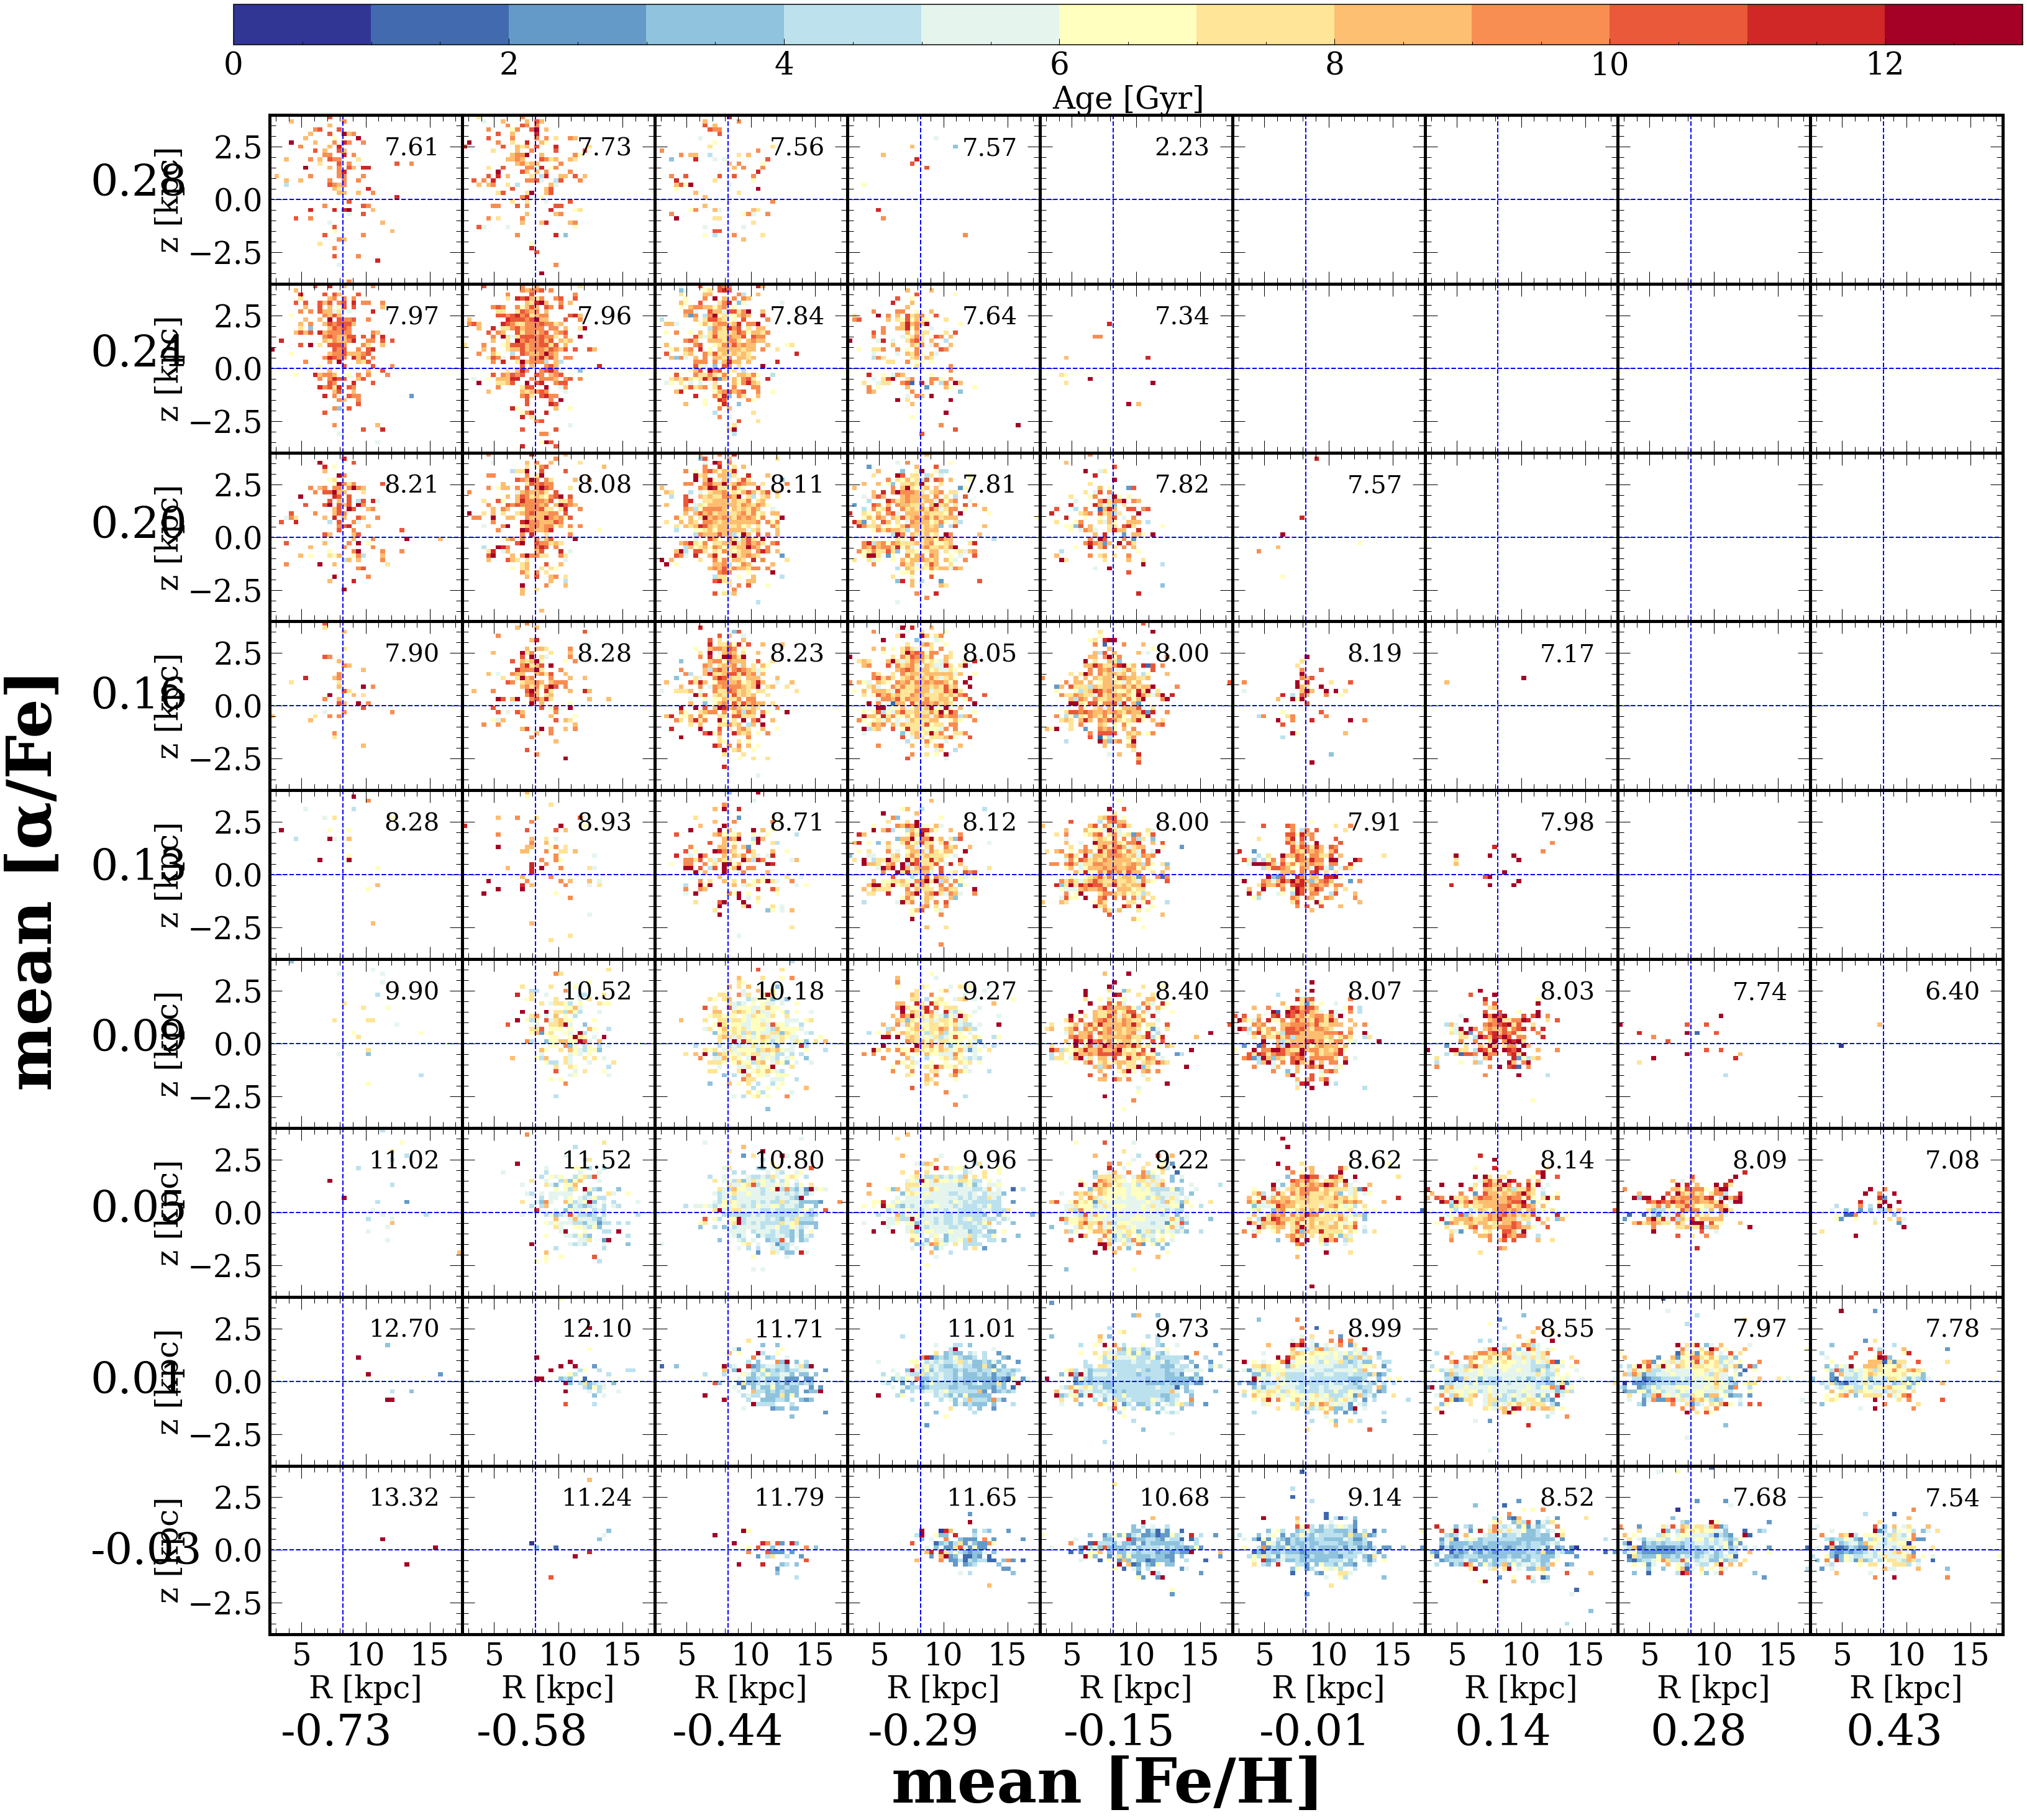

In [64]:
from scipy.ndimage import gaussian_filter
import math
from matplotlib import rc
rc('text', usetex=False) 
#Febin=np.linspace(-0.8,0.5,10)
#alpha=np.linspace(0.3,-0.05,10)
Febin=np.linspace(-0.8,0.5,10)
alpha=np.linspace(0.3,-0.05,10)

#plt.figure(figsize=(len(Febin)*10-10,len(alpha)*10-10))

x1,x2,y1,y2 = 2.5,17.5,-4,4
lims = [x1,x2,y1,y2]
lims = np.array(lims)
binnum = 40

#df_CM=df_CM.loc[df_CM['Age_err']<5]
print(len(df_CM))

fig, axarr = plt.subplots(len(alpha)-1,len(Febin)-1,gridspec_kw={'hspace': 0, 'wspace': 0},
                          figsize=(len(Febin)*5,len(alpha)*5-5))
count=0


for i in range(len(alpha)-1):
    print(i/(len(alpha)-1))
    clear_output(wait = True)
    
    df_all=df_CM.loc[df_CM['ALPHA_M']>alpha[i+1]]
    df_all=df_all.loc[df_all['ALPHA_M']<alpha[i]]
    #print(len(df_all))
    
    for j in trange(len(Febin)-1):
        df_all_z=df_all.loc[(df_all['M_H'])>Febin[j]]
        df_all_z=df_all_z.loc[(df_all_z['M_H'])<Febin[j+1]]
        
        #print(len(df_all_z))
        image=makeagemap_each(df_all_z['R'].values,df_all_z['z'].values,
                df_all_z['Age'].values,lims, binnum)
        
        
        cmap1 = plt.cm.get_cmap('RdYlBu_r',13)
        cmap1.set_bad('white',1.)
    
        x1m,x2m,y1m,y2m = lims[0], lims[1], lims[2], lims[3]
        
        
        im=axarr[i,j].imshow(image.T, interpolation="nearest" ,aspect = 'auto',origin = 'lower', 
                   extent = (x1m,x2m, y1m,y2m),cmap=cmap1, vmin=0,vmax=13)
        if math.isnan(np.mean(df_all_z['R'])):
            axarr[i,j].plot([-1000,1000],'k.',markersize=0.001)
        else:
            axarr[i,j].plot([-1000,1000],'k.',markersize=0.001,label='%.2f'%np.mean(df_all_z['R']))
            
        for axis in ['top','bottom','left','right']:
            axarr[i,j].spines[axis].set_linewidth(5)
        
        axarr[i,j].plot([x1m,x2m],[0,0],'b--')
        axarr[i,j].plot([8.2,8.2],[y1m,y2m],'b--')
        axarr[i,j].legend(prop={'size': 40})
        
        #axarr[i,j].set_linewidth(3)
        count=count+1
        if j!=0:
            axarr[i,j].set_yticklabels([])
        else:
            axarr[i,j].set_ylabel('z [kpc]',fontsize=50) 
        if i!=len(alpha)-2:
            axarr[i,j].set_xticklabels([])
        else:
            axarr[i,j].set_xlabel('R [kpc]',fontsize=50) 
   
        
        axarr[i,j].set_xlim(x1m,x2m)
        axarr[i,j].set_ylim(y1m,y2m)

       # if i==len(alpha)-2 and j==0:
       #     axarr[i,j].set_xlabel('R [kpc]',fontsize=50) 
       #     axarr[i,j].set_ylabel('z [kpc]',fontsize=50) 
        axarr[i,j].tick_params(which='major',labelsize=50,direction='in',top=True,right=True,length=20)
        axarr[i,j].tick_params(which='minor', length=10, direction='in',top=True,right=True)

        
cb_ax = fig.add_axes([0.109, 0.915, 0.8, 0.02])
cbar = fig.colorbar(im, cax=cb_ax,orientation = 'horizontal')
cbar.ax.tick_params(labelsize=50) 
car = cbar.set_label('Age [Gyr]',fontsize = 50,labelpad = 5)


fig.text(0.02, 0.5, 'mean [α/Fe]', ha='center', va='center', rotation='vertical',fontsize=100, fontweight='bold')
fig.text(0.5, 0.05, 'mean [Fe/H]', ha='center', va='center', rotation='horizontal',fontsize=100, fontweight='bold')

    
for i in range(0,10-1):
    fig.text(0.045, 0.16+0.085*i, '%.2f'%((0.3-alpha[i]-0.05+0.3-alpha[i+1]-0.05)/2.), rotation='horizontal',
             fontsize=70)
    fig.text(0.13+0.0875*i, 0.07, '%.2f'%((Febin[i]+Febin[i+1])/2.), rotation='horizontal',
             fontsize=70)
        


plt.savefig('monofealpha.png')



100%|██████████| 9/9 [00:00<00:00, 19.48it/s]


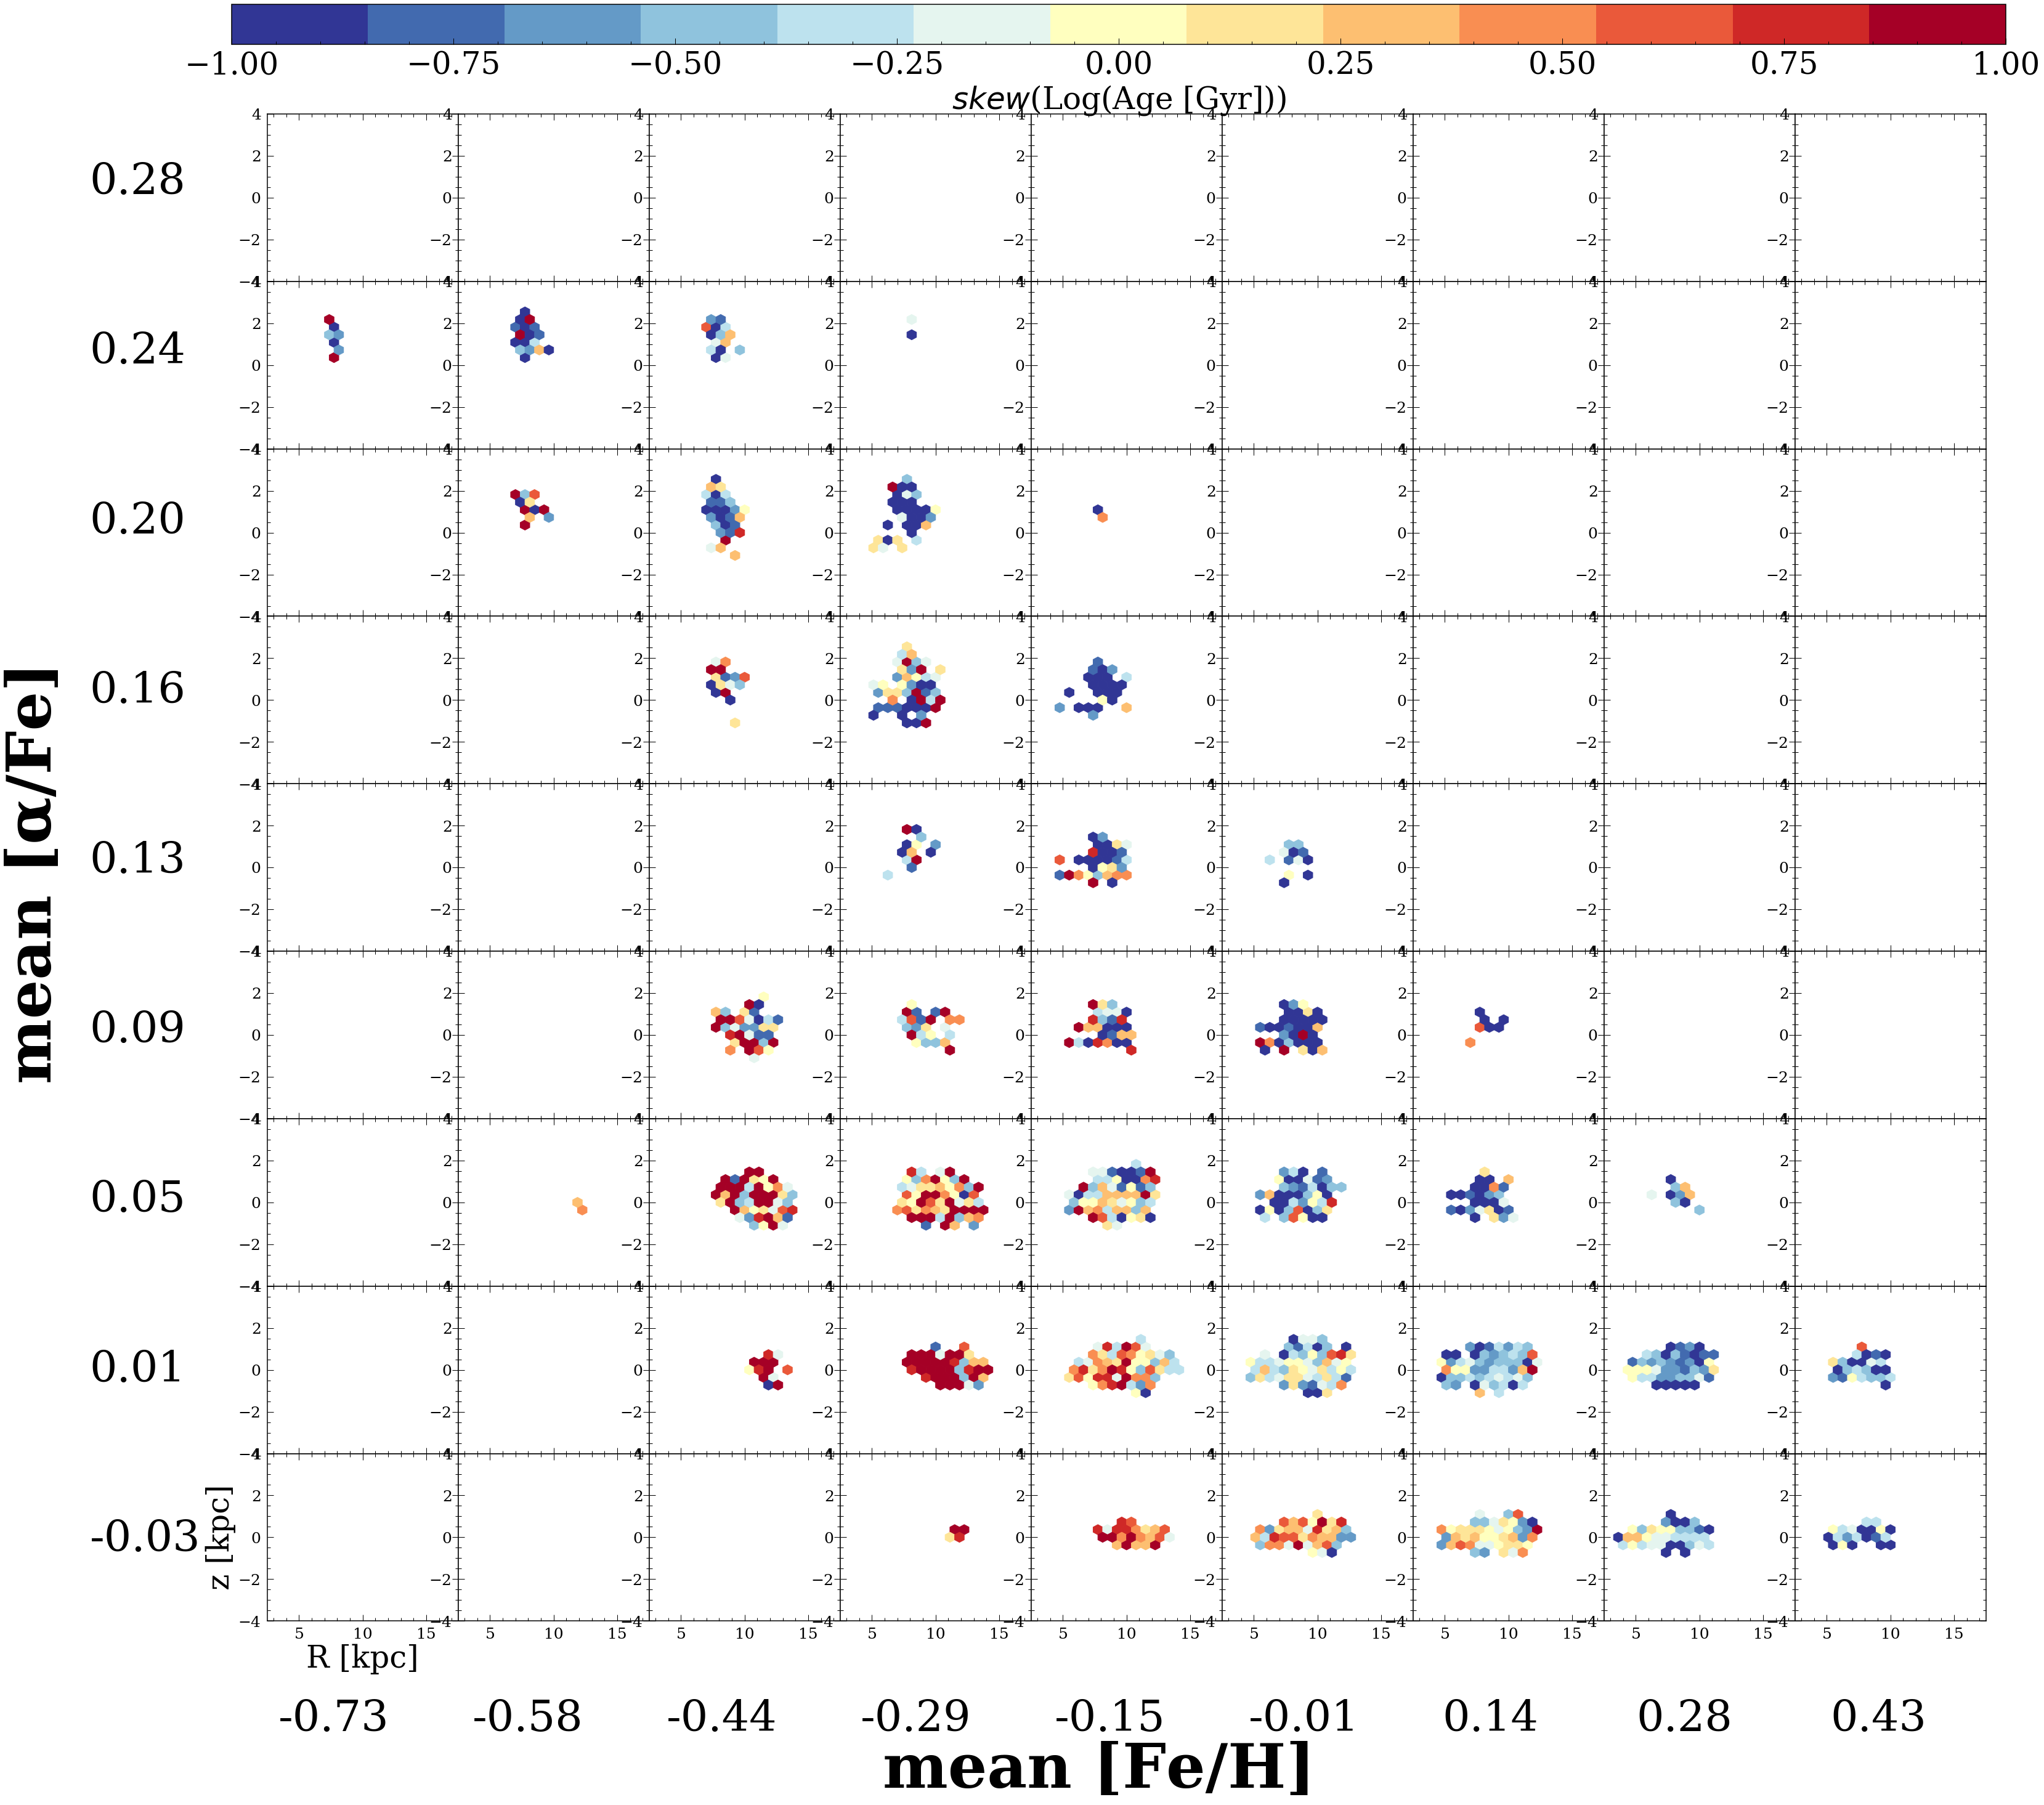

In [22]:
from scipy.ndimage import gaussian_filter
from scipy.stats import skew

#Febin=np.linspace(-0.8,0.5,10)
#alpha=np.linspace(0.3,-0.05,10)
Febin=np.linspace(-0.8,0.5,10)
alpha=np.linspace(0.3,-0.05,10)

#plt.figure(figsize=(len(Febin)*10-10,len(alpha)*10-10))

x1,x2,y1,y2 = 2.5,17.5,-4,4
lims = [x1,x2,y1,y2]
lims = np.array(lims)
binnum = 40

#df_CM=df_CM.loc[df_CM['Age_err']<5]
print(len(df_CM))

fig, axarr = plt.subplots(len(alpha)-1,len(Febin)-1,gridspec_kw={'hspace': 0, 'wspace': 0},
                          figsize=(len(Febin)*5,len(alpha)*5-5))
count=0

for i in range(len(alpha)-1):
    print(i/(len(alpha)-1))
    clear_output(wait = True)
    
    df_all=df_CM.loc[df_CM['ALPHA_M']>alpha[i+1]]
    df_all=df_all.loc[df_all['ALPHA_M']<alpha[i]]
    #print(len(df_all))
    
    for j in trange(len(Febin)-1):
        df_all_z=df_all.loc[(df_all['M_H'])>Febin[j]]
        df_all_z=df_all_z.loc[(df_all_z['M_H'])<Febin[j+1]]
        
        
        cmap1 = plt.cm.get_cmap('RdYlBu_r',13)
        cmap1.set_bad('white',1.)
    
        im=axarr[i,j].hexbin(df_all_z['R'].values,df_all_z['z'].values,C=df_all_z['LogAge'].values,
                             cmap=cmap1,vmin=-1,vmax=1, gridsize=20,extent=(x1,x2,y1,y2),
                             reduce_C_function = skew,mincnt=10)
        
        
        axarr[i,j].set_xlim(x1m,x2m)
        axarr[i,j].set_ylim(y1m,y2m)

        if i==len(alpha)-2 and j==0:
            axarr[i,j].set_xlabel('R [kpc]',fontsize=50) 
            axarr[i,j].set_ylabel('z [kpc]',fontsize=50) 

        
cb_ax = fig.add_axes([0.109, 0.915, 0.8, 0.02])
cbar = fig.colorbar(im, cax=cb_ax,orientation = 'horizontal')
cbar.ax.tick_params(labelsize=50) 
car = cbar.set_label('$skew$(Log(Age [Gyr]))',fontsize = 50,labelpad = 5)


fig.text(0.02, 0.5, 'mean [α/Fe]', ha='center', va='center', rotation='vertical',fontsize=100, fontweight='bold')
fig.text(0.5, 0.05, 'mean [Fe/H]', ha='center', va='center', rotation='horizontal',fontsize=100, fontweight='bold')

    
for i in range(0,10-1):
    fig.text(0.045, 0.16+0.085*i, '%.2f'%((0.3-alpha[i]-0.05+0.3-alpha[i+1]-0.05)/2.), rotation='horizontal',
             fontsize=70)
    fig.text(0.13+0.0875*i, 0.07, '%.2f'%((Febin[i]+Febin[i+1])/2.), rotation='horizontal',
             fontsize=70)


plt.savefig('monofealpha_ageskew.png')




  0%|          | 0/6 [00:00<?, ?it/s]/Users/yl4331/Desktop/SecondYear/Figures/HeaderP.py:1174: RuntimeWarning: invalid value encountered in true_divide
  image = hist1/hist1_norm
/Users/yl4331/Desktop/SecondYear/Figures/HeaderP.py:1174: RuntimeWarning: invalid value encountered in true_divide
  image = hist1/hist1_norm
/Users/yl4331/Desktop/SecondYear/Figures/HeaderP.py:1174: RuntimeWarning: invalid value encountered in true_divide
  image = hist1/hist1_norm
/Users/yl4331/Desktop/SecondYear/Figures/HeaderP.py:1174: RuntimeWarning: invalid value encountered in true_divide
  image = hist1/hist1_norm
/Users/yl4331/Desktop/SecondYear/Figures/HeaderP.py:1174: RuntimeWarning: invalid value encountered in true_divide
  image = hist1/hist1_norm
 83%|████████▎ | 5/6 [00:00<00:00, 45.59it/s]/Users/yl4331/Desktop/SecondYear/Figures/HeaderP.py:1174: RuntimeWarning: invalid value encountered in true_divide
  image = hist1/hist1_norm
100%|██████████| 6/6 [00:00<00:00, 48.37it/s]


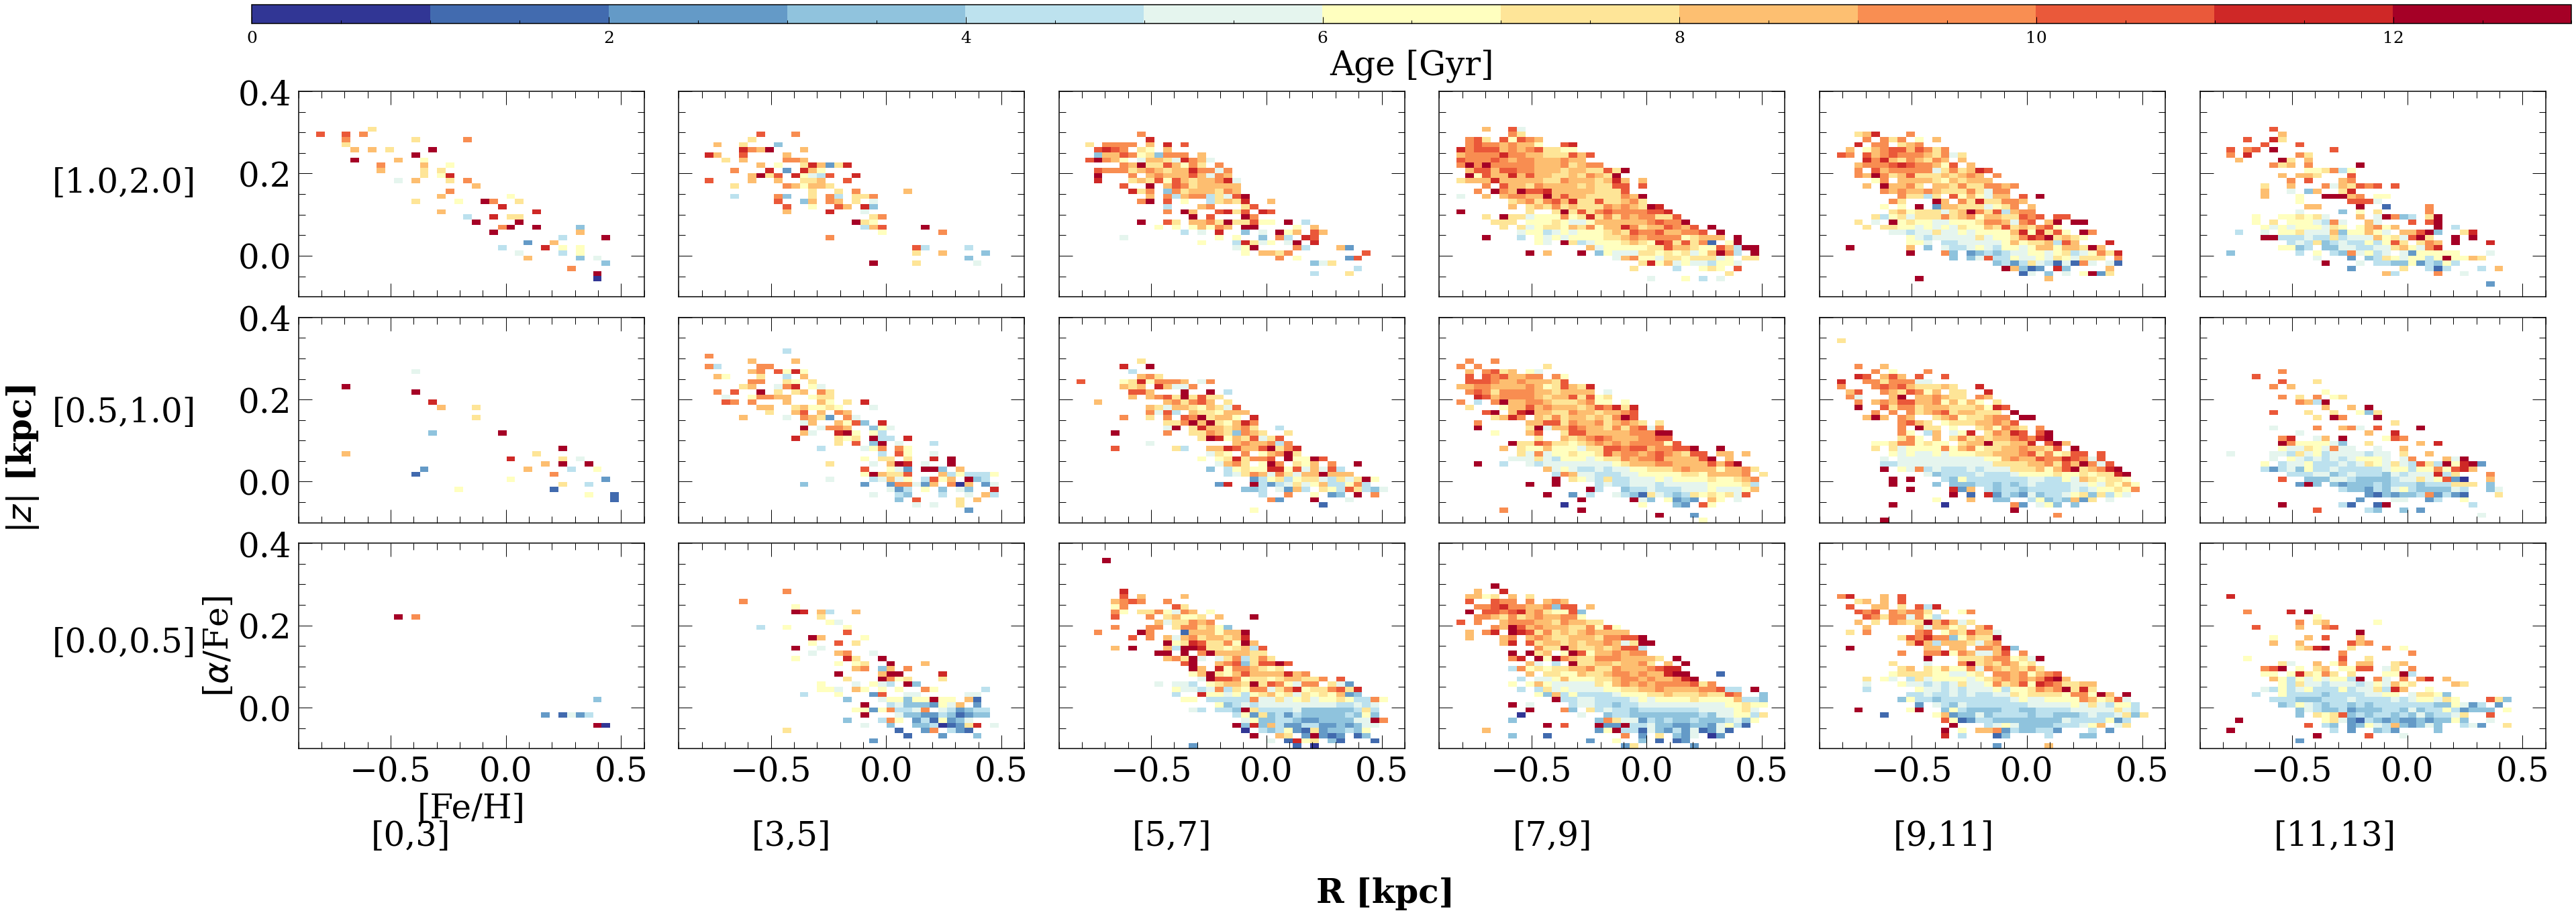

In [65]:
from scipy.ndimage import gaussian_filter

Rbin=[2,1,0.5,0]
zbin=[0,3,5,7,9,11,13]
count=1

x1,x2,y1,y2 = -0.9,0.6,-0.1,0.4
lims = [x1,x2,y1,y2]
lims = np.array(lims)
binnum = 40

fig, axarr = plt.subplots(len(Rbin)-1,len(zbin)-1,gridspec_kw={'hspace': 0.1, 'wspace': 0.1},
                          figsize=(len(zbin)*10-10,len(Rbin)*10-20))


print(len(df_CM))

for i in range(len(Rbin)-1):
    print(i/(len(Rbin)-1))
    clear_output(wait = True)
    
    df_all=df_CM.loc[df_CM['z']>Rbin[i+1]]
    df_all=df_all.loc[df_all['z']<Rbin[i]]
        
    for j in trange(len(zbin)-1):
        df_all_z=df_all.loc[abs(df_all['R'])>zbin[j]]
        df_all_z=df_all_z.loc[abs(df_all_z['R'])<zbin[j+1]]
        
        
        image=makeagemap_each(df_all_z['M_H'].values,df_all_z['ALPHA_M'].values,
                df_all_z['Age'].values,lims, binnum)
        
        
        cmap1 = plt.cm.get_cmap('RdYlBu_r',13)
        cmap1.set_bad('white',1.)
    
        x1m,x2m,y1m,y2m = lims[0], lims[1], lims[2], lims[3]
        
        im=axarr[i,j].imshow(image.T, interpolation="nearest" ,aspect = 'auto',origin = 'lower', 
                   extent = (x1m,x2m, y1m,y2m),cmap=cmap1, vmin=0,vmax=13)
 
        
        if i!=(len(Rbin)-2):
            axarr[i,j].set_xticklabels([])
        if j!=0:
            axarr[i,j].set_yticklabels([])
        
        if i==(len(Rbin)-2) and j==0:
            axarr[i,j].set_xlabel("[Fe/H]",fontsize = 50,labelpad =5)
            axarr[i,j].set_ylabel("[$\\alpha$/Fe]" ,fontsize = 50)
            
        axarr[i,j].tick_params(which='major',labelsize=50,direction='in',top=True,right=True,length=20)
        axarr[i,j].tick_params(which='minor', length=10, direction='in',top=True,right=True)
        
        plt.subplots_adjust(bottom=0.20)
        

cb_ax = fig.add_axes([0.109, 0.95, 0.8, 0.02])
cbar = fig.colorbar(im, cax=cb_ax,orientation = 'horizontal')
car = cbar.set_label('Age [Gyr]',fontsize = 50,labelpad = 5)

fig.text(0.03, 0.5, '$|z|$ [kpc]', ha='center', va='center', rotation='vertical',fontsize=50, fontweight='bold')
fig.text(0.5, 0.05, 'R [kpc]', ha='center', va='center', rotation='horizontal',fontsize=50, fontweight='bold')


for i in range(3):
    fig.text(0.04, 0.776-0.085*i*2.8, '[%.1f,%.1f]'%(Rbin[i+1],Rbin[i]), rotation='horizontal',
             fontsize=50)
for i in range(6):
    fig.text(0.15+0.0875*i*1.5, 0.1, '[%d,%d]'%(zbin[i],zbin[i+1]), rotation='horizontal',
             fontsize=50)
    
plt.savefig('agespacial.png')

16407 47910
2.346931642160146 1.8248292624028748


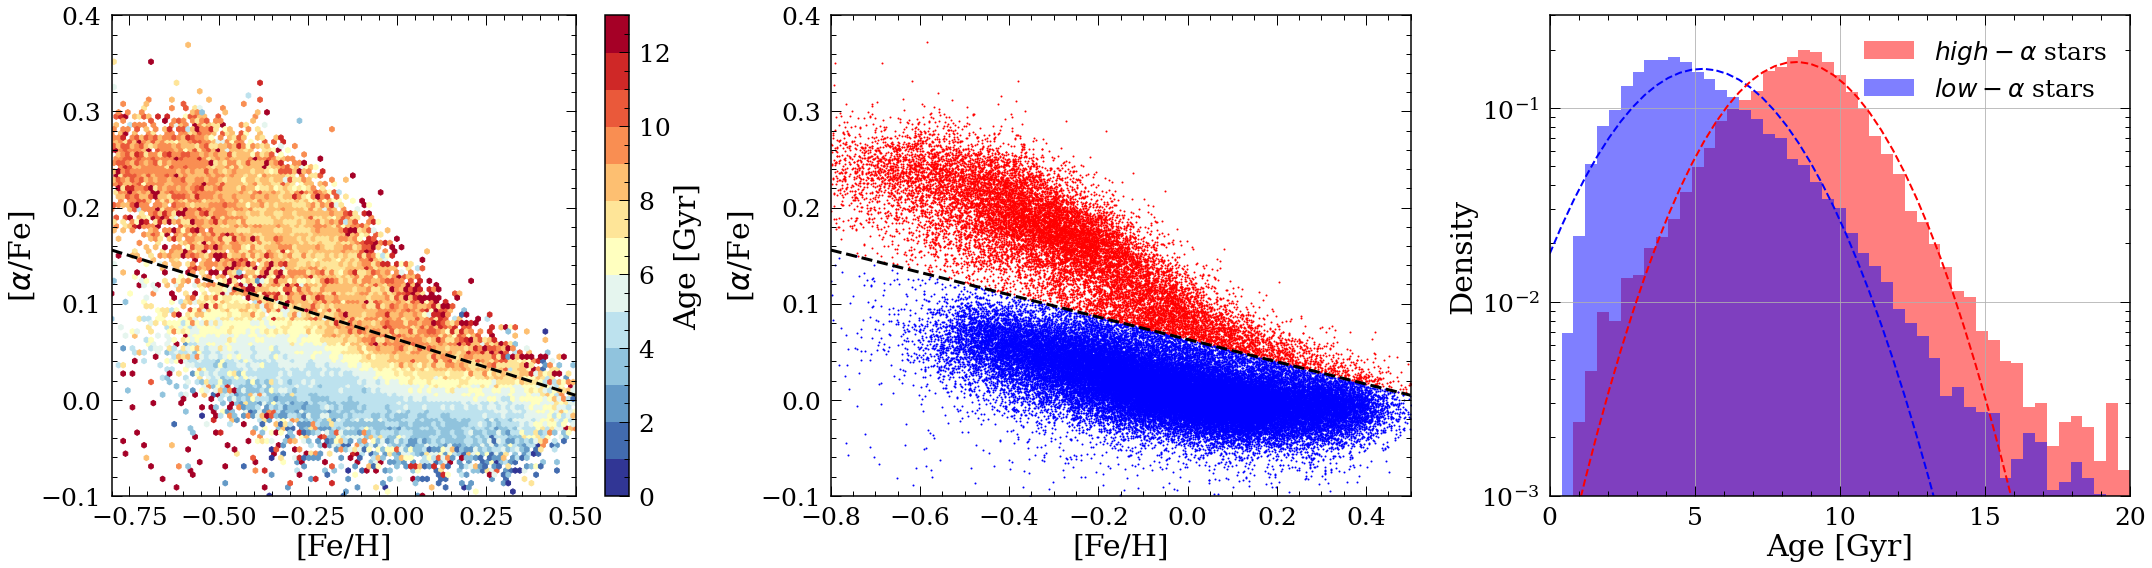

In [66]:
p=fitpoints([-0.75,0.11],[0.15,0.05])

plt.figure(figsize=(30,8))
plt.subplot(1,3,1)
cm = plt.cm.get_cmap('RdYlBu_r',13)
#plt.scatter(df_CM['M_H'],df_CM['ALPHA_M'],c=df_CM['Age'],vmin=0,vmax=13,s=5,cmap=cm)
plt.hexbin(df_CM['M_H'],df_CM['ALPHA_M'],C=df_CM['Age'],vmin=0,vmax=13,extent=(-0.8,0.5,-0.1,0.4),cmap=cm)
plt.plot([-0.8,0.5],p([-0.8,0.5]),'k--',linewidth=3)
plt.xlim([-0.8,0.5])
plt.ylim([-0.1,0.4])
plt.xlabel('[Fe/H]')
plt.ylabel('[$\\alpha$/Fe]')
cb=plt.colorbar()
cb.set_label('Age [Gyr]')


high_alpha=df_CM[df_CM['ALPHA_M']-p(df_CM['M_H'])>=0]
low_alpha=df_CM[df_CM['ALPHA_M']-p(df_CM['M_H'])<0]
print(len(high_alpha),len(low_alpha))
plt.subplot(1,3,2)
plt.scatter(high_alpha['M_H'],high_alpha['ALPHA_M'],c='r',s=1)
plt.scatter(low_alpha['M_H'],low_alpha['ALPHA_M'],c='b',s=1)
plt.plot([-0.8,0.5],p([-0.8,0.5]),'k--',linewidth=3)
plt.xlim([-0.8,0.5])
plt.ylim([-0.1,0.4])
plt.xlabel('[Fe/H]')
plt.ylabel('[$\\alpha$/Fe]')

from scipy.stats import skew
from scipy.stats import norm

plt.subplot(1,3,3)

has=df_CM.loc[df_CM['hi_low_line']==1]
las=df_CM.loc[df_CM['hi_low_line']==0]

(mu_la,sigma_la) = norm.fit(las.loc[las['Age']<15]['Age'])
(mu_ha,sigma_ha) = norm.fit(has.loc[has['Age']<15]['Age'])
y_la = norm.pdf(np.linspace(0,20,50),mu_la,sigma_la)
y_ha = norm.pdf(np.linspace(0,20,50),mu_ha,sigma_ha)

has['Age'].hist(bins=np.linspace(0,20,50),alpha=0.5,color='r',density=True,
                                               label='$high-\\alpha$ stars')
las['Age'].hist(bins=np.linspace(0,20,50),alpha=0.5,color='b',density=True,
                                               label='$low-\\alpha$ stars')

plt.plot(np.linspace(0,20,50),y_la,'b--',linewidth=2)
plt.plot(np.linspace(0,20,50),y_ha,'r--',linewidth=2)

plt.xlim([0,30])
plt.xlabel('Age [Gyr]')
plt.ylabel('Density')
#plt.title('Age distribution of high-$\\alpha$ stars',fontsize=25)
plt.savefig('AgeHist_ha.png')
plt.xlim([0,20])
plt.ylim([0.001,0.3])
plt.yscale('log')
plt.legend()
print(skew(df_CM.loc[df_CM['hi_low_line']==1]['Age'].values),
      skew(df_CM.loc[df_CM['hi_low_line']==0]['Age'].values))

plt.tight_layout()
plt.savefig('allstarFealpha.png')

In [67]:
df_rc=df_CM.loc[df_CM['DP']>230]
print(len(df_rc))
df_rc=df_rc.loc[df_rc['SNR']>150].reset_index(drop=True)
print(len(df_rc))
#df_rc=df_rc.loc[df_rc['Age_err']/df_rc['Age']<0.5].reset_index(drop=True)
print(len(df_rc))
df_rc=df_rc.loc[df_rc['M_H_ERR']<0.03].reset_index(drop=True)
df_rc=df_rc.loc[df_rc['chisq']<10000].reset_index(drop=True)
print(len(df_rc))

22031
13220
13220
11263


In [68]:
high_alpha=df_rc[df_rc['ALPHA_M']-p(df_rc['M_H'])>=0]
low_alpha=df_rc[df_rc['ALPHA_M']-p(df_rc['M_H'])<0]

df_abun_st_ha=high_alpha.loc[abs(high_alpha['M_H'])<0.05]
df_abun_st_la=low_alpha.loc[abs(low_alpha['M_H'])<0.05]

df_abun_st_ha=df_abun_st_ha.loc[abs(df_abun_st_ha['Age'])<10]
df_abun_st_la=df_abun_st_la.loc[abs(df_abun_st_la['Age'])<10]

print(len(df_abun_st_ha),len(df_abun_st_la))

224 1650


 10%|█         | 10/100 [00:00<00:00, 90.74it/s]

S_FE


100%|██████████| 100/100 [00:00<00:00, 576.78it/s]


(0.0, 10.0)

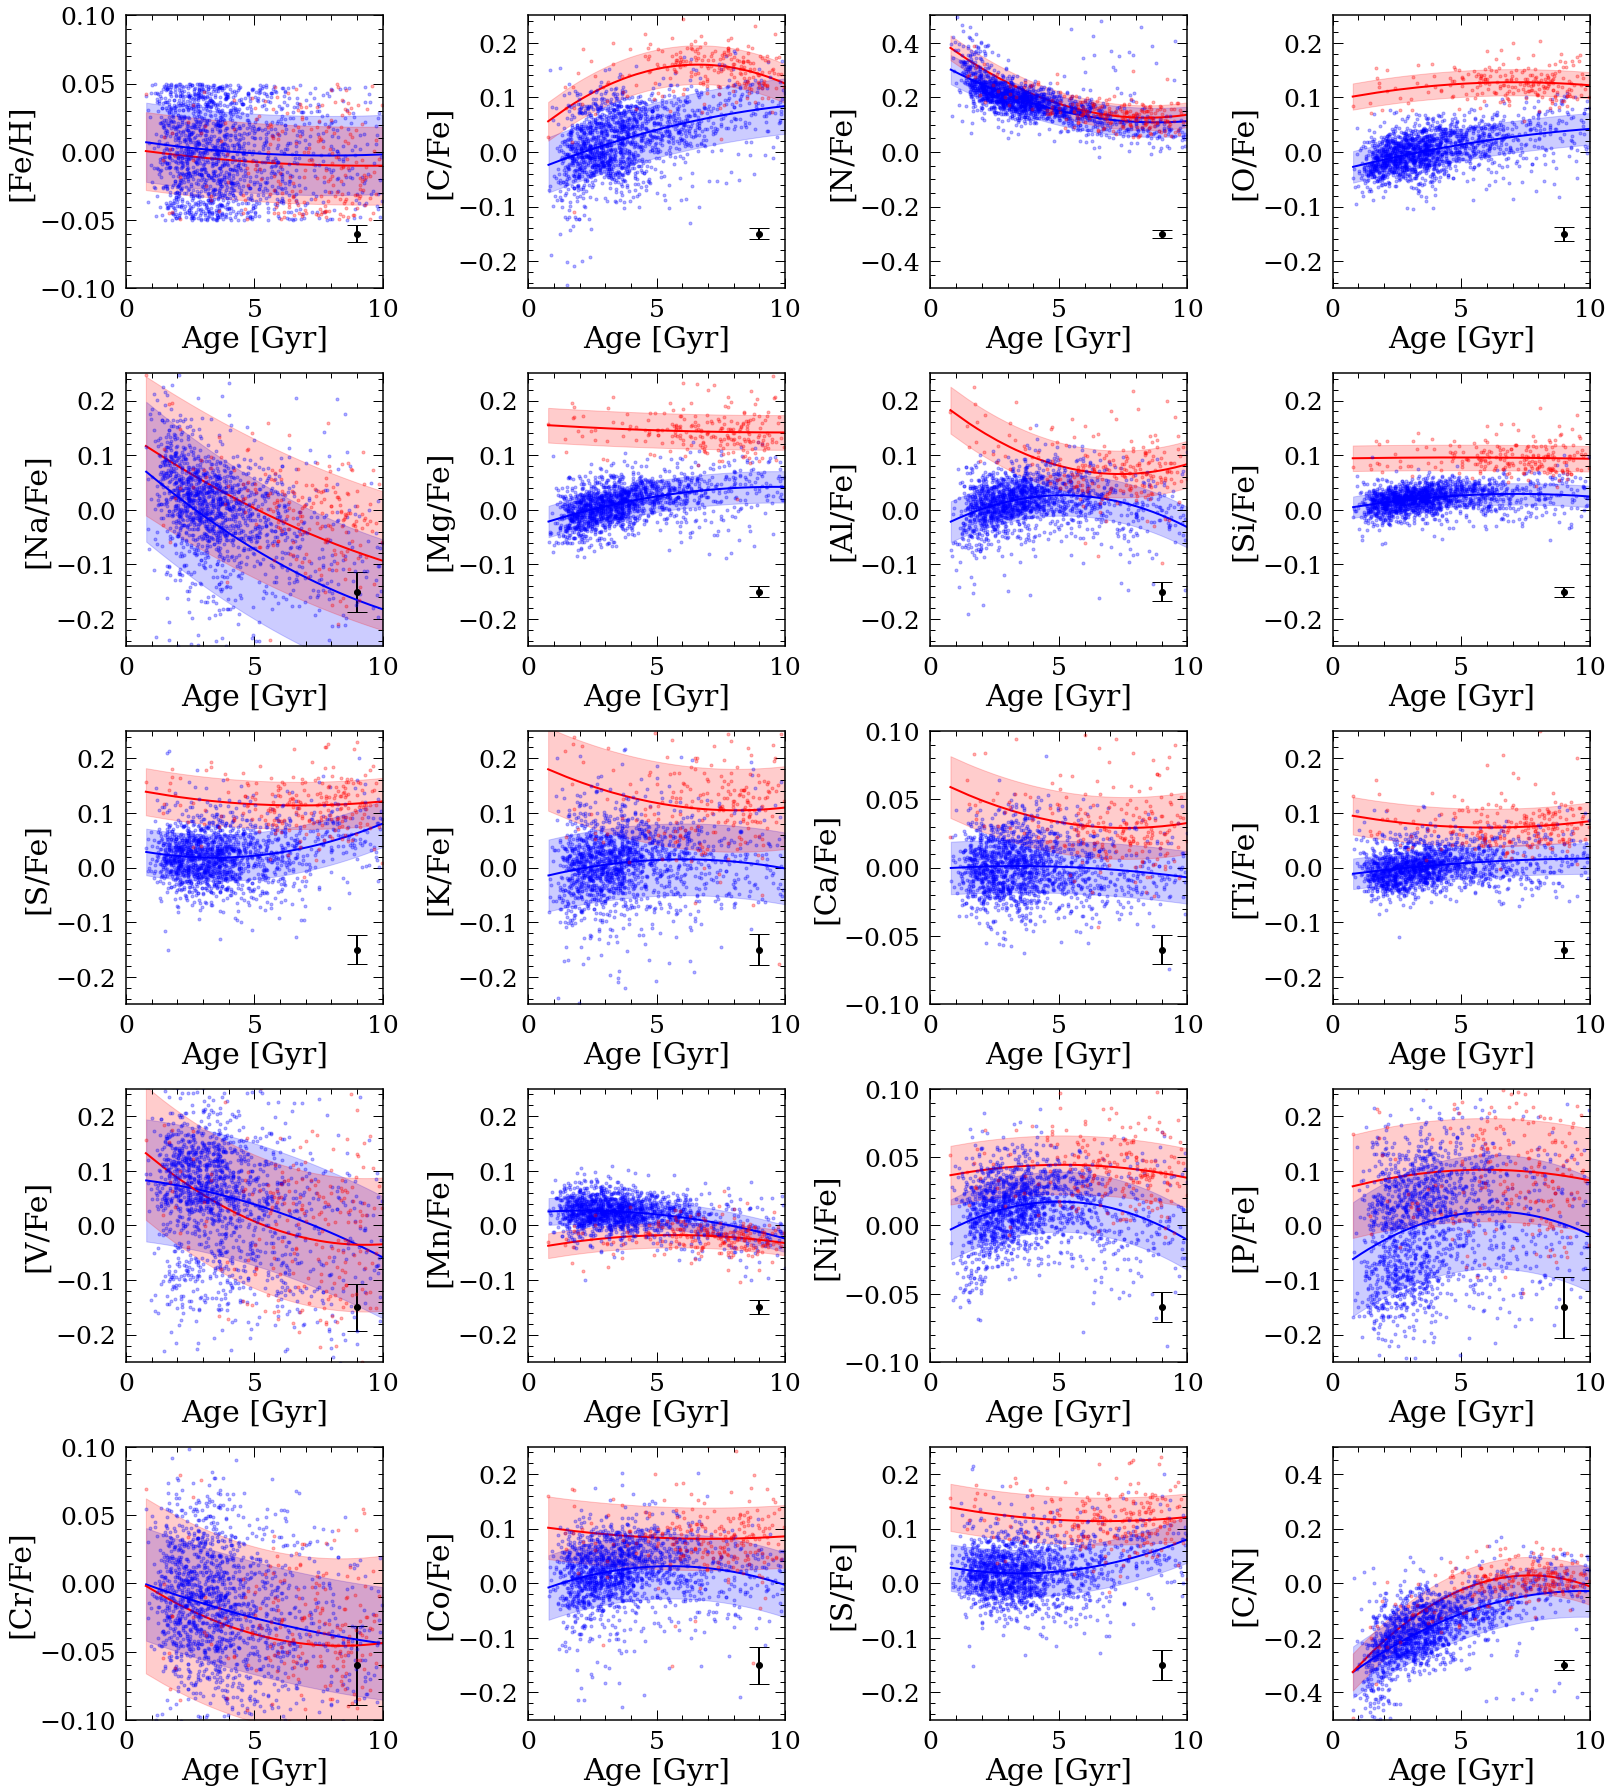

In [26]:
hi_dis, lo_dis, tot_hi_dis, tot_lo_dis, Abunname=plotTrends(df_abun_st_ha,df_abun_st_la,'abundance_rc','linear',2)
plt.xlim([0,10])

In [69]:
high_alpha=df_rc[df_rc['ALPHA_M']-p(df_rc['M_H'])>=0]
low_alpha=df_rc[df_rc['ALPHA_M']-p(df_rc['M_H'])<0]

df_abun_st_ha=high_alpha.loc[abs(high_alpha['M_H']+0.1)<0.05]
df_abun_st_la=low_alpha.loc[abs(low_alpha['M_H']+0.1)<0.05]

df_abun_st_ha=df_abun_st_ha.loc[abs(df_abun_st_ha['Age'])<10]
df_abun_st_la=df_abun_st_la.loc[abs(df_abun_st_la['Age'])<10]

print(len(df_abun_st_ha),len(df_abun_st_la))

269 1536


CO_FE
651 114
492 42


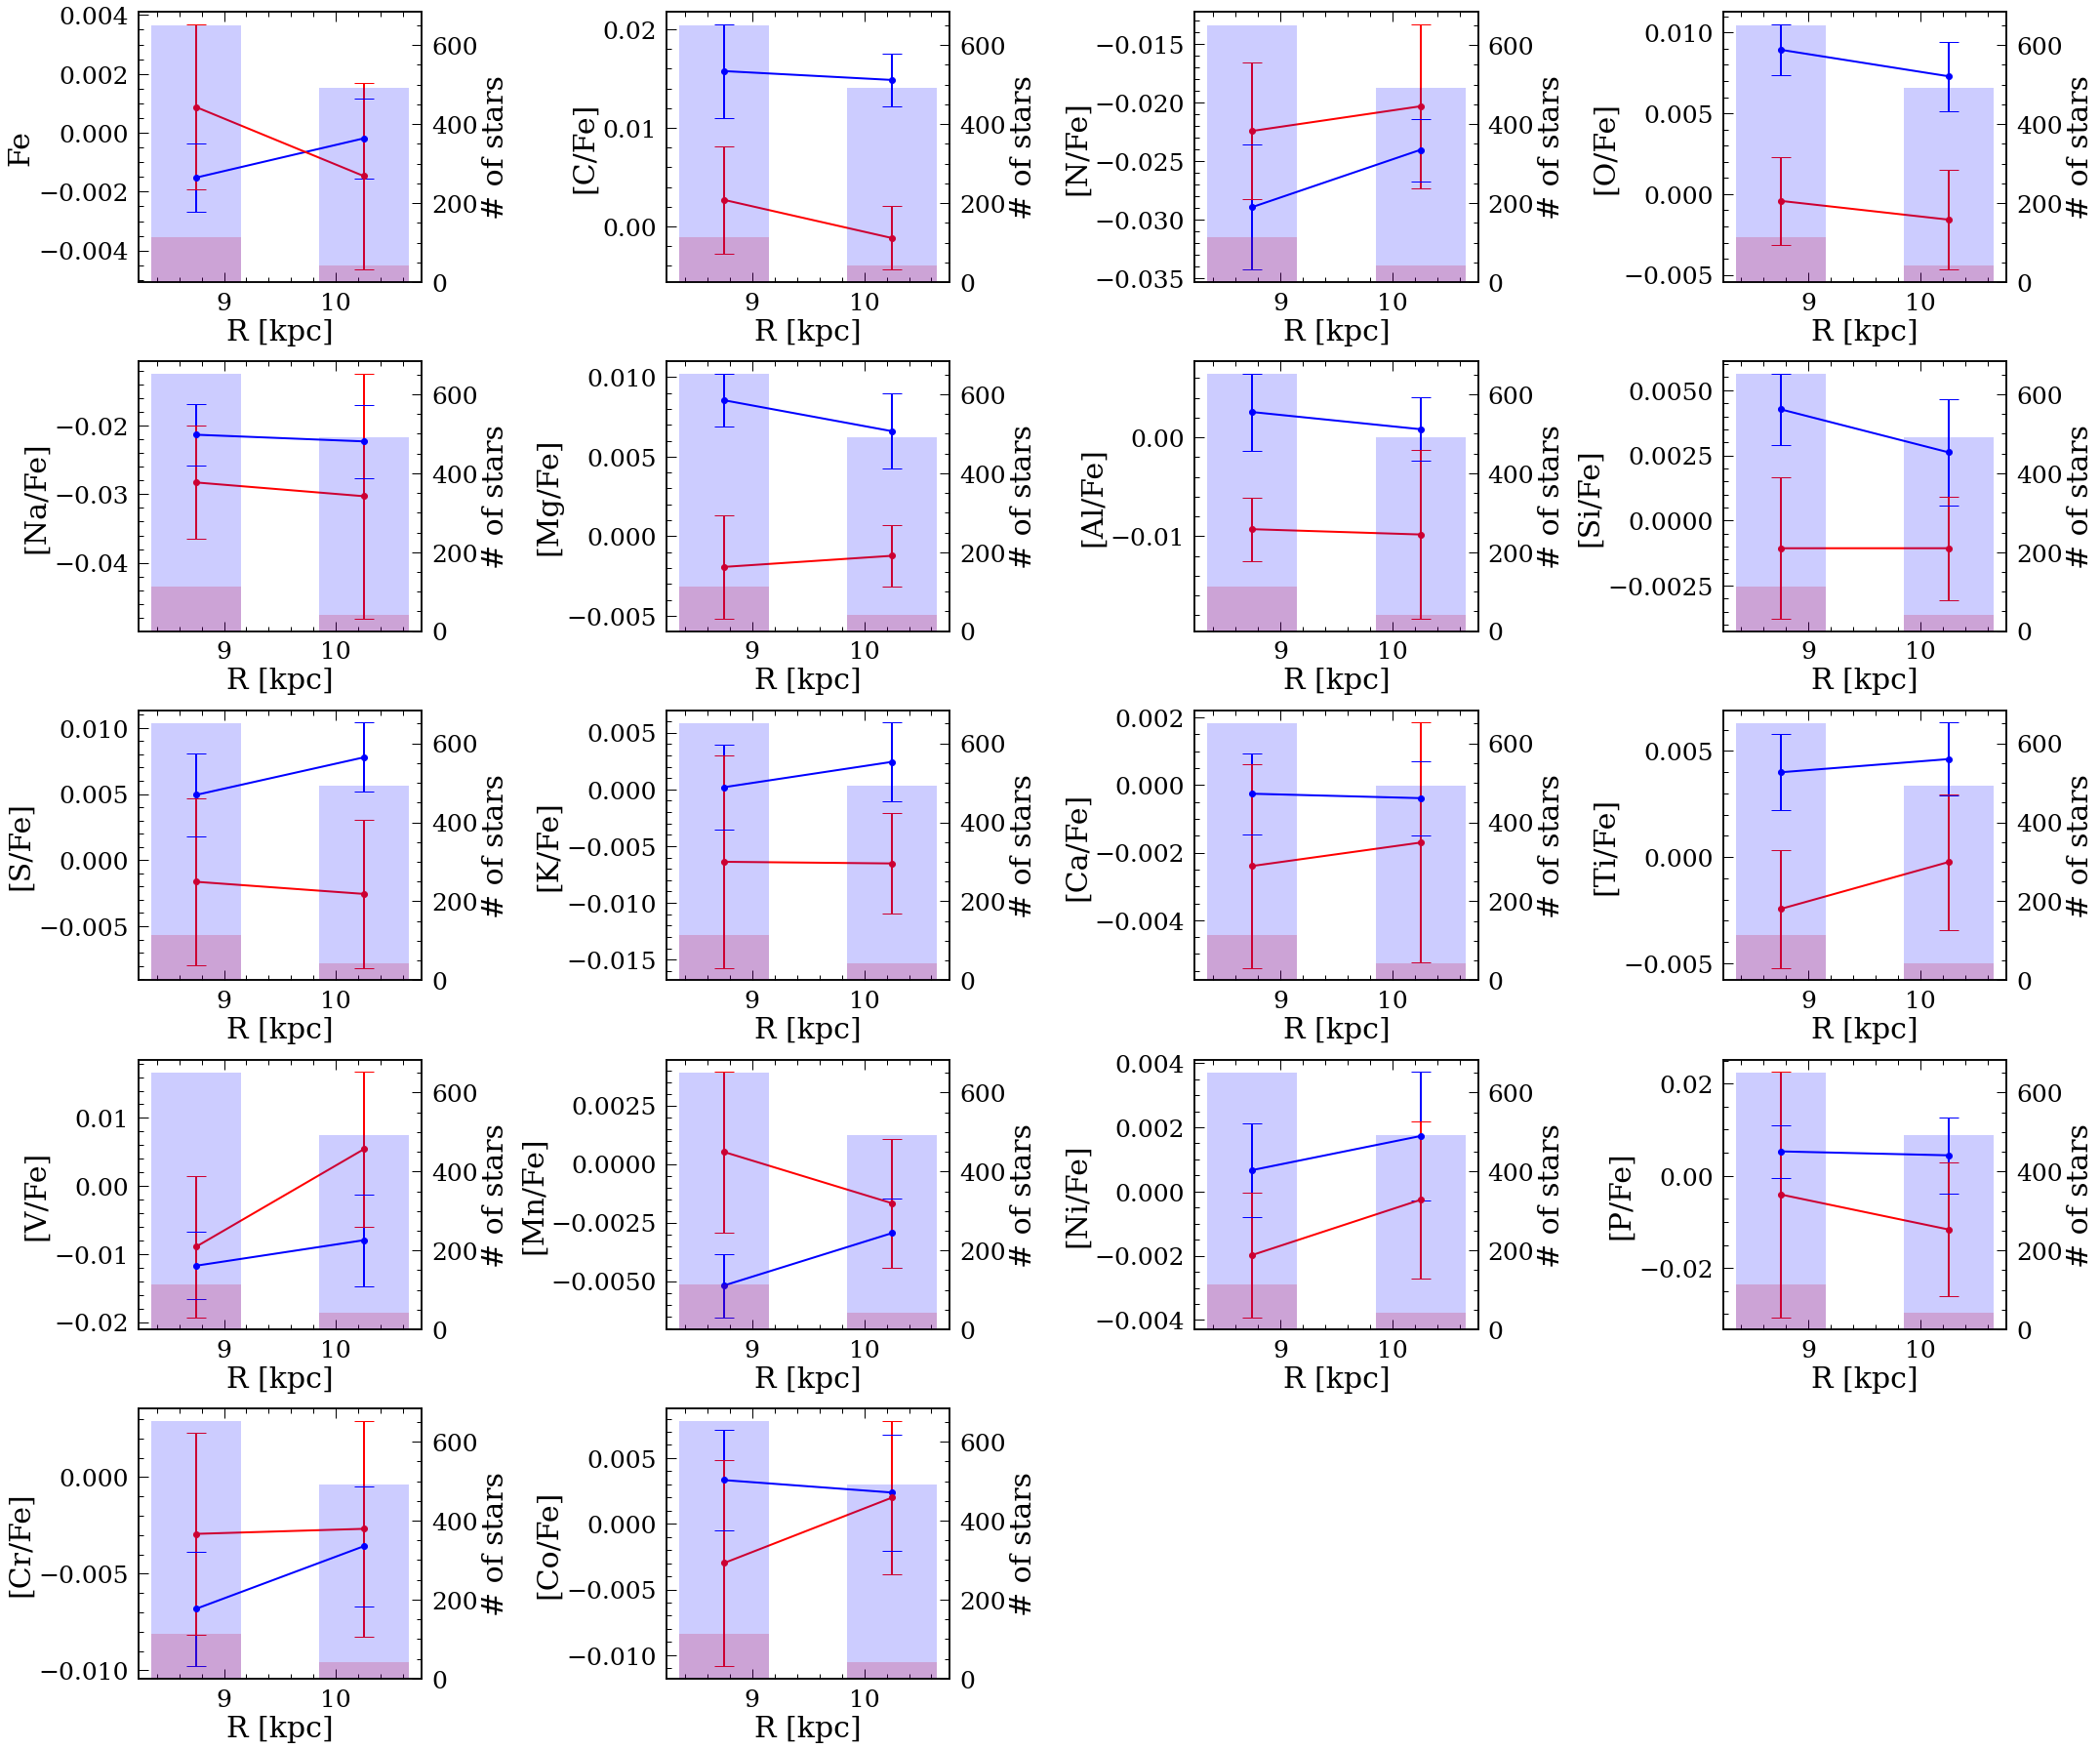

In [74]:
# -0.05, -0.15
radiusTrend(df_abun_st_ha,df_abun_st_la,1.5,8,11,'radius_bin_rc_m01.png')



In [35]:
high_alpha=df_rc[df_rc['ALPHA_M']-p(df_rc['M_H'])>=0]
low_alpha=df_rc[df_rc['ALPHA_M']-p(df_rc['M_H'])<0]

df_abun_st_ha=high_alpha.loc[abs(high_alpha['M_H']+0.1)<0.05]
df_abun_st_la=low_alpha.loc[abs(low_alpha['M_H']+0.1)<0.05]

df_abun_st_ha=df_abun_st_ha.loc[abs(df_abun_st_ha['Age'])<10]
df_abun_st_la=df_abun_st_la.loc[abs(df_abun_st_la['Age'])<10]

print(len(df_abun_st_ha),len(df_abun_st_la))

568 2547


In [36]:
abnora=df_CM.loc[df_CM['GAIA_PARALLAX']<-1000]
high_alpha=df_CM[df_CM['ALPHA_M']-p(df_CM['M_H'])>=0]
low_alpha=df_CM[df_CM['ALPHA_M']-p(df_CM['M_H'])<0]
#plt.plot(abnora['X'],abnora['Y'],'.')
#print(np.sqrt(abnora['X']**2+abnora['Y']**2))
#abnora['GAIA_R_EST'].hist()
#(1/abnora['GAIA_PARALLAX']).hist()

  2%|▏         | 2/100 [00:00<00:04, 19.81it/s]

[Fe/H] range: -0.2 , ha: 0.04727824273389907 , la: 0.039700189420655736


  2%|▏         | 2/100 [00:00<00:05, 18.98it/s]

[Fe/H] range: -0.06666666666666668 , ha: 0.0373240171470514 , la: 0.03642970071117355


  3%|▎         | 3/100 [00:00<00:03, 26.93it/s]

[Fe/H] range: 0.06666666666666665 , ha: 0.029990451954344455 , la: 0.03162177565328121


100%|██████████| 100/100 [00:00<00:00, 464.63it/s]


[Fe/H] range: 0.2 , ha: 0.027806637460721984 , la: 0.030382739432594372


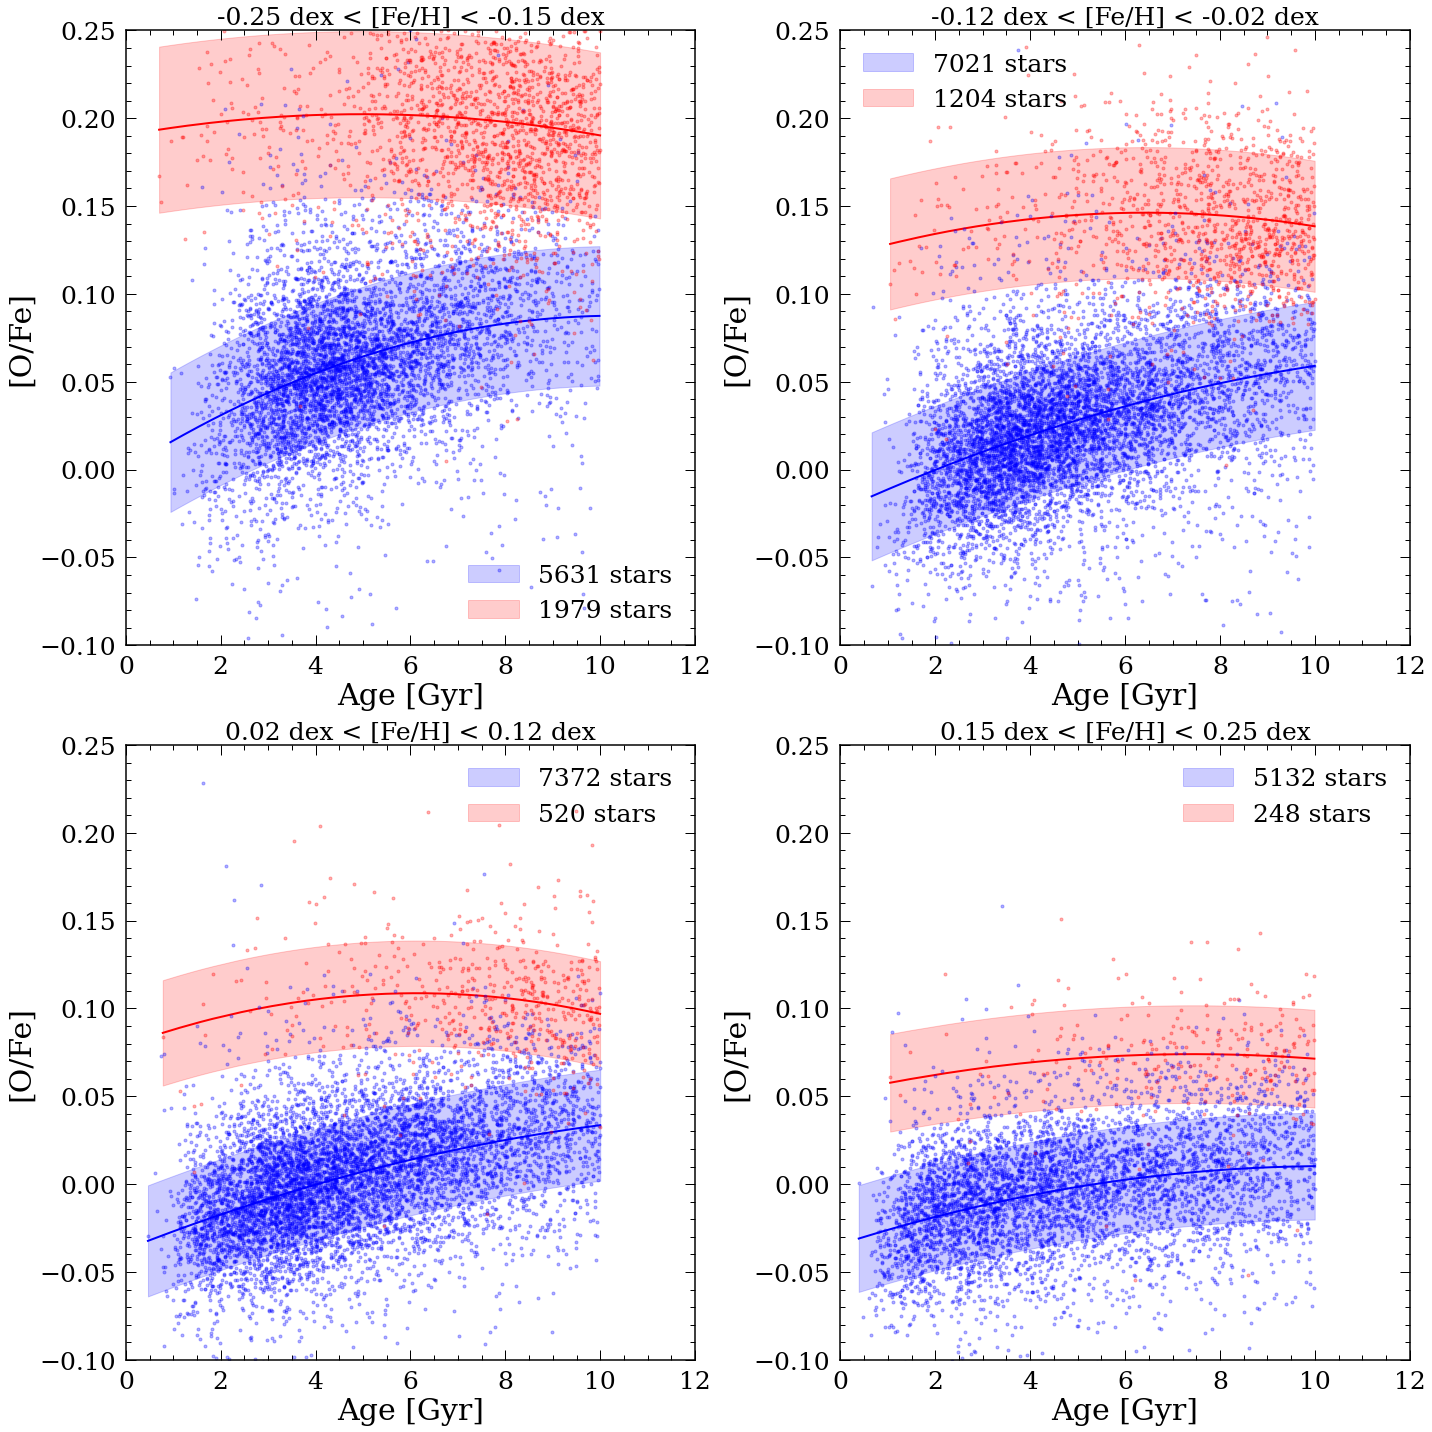

In [37]:
feage=np.linspace(-0.2,0.2,4)
plt.figure(figsize=(20,20))

for i in range(4):
    df_plot_ha=high_alpha.loc[abs(high_alpha['M_H']-feage[i])<0.05]
    df_plot_la=low_alpha.loc[abs(low_alpha['M_H']-feage[i])<0.05]

    df_plot_ha=df_plot_ha.loc[abs(df_plot_ha['Age'])<10]
    df_plot_la=df_plot_la.loc[abs(df_plot_la['Age'])<10]
    
    plt.subplot(2,2,i+1)
    z = np.polyfit(df_plot_la['Age'].values,df_plot_la['O_FE'].values,2)
    p_la = np.poly1d(z)
    z = np.polyfit(df_plot_ha['Age'].values,df_plot_ha['O_FE'].values,2)
    p_ha = np.poly1d(z)
            
            
    df_plot_la['med_age'],df_plot_la['med_abun']=df_plot_la['Age'],p_la(df_plot_la['Age'])
    df_plot_ha['med_age'],df_plot_ha['med_abun']=df_plot_ha['Age'],p_ha(df_plot_ha['Age'])
    
    df_plot_la_new=df_plot_la.dropna(subset=['med_age','med_abun']).reset_index(drop=True)
    df_plot_ha_new=df_plot_ha.dropna(subset=['med_age','med_abun']).reset_index(drop=True)
    
    df_plot_la=df_plot_la.sort_values(by=['Age'])
    df_plot_ha=df_plot_ha.sort_values(by=['Age'])
        
    plt.errorbar(df_plot_la['Age'],df_plot_la['O_FE'],fmt='b.',alpha=0.3)
    plt.errorbar(df_plot_ha['Age'],df_plot_ha['O_FE'],fmt='r.',alpha=0.3)
        
    if len(df_plot_la['Age'])!=0:   
        
        plt.plot(df_plot_la['med_age'],df_plot_la['med_abun'],'b-',alpha=1,linewidth=2)
        plt.plot(df_plot_ha['med_age'],df_plot_ha['med_abun'],'r-',alpha=1,linewidth=2)
        
        tot_la,disp_la=calc_disp(df_plot_la,'O_FE','linear',p_la)
        tot_ha,disp_ha=calc_disp(df_plot_ha,'O_FE','linear',p_ha)
                

        print('[Fe/H] range:',feage[i],', ha:',disp_ha,', la:',disp_la)

            
        lawidth_la,lawidth_ha=tot_la,tot_ha
        minla,maxla,minha,maxha=df_plot_la['med_abun']-lawidth_la,df_plot_la['med_abun']+lawidth_la,df_plot_ha['med_abun']-lawidth_ha,df_plot_ha['med_abun']+lawidth_ha
        plt.fill_between(df_plot_la['med_age'],minla,maxla,color='b',alpha=0.2,label='%d stars'%len(df_plot_la))
        plt.fill_between(df_plot_ha['med_age'],minha,maxha,color='r',alpha=0.2,label='%d stars'%len(df_plot_ha))

    plt.ylabel('[O/Fe]')
    plt.xlabel('Age [Gyr]')
    plt.ylim([-0.1,0.25])
    plt.xlim([0,12])
    plt.legend()
    if feage[i]<0:
        plt.title('%.2f dex < [Fe/H] < %.2f dex'%((feage[i])-0.05,(feage[i])+0.05),fontsize=25)
    else:
        plt.title('%.2f dex < [Fe/H] < %.2f dex'%((feage[i])-0.05,0.05+(feage[i])),fontsize=25)
plt.tight_layout()

plt.savefig('ofe_ferange.png')

### use all stars

In [34]:
df_CM_select=df_CM.loc[df_CM['SNR']>150].reset_index(drop=True)
print(len(df_CM_select))
df_CM_select=df_CM_select.loc[df_CM_select['M_H_ERR']<0.03].reset_index(drop=True)
df_CM_select=df_CM_select.loc[df_CM_select['chisq']<10000].reset_index(drop=True)
print(len(df_CM_select))

p=fitpoints([-0.75,0.11],[0.15,0.05])
high_alpha=df_CM_select[df_CM_select['ALPHA_M']-p(df_CM_select['M_H'])>=0]
low_alpha=df_CM_select[df_CM_select['ALPHA_M']-p(df_CM_select['M_H'])<0]

36190
31187


In [42]:
low_alpha['Age'].std(),low_alpha['Age_err'].median()


(2.4191418652784535, 2.336181108564264)

In [270]:
df_abun_st_ha=high_alpha.loc[abs(high_alpha['M_H'])<0.05]
df_abun_st_la=low_alpha.loc[abs(low_alpha['M_H'])<0.05]

df_abun_st_ha=df_abun_st_ha.loc[abs(df_abun_st_ha['Age'])<10]
df_abun_st_la=df_abun_st_la.loc[abs(df_abun_st_la['Age'])<10]

print(len(df_abun_st_ha),len(df_abun_st_la))

425 4118


  4%|▍         | 4/100 [00:00<00:02, 37.08it/s]

S_FE


100%|██████████| 100/100 [00:00<00:00, 324.73it/s]


(0.0, 10.0)

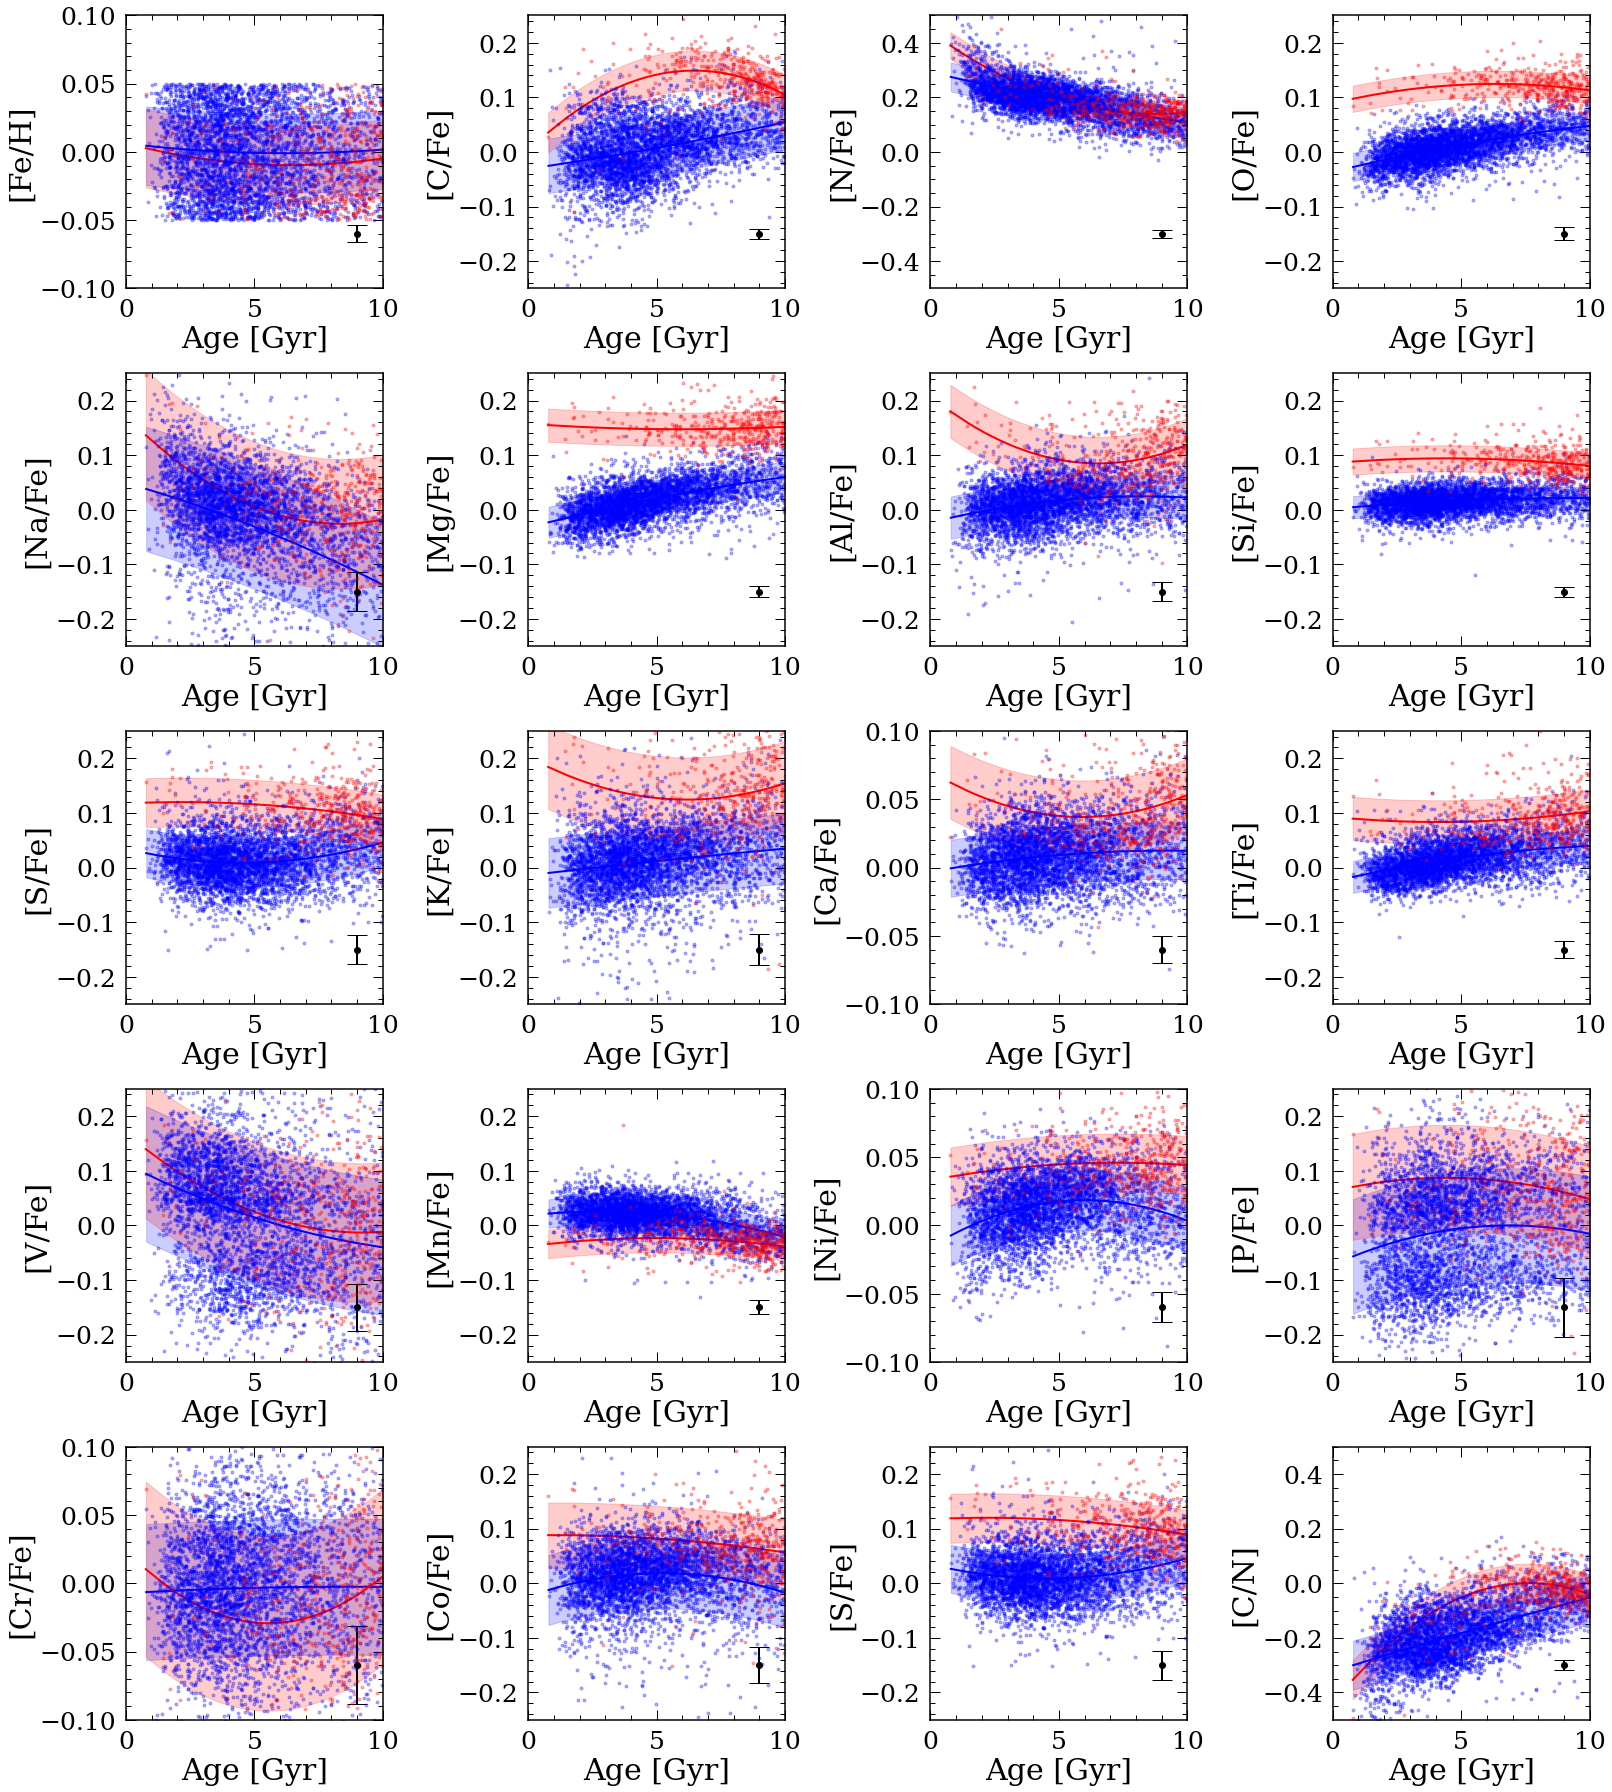

In [184]:
hi_dis, lo_dis, tot_hi_dis, tot_lo_dis, Abunname=plotTrends(df_abun_st_ha,df_abun_st_la,'abundance_rc','linear',2)
plt.xlim([0,10])

# Intrinsic dispersions/gradient

In [29]:

df_disp_plot=pd.read_pickle('../intrinsic_notemp_measureErr.pkl')
#df_disp_plot=pd.read_pickle('../intrinsic_notemp_error_chisq.pkl')

"""
df_disp_plot=pd.read_pickle('../intrinsic_notemp_error_chisq_cluster.pkl')

high_alpha=df_rc[df_rc['ALPHA_M']>=0.11]
low_alpha=df_rc[df_rc['ALPHA_M']<0.11]
df_abun_st_ha=high_alpha.loc[abs(high_alpha['M_H'])<0.05]
df_abun_st_la=low_alpha.loc[abs(low_alpha['M_H'])<0.05]
"""
elements=['C_N','AL_FE','MG_FE','C_FE','K_FE','P_FE','NA_FE','O_FE','S_FE','MN_FE',
         'TI_FE','CO_FE','SI_FE','N_FE','CA_FE','CR_FE','V_FE','NI_FE','M_H']
ha_err=[]
la_err=[]
df_abun_st_ha['C_N_ERR']=np.sqrt(df_abun_st_ha['C_FE_ERR']**2+df_abun_st_ha['N_FE_ERR']**2)
df_abun_st_la['C_N_ERR']=np.sqrt(df_abun_st_la['C_FE_ERR']**2+df_abun_st_la['N_FE_ERR']**2)

for i in elements:
    df_abun_st_ha=df_abun_st_ha.loc[df_abun_st_ha[i+"_ERR"]>0]
    df_abun_st_la=df_abun_st_la.loc[df_abun_st_la[i+"_ERR"]>0]
    ha_err.append(np.median(df_abun_st_ha[i+"_ERR"].dropna()))
    la_err.append(np.median(df_abun_st_la[i+"_ERR"].dropna()))

df_disp_plot['ha_err_all']=ha_err
df_disp_plot['la_err_all']=la_err

df_disp_plot['la_dis_astro']=np.sqrt(df_disp_plot['la_dis_astro']**2-df_disp_plot['la_err_all']**2)
df_disp_plot['ha_dis_astro']=np.sqrt(df_disp_plot['ha_dis_astro']**2-df_disp_plot['ha_err_all']**2)
df_disp_plot['la_dis_rc']=np.sqrt(df_disp_plot['la_dis_rc']**2-df_disp_plot['la_err_all']**2)
df_disp_plot['ha_dis_rc']=np.sqrt(df_disp_plot['ha_dis_rc']**2-df_disp_plot['ha_err_all']**2)



In [6]:
# With Dan
df_disp_plot=pd.read_pickle('../intrinsic_Dan_measureErr.pkl')


In [7]:
df_disp_plot

Abund  la_dis_astro  la_dis_astro_err1  la_dis_astro_err2  ha_dis_astro  \
0     Na      0.098814           0.004098           0.004366      0.144847   
1      K      0.073357           0.003004           0.003175      0.089810   
2     Al      0.034778           0.001512           0.001606      0.044354   
3     Mg      0.027811           0.001166           0.001217      0.037134   
4      N      0.042237           0.001934           0.002032      0.068674   
5      P      0.116151           0.005256           0.005445      0.087509   
6      C      0.047716           0.001805           0.001900      0.046372   
7      O      0.035087           0.001505           0.001585      0.028966   
8      S      0.050466           0.002446           0.002517      0.051651   
9     Ti      0.027859           0.001416           0.001478      0.037691   
10    Mn      0.019089           0.001085           0.001122      0.028316   
11    Si      0.020880           0.000932           0.000974      0.025766   
12    Co      0.080635           0.003491           0.003668      0.054888   
13    Ca      0.019244           0.000950           0.000985      0.022558   
14    Ni      0.014504           0.000931           0.000960      0.020826   
15     V      0.142410           0.007378           0.008114      0.117760   
16    Cr      0.070598           0.002954           0.003100      0.038738   
17    Fe      0.027545           0.000980           0.001035      0.030542   

    ha_dis_astro_err1  ha_dis_astro_err2  ha_m_astro  ha_m_astro_err1  \
0            0.014121           0.016268   -0.017051         0.008075   
1            0.008899           0.010110   -0.000110         0.005076   
2            0.004583           0.005276   -0.003765         0.002647   
3            0.003517           0.004040    0.001128         0.002154   
4            0.006699           0.007703   -0.015435         0.003849   
5            0.011439           0.012856   -0.000307         0.005882   
6            0.004297           0.004928    0.002390         0.002565   
7            0.003086           0.003514    0.001043         0.001751   
8            0.006281           0.007179   -0.001434         0.003376   
9            0.004169           0.004742    0.001916         0.002455   
10           0.003224           0.003693   -0.002115         0.001847   
11           0.002588           0.002996   -0.000141         0.001541   
12           0.007227           0.008136   -0.005439         0.003777   
13           0.002659           0.002960    0.002284         0.001438   
14           0.002622           0.002991    0.002400         0.001334   
15           0.012325           0.014209   -0.009812         0.007494   
16           0.006188           0.006751    0.001262         0.002823   
17           0.002809           0.003237   -0.000560         0.001697   

    ha_m_astro_err2  ...  la_b_rc_err1  la_b_rc_err2  ha_rc_err_all  \
0          0.008183  ...      0.005661      0.005640       0.035628   
1          0.004964  ...      0.003847      0.003852       0.028150   
2          0.002639  ...      0.002662      0.002636       0.017253   
3          0.002095  ...      0.001458      0.001433       0.009923   
4          0.003830  ...      0.002883      0.002874       0.014634   
5          0.005896  ...      0.005917      0.005847       0.052761   
6          0.002577  ...      0.002532      0.002580       0.009118   
7          0.001723  ...      0.001415      0.001419       0.011333   
8          0.003346  ...      0.002178      0.002199       0.027342   
9          0.002423  ...      0.001471      0.001498       0.014638   
10         0.001906  ...      0.001155      0.001141       0.012650   
11         0.001517  ...      0.001055      0.001040       0.009337   
12         0.003797  ...      0.003564      0.003513       0.031946   
13         0.001435  ...      0.001051      0.001077       0.010172   
14         0.001308  ...      0.001395      0.001389       0.011095

In [8]:
Nesselement=['Fe','C','N','O','Na','Mg','Al','Si','S','K','Ca','Ti','V','Mn','Ni','P','Cr','Co','Rb','C/N']
Ness2019=[np.nan,0.018,-0.02,0.01,-0.031,0.01,0.011,0.004,0.002,0.007,-0.001,0.006,-0.004,-0.003,0.003,-0.012,
         -0.005,0.008,-0.002,0.038]
Ness2019_err=[np.nan,0.001,0.002,0.001,0.003,0.001,0.001,0.001,0.002,0.001,0.001,0.001,0.002,0.001,0.001,
             0.003,0.001,0.002,0.002,0.0016]
df_disp_plot=pd.merge(pd.DataFrame(np.array((Nesselement,Ness2019,Ness2019_err)).T,
                                   columns=['Abund','Ness2019','Ness2019_err']),df_disp_plot,left_on='Abund',
                     right_on='Abund',how='inner')


df_disp_plot

Abund Ness2019 Ness2019_err  la_dis_astro  la_dis_astro_err1  \
0     Fe      nan          nan      0.027545           0.000980   
1      C    0.018        0.001      0.047716           0.001805   
2      N    -0.02        0.002      0.042237           0.001934   
3      O     0.01        0.001      0.035087           0.001505   
4     Na   -0.031        0.003      0.098814           0.004098   
5     Mg     0.01        0.001      0.027811           0.001166   
6     Al    0.011        0.001      0.034778           0.001512   
7     Si    0.004        0.001      0.020880           0.000932   
8      S    0.002        0.002      0.050466           0.002446   
9      K    0.007        0.001      0.073357           0.003004   
10    Ca   -0.001        0.001      0.019244           0.000950   
11    Ti    0.006        0.001      0.027859           0.001416   
12     V   -0.004        0.002      0.142410           0.007378   
13    Mn   -0.003        0.001      0.019089           0.001085   
14    Ni    0.003        0.001      0.014504           0.000931   
15     P   -0.012        0.003      0.116151           0.005256   
16    Cr   -0.005        0.001      0.070598           0.002954   
17    Co    0.008        0.002      0.080635           0.003491   

    la_dis_astro_err2  ha_dis_astro  ha_dis_astro_err1  ha_dis_astro_err2  \
0            0.001035      0.030542           0.002809           0.003237   
1            0.001900      0.046372           0.004297           0.004928   
2            0.002032      0.068674           0.006699           0.007703   
3            0.001585      0.028966           0.003086           0.003514   
4            0.004366      0.144847           0.014121           0.016268   
5            0.001217      0.037134           0.003517           0.004040   
6            0.001606      0.044354           0.004583           0.005276   
7            0.000974      0.025766           0.002588           0.002996   
8            0.002517      0.051651           0.006281           0.007179   
9            0.003175      0.089810           0.008899           0.010110   
10           0.000985      0.022558           0.002659           0.002960   
11           0.001478      0.037691           0.004169           0.004742   
12           0.008114      0.117760           0.012325           0.014209   
13           0.001122      0.028316           0.003224           0.003693   
14           0.000960      0.020826           0.002622           0.002991   
15           0.005445      0.087509           0.011439           0.012856   
16           0.003100      0.038738           0.006188           0.006751   
17           0.003668      0.054888           0.007227           0.008136   

    ha_m_astro  ...  la_b_rc_err1  la_b_rc_err2  ha_rc_err_all  la_rc_err_all  \
0    -0.000560  ...      0.001575      0.001573       0.006309       0.006444   
1     0.002390  ...      0.002532      0.002580       0.009118       0.010033   
2    -0.015435  ...      0.002883      0.002874       0.014634       0.015825   
3     0.001043  ...      0.001415      0.001419       0.011333       0.012677   
4    -0.017051  ...      0.005661      0.005640       0.035628       0.036986   
5     0.001128  ...      0.001458      0.001433       0.009923       0.010072   
6    -0.003765  ...      0.002662      0.002636       0.017253       0.017622   
7    -0.000141  ...      0.001055      0.001040       0.009337       0.009605   
8    -0.001434  ...      0.002178      0.002199       0.027342       0.027617   
9    -0.000110  ...      0.003847      0.003852       0.028150       0.028426   
10    0.002284  ...      0.001051      0.001077       0.010172       0.010550   
11    0.001916  ...      0.001471      0.001498       0.014638       0.015611   
12   -0.009812  ...      0.005693      0.005682       0.041665       0.044508   
13   -0.002115  ...      0.001155      0.001141       0.012650       0.013034   
14    0.002400  ...      0.001395      0.001389   

In [9]:
m=[i for i in df_disp_plot['Abund'] if 'Na' not in i]
df_disp_plot=df_disp_plot.loc[df_disp_plot['Abund'].isin(m)]

In [10]:
m=df_disp_plot['Abund'].isin(['C/N','V'])

df_disp_plot=df_disp_plot[~m]

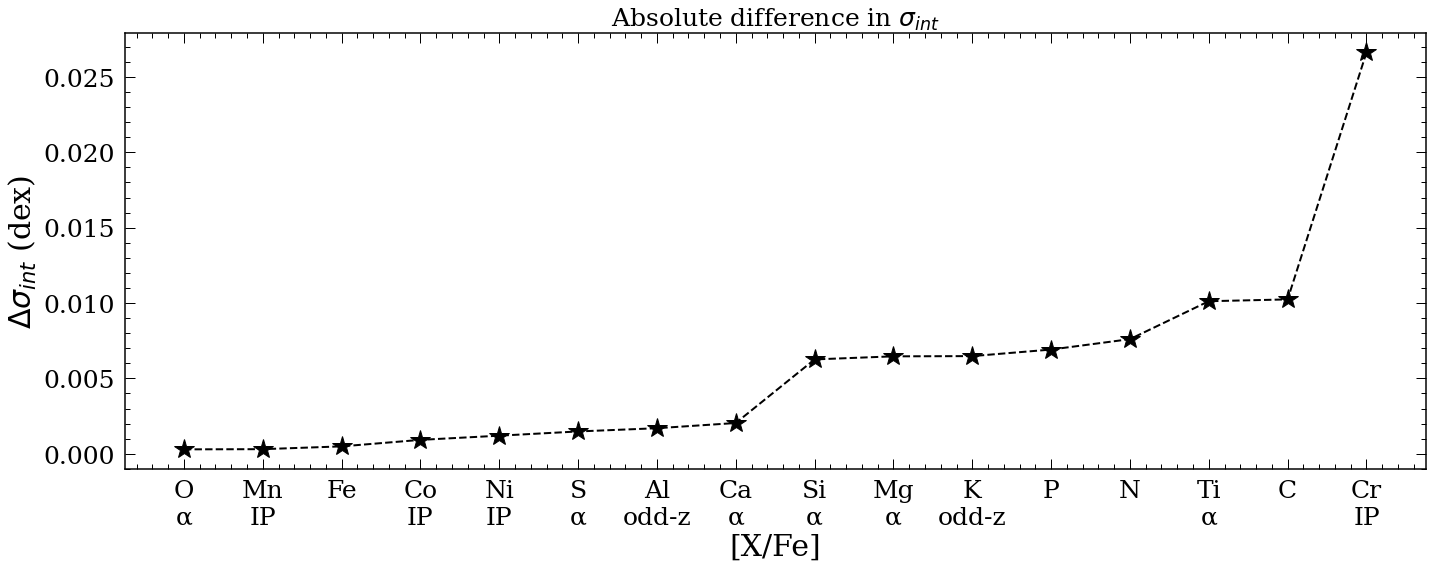

In [30]:
# change measurement error
plt.figure(figsize=(20,8))
df_disp_plot['diff']=abs(df_disp_plot['la_dis_rc']-df_disp_plot['ha_dis_rc'])
df_disp_plot['Abund_elementtype']=['O\nα','Mn\nIP','Fe','Co\nIP','Ni\nIP',
                                   'S\nα','Al\nodd-z','Ca\nα','Si\nα','Mg\nα','K\nodd-z','P','N',
                                  'Ti\nα','C','Cr\nIP']
df_disp_plot=df_disp_plot.sort_values(by='diff')
plt.plot(df_disp_plot['Abund_elementtype'],df_disp_plot['diff'],'k--*',markersize=20)
plt.ylabel('$\Delta \sigma_{int}$ (dex)')
plt.title('Absolute difference in $\sigma_{int}$', fontsize=25)
plt.xlabel('[X/Fe]')
plt.tight_layout()
plt.savefig('dispersion_comp_2dpoly_rc.png')



0.036452546674402335 0.031192985173043693


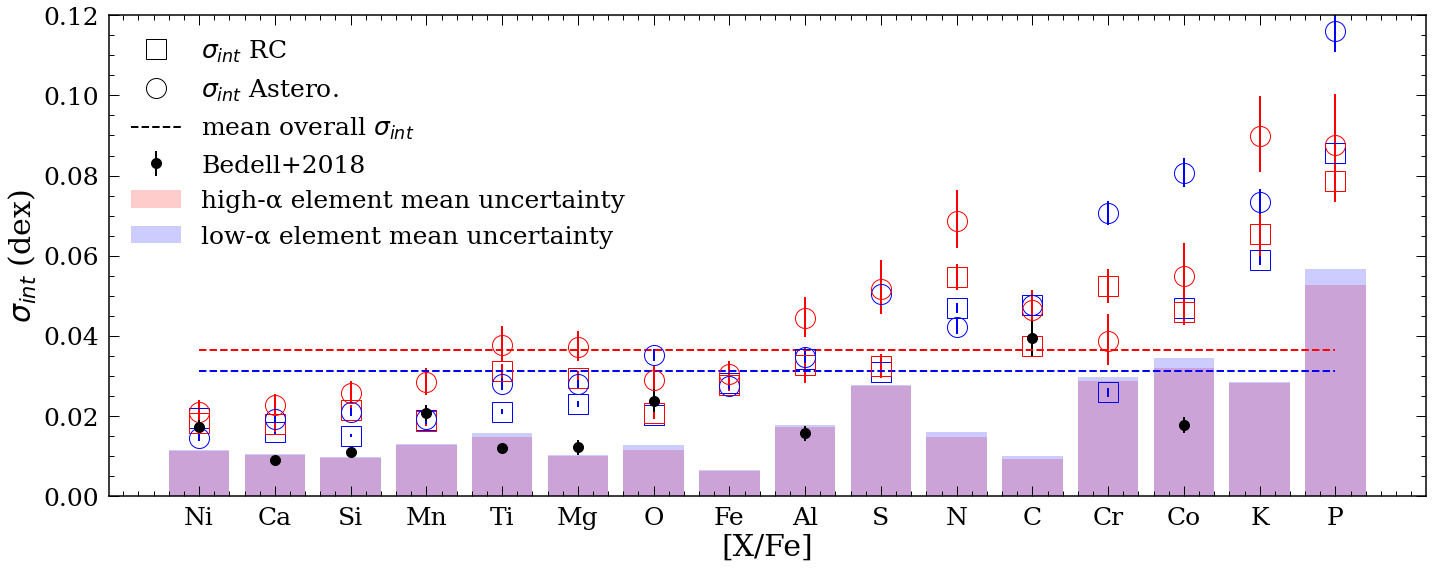

In [24]:
# change measurement error
df_disp_plot=df_disp_plot.reset_index(drop=True)
df_disp_plot['disp_ave_hi']=(df_disp_plot['ha_dis_rc']+df_disp_plot['ha_dis_astro'])/2.
df_disp_plot['disp_ave_la']=(df_disp_plot['la_dis_rc']+df_disp_plot['la_dis_astro'])/2.

plt.figure(figsize=(20,8))

df_disp_plot=df_disp_plot.sort_values(by='disp_ave_la')

plt.errorbar(df_disp_plot['Abund'],df_disp_plot['la_dis_rc'],yerr=[df_disp_plot['la_dis_rc_err1'],df_disp_plot['la_dis_rc_err2']],
             fmt='bs',fillstyle='none',markersize=20)
plt.errorbar(df_disp_plot['Abund'],df_disp_plot['ha_dis_rc'],yerr=[df_disp_plot['ha_dis_rc_err1'],df_disp_plot['ha_dis_rc_err2']],
         fmt='rs',fillstyle='none',markersize=20)

plt.errorbar(df_disp_plot['Abund'],df_disp_plot['la_dis_astro'],yerr=[df_disp_plot['la_dis_astro_err1'],df_disp_plot['la_dis_astro_err2']],
             fmt='bo',fillstyle='none',markersize=20)
plt.errorbar(df_disp_plot['Abund'],df_disp_plot['ha_dis_astro'],yerr=[df_disp_plot['ha_dis_astro_err1'],df_disp_plot['ha_dis_astro_err2']],
             fmt='ro',fillstyle='none',markersize=20)

plt.errorbar(df_disp_plot['Abund'],df_disp_plot['s'],yerr=df_disp_plot['s_err'],
             fmt='ko',label='Bedell+2018',markersize=10)

"""
plt.errorbar(df_disp_plot['Abund'],df_disp_plot['Ness2019'],yerr=df_disp_plot['Ness2019_err'],
             fmt='k^',label='Ness+2018',markersize=10)
"""
# to generate simple legends
plt.plot(df_disp_plot['Abund'][0],[-1],'ks',fillstyle='none',
         label='$\sigma_{int}$ RC',markersize=20)
plt.plot(df_disp_plot['Abund'][0],[-1],'ko',fillstyle='none',
         label='$\sigma_{int}$ Astero.',markersize=20)
plt.plot(df_disp_plot['Abund'][0],[-1],'k--',
         label='mean overall $\sigma_{int}$')


plt.bar(df_disp_plot['Abund'].values,df_disp_plot['ha_rc_err_all'].values,alpha=0.2,
        color='r',label='high-α element mean uncertainty')
plt.bar(df_disp_plot['Abund'].values,df_disp_plot['la_rc_err_all'].values,alpha=0.2,
        color='b',label='low-α element mean uncertainty')


meanhadisp=np.median(df_disp_plot['disp_ave_hi'].dropna())
meanladisp=np.median(df_disp_plot['disp_ave_la'].dropna())
print(meanhadisp,meanladisp)

plt.plot(df_disp_plot['Abund'],np.ones(len(df_disp_plot['disp_ave_hi']))*meanhadisp,'r--')
plt.plot(df_disp_plot['Abund'],np.ones(len(df_disp_plot['disp_ave_la']))*meanladisp,'b--')
plt.ylabel('$\sigma_{int}$ (dex)')
plt.ylim([0,0.12])
plt.xlabel('[X/Fe]')
plt.legend()
plt.tight_layout()
plt.savefig('dispersion_comp.png')

In [22]:
(0.031192985173043693-0.036452546674402335)/0.031192985173043693

-0.16861359924935435

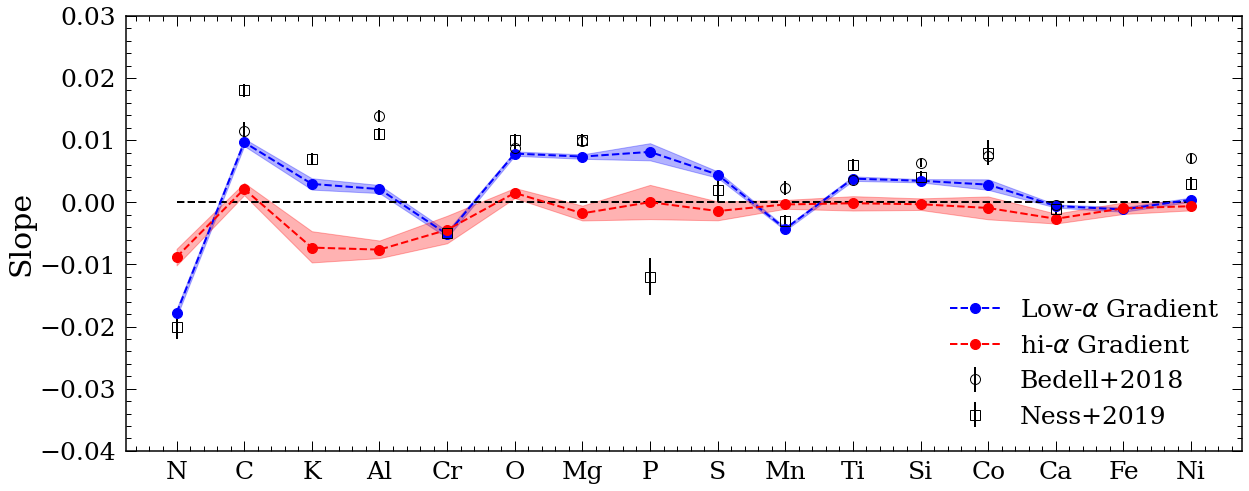

In [21]:
df_disp_plot['Ness2019']=[float(i) for i in df_disp_plot['Ness2019']]
df_disp_plot['Ness2019_err']=[float(i) for i in df_disp_plot['Ness2019_err']]

df_disp_plot['diff']=(abs(df_disp_plot['la_m_rc'])+abs(df_disp_plot['ha_m_rc']))/2
df_disp_plot=df_disp_plot.sort_values(by='diff',ascending=False)
plt.figure(figsize=(20,8))
plt.errorbar(df_disp_plot['Abund'],df_disp_plot['la_m_rc'],
             fmt='bo--',label='Low-$\\alpha$ Gradient',markersize=10)
plt.fill_between(df_disp_plot['Abund'],df_disp_plot['la_m_rc']-df_disp_plot['la_m_rc_err1'],
                df_disp_plot['la_m_rc']+df_disp_plot['la_m_rc_err2'],color='b',alpha=0.3)

plt.errorbar(df_disp_plot['Abund'],df_disp_plot['ha_m_rc'],
             fmt='ro--',label='hi-$\\alpha$ Gradient',markersize=10)
plt.fill_between(df_disp_plot['Abund'],df_disp_plot['ha_m_rc']-df_disp_plot['ha_m_rc_err1'],
                df_disp_plot['ha_m_rc']+df_disp_plot['ha_m_rc_err2'],color='r',alpha=0.3)

plt.errorbar(df_disp_plot['Abund'],df_disp_plot['m'],yerr=df_disp_plot['m_err'],
             fmt='ko',label='Bedell+2018',markersize=10,markerfacecolor='none')

plt.errorbar(df_disp_plot['Abund'],df_disp_plot['Ness2019'],yerr=df_disp_plot['Ness2019_err'],
             fmt='ks',label='Ness+2019',markersize=10,markerfacecolor='none')

plt.plot(df_disp_plot['Abund'],np.zeros(len(df_disp_plot['Abund'])),'k--')

plt.ylim([-0.04,0.03])
plt.ylabel('Slope')
plt.legend()
plt.savefig('slopes.png')

# Fe-age

In [22]:
df_CM=pd.read_pickle('../CannonDR16_cut.pkl')

In [23]:
check='DP'
print(max(df_CM[check]),min(df_CM[check]))

504.7023609770504 -68.90815173872488


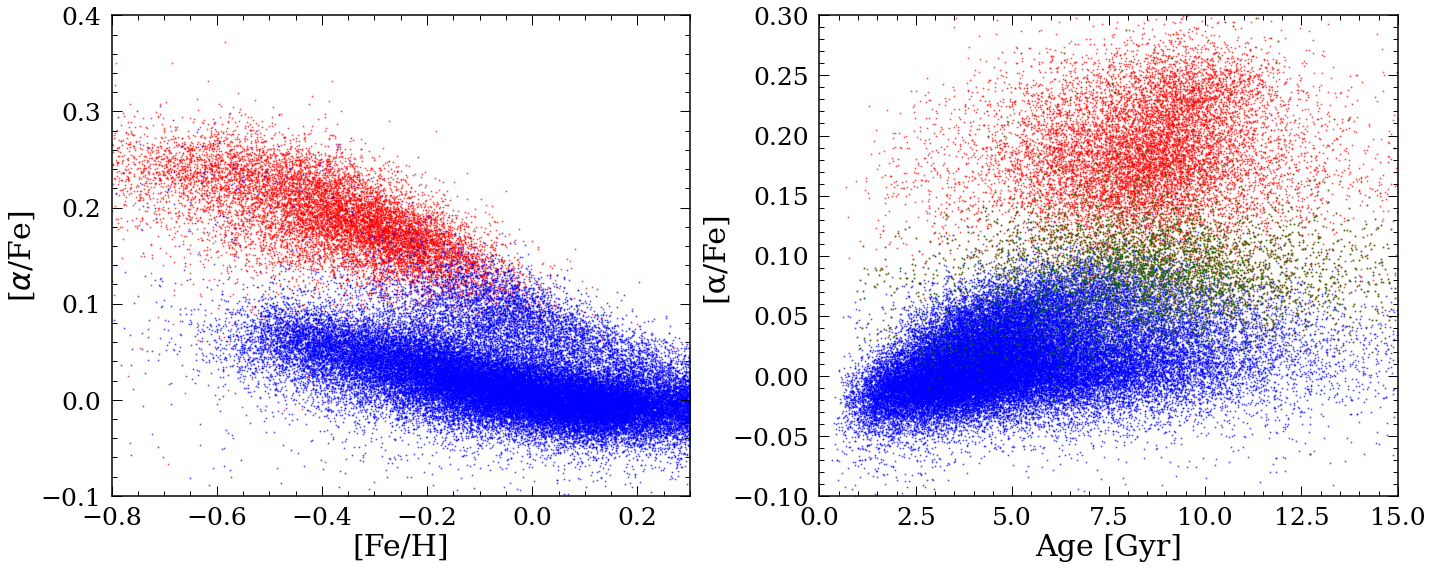

In [24]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.scatter(df_CM.loc[df_CM['hi_low']==1]['M_H'],df_CM.loc[df_CM['hi_low']==1]['ALPHA_M'],c='r',s=1,alpha=0.5)
plt.scatter(df_CM.loc[df_CM['hi_low']==0]['M_H'],df_CM.loc[df_CM['hi_low']==0]['ALPHA_M'],c='b',s=1,alpha=0.5)
plt.xlim([-0.8,0.3])
plt.ylim([-0.1,0.4])
plt.xlabel('[Fe/H]')
plt.ylabel('[$\\alpha$/Fe]')

third=df_CM.loc[df_CM['hi_low_line']!=df_CM['hi_low']]

plt.subplot(1,2,2)
plt.scatter(df_CM.loc[df_CM['hi_low_line']==1]['Age'],df_CM.loc[df_CM['hi_low_line']==1]['ALPHA_M'],c='r',s=1,
           alpha=0.5)
plt.scatter(df_CM.loc[df_CM['hi_low_line']==0]['Age'],df_CM.loc[df_CM['hi_low_line']==0]['ALPHA_M'],c='b',s=1,
            alpha=0.5)
plt.scatter(third['Age'],third['ALPHA_M'],c='g',s=1,alpha=0.5)
plt.xlim([0,15])
plt.ylim([-0.1,0.3])
plt.xlabel('Age [Gyr]')
plt.ylabel('[α/Fe]')


plt.tight_layout()
plt.savefig('allstarFealpha_cluster.png')

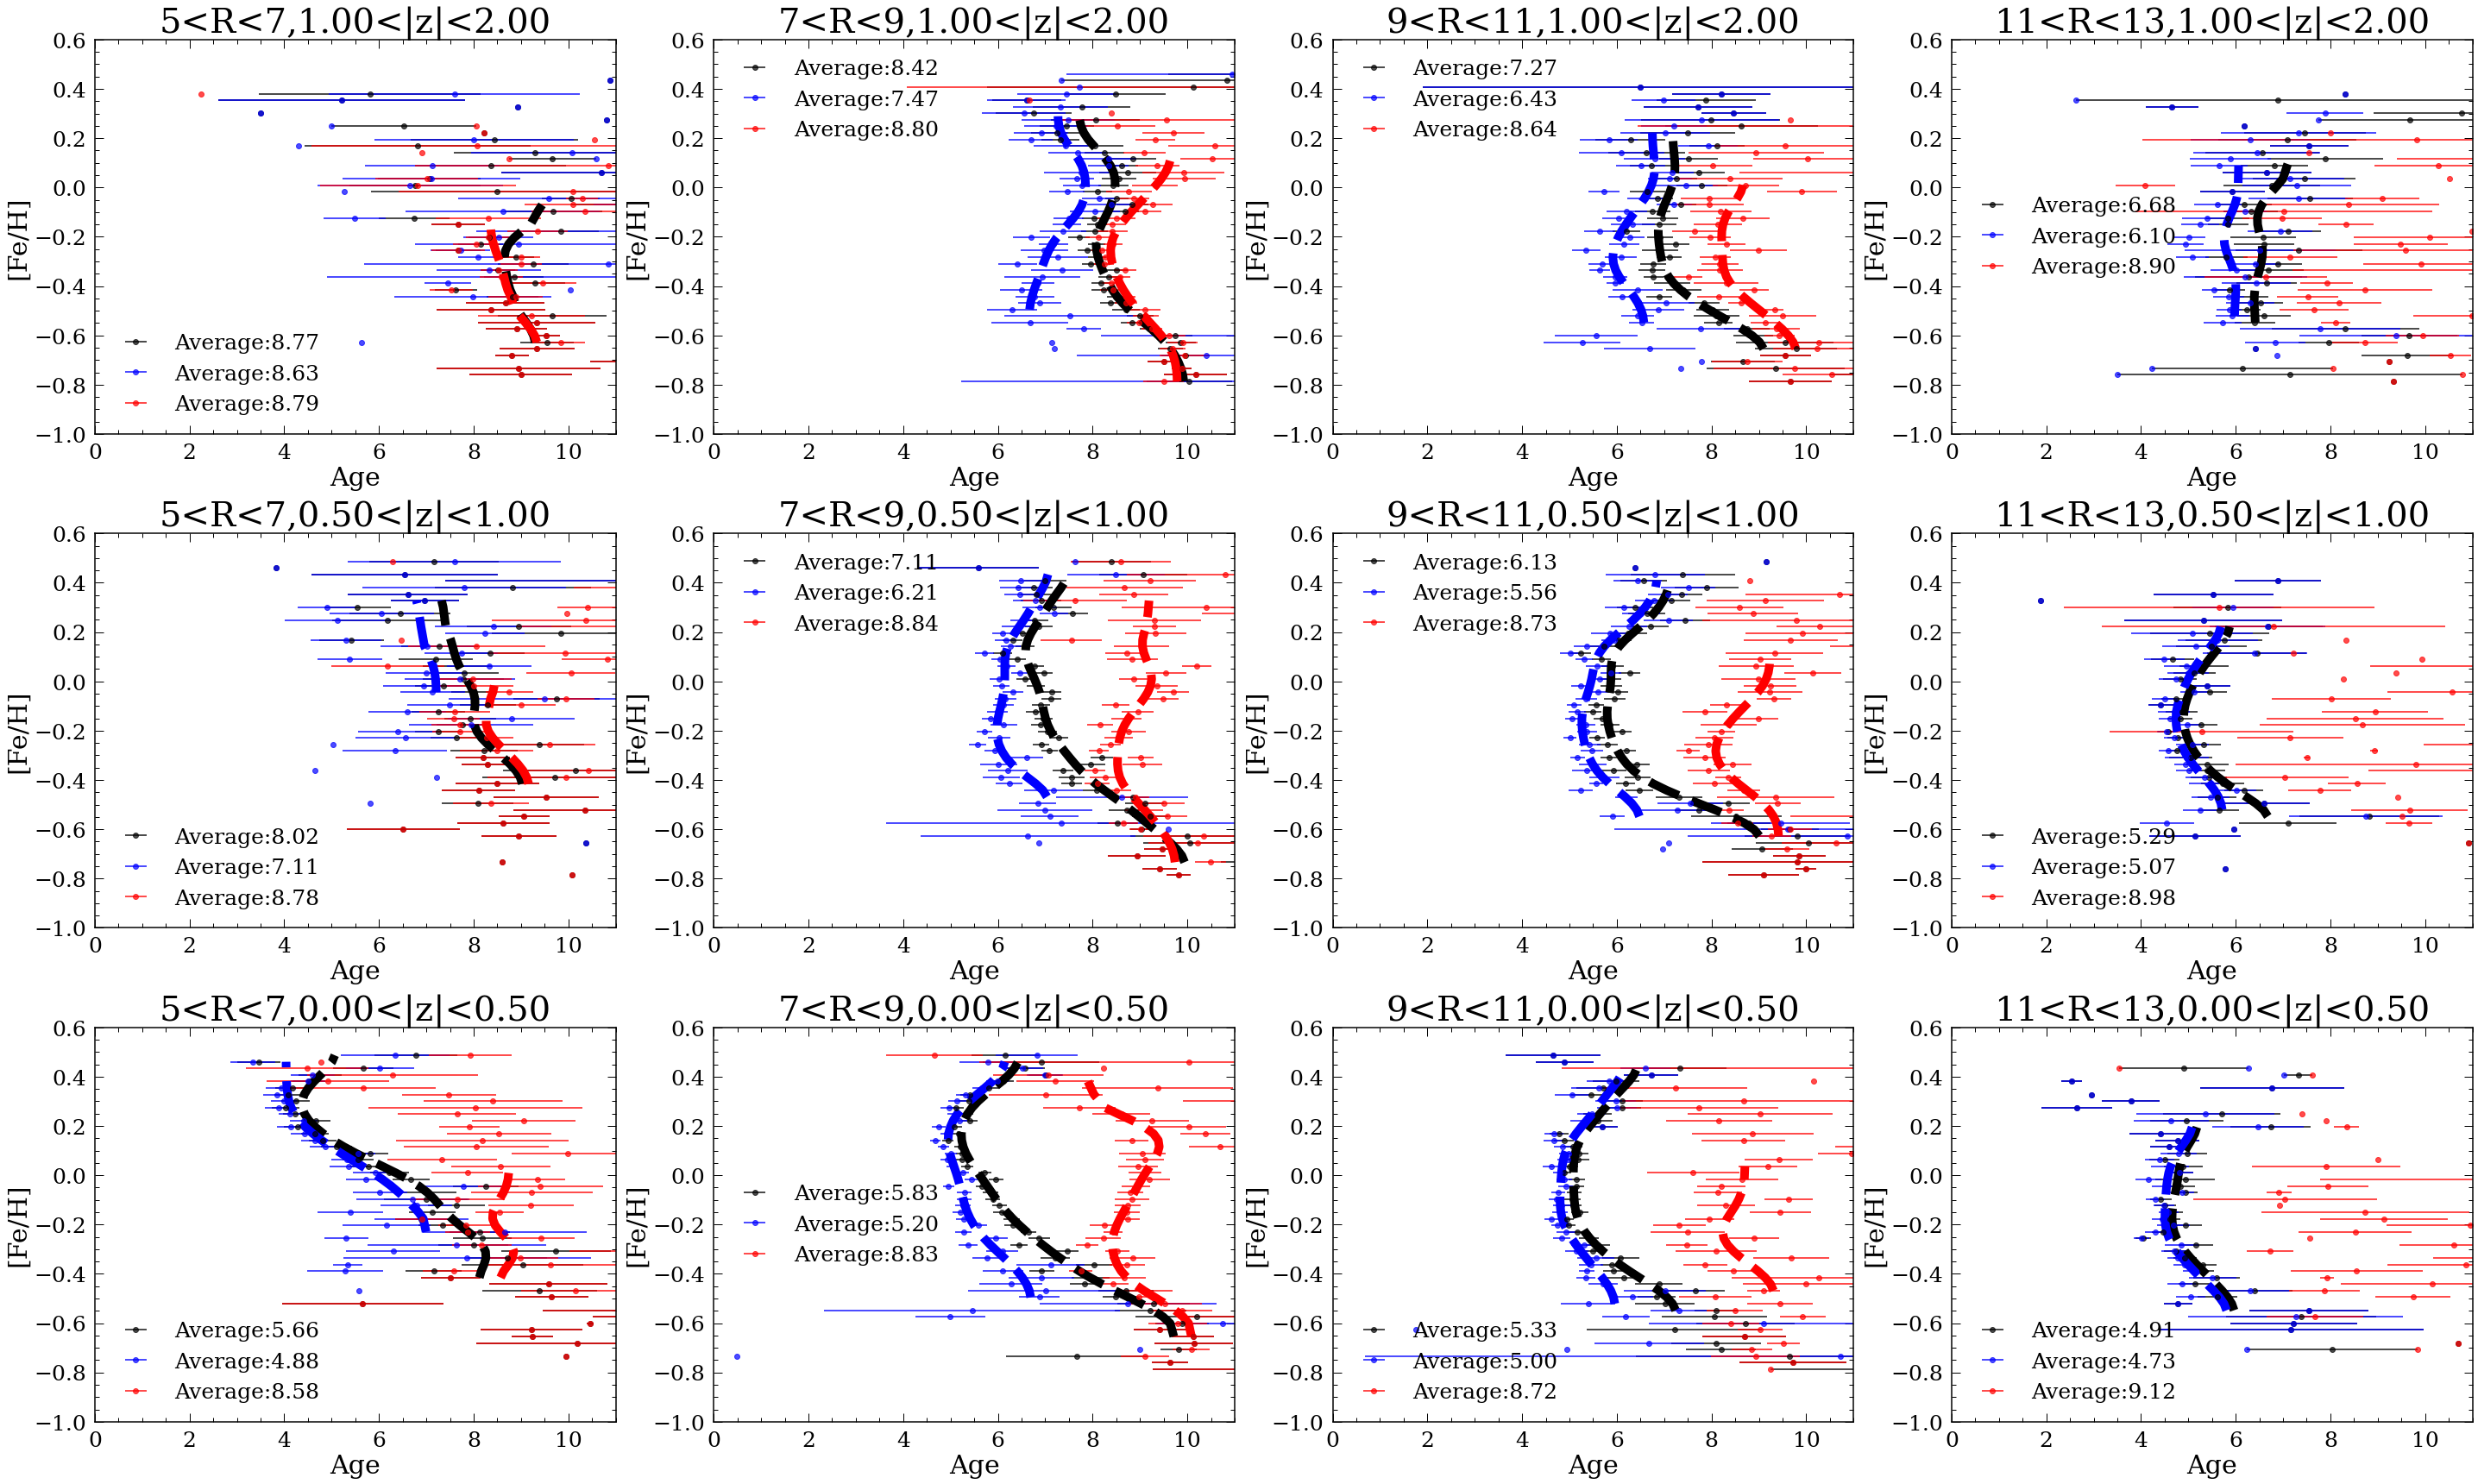

In [25]:
#Rbin=[5,7,9,11,13]
#zbin=[0,0.5,1,2]
#Rbin=[2,1,0.5,0]
Rbin=[2,1,0.5,0]
#zbin=[5,7,9,11,13]
zbin=[5,7,9,11,13]
plt.figure(figsize=(40,24))
count=1
for i in range(len(Rbin)-1):
    df_all=df_CM.loc[df_CM['z']>Rbin[i+1]]
    df_all=df_all.loc[df_all['z']<Rbin[i]]
        
    for j in range(len(zbin)-1):
        df_all_z=df_all.loc[abs(df_all['R'])>zbin[j]]
        df_all_z=df_all_z.loc[abs(df_all_z['R'])<zbin[j+1]]
        
        df_all_z=df_all_z.dropna(subset=['M_H','Age'])
        
        ha_bin_z=df_all_z.loc[df_all_z['hi_low_line']==1]
        la_bin_z=df_all_z.loc[df_all_z['hi_low_line']==0]
        
        #meanfeh,meanage,meanage_err,starnumb=getave_age(df_all_z['Age'].values,df_all_z['M_H'].values)
        allage=np.append(la_bin_z['Age'].values,ha_bin_z['Age'].values)
        allmh=np.append(la_bin_z['M_H'].values,ha_bin_z['M_H'].values)
        meanfeh,meanage,meanage_err,starnumb=getave_age(allage,allmh)
        
        meanfeh_la,meanage_la,meanage_err_la,starnumb_la=getave_age(la_bin_z['Age'].values,
                                                                    la_bin_z['M_H'].values)
        meanfeh_ha,meanage_ha,meanage_err_ha,starnumb_ha=getave_age(ha_bin_z['Age'].values,
                                                                    ha_bin_z['M_H'].values)
        
        
        
        clear_output(wait = True)
        plt.subplot(3,4,count)
        
        m=(meanfeh!=0)
        meanfeh,meanage,meanage_err,starnumb=meanfeh[m],meanage[m],meanage_err[m],starnumb[m]
        m2=starnumb>10
        filterage=gaussian_filter(meanage[m2], sigma=3)
        plt.plot(filterage,meanfeh[m2],'k--',linewidth=10)
        
        m=(meanfeh_la!=0)
        meanfeh_la,meanage_la,meanage_err_la,starnumb_la=meanfeh_la[m],meanage_la[m],meanage_err_la[m],starnumb_la[m]
        m2=starnumb_la>10
        filterage=gaussian_filter(meanage_la[m2], sigma=3)
        plt.plot(filterage,meanfeh_la[m2],'b--',linewidth=10)
        
        m=(meanfeh_ha!=0)
        meanfeh_ha,meanage_ha,meanage_err_ha,starnumb_ha=meanfeh_ha[m],meanage_ha[m],meanage_err_ha[m],starnumb_ha[m]
        m2=starnumb_ha>10
        filterage=gaussian_filter(meanage_ha[m2], sigma=3)
        plt.plot(filterage,meanfeh_ha[m2],'r--',linewidth=10)
        
        plt.errorbar(meanage,meanfeh,xerr=meanage_err,fmt='ko',alpha=0.7,label='Average:%.2f'%np.mean(allage))
        plt.errorbar(meanage_la,meanfeh_la,xerr=meanage_err_la,fmt='bo',alpha=0.7,label='Average:%.2f'%np.mean(la_bin_z['Age']))
        plt.errorbar(meanage_ha,meanfeh_ha,xerr=meanage_err_ha,fmt='ro',alpha=0.7,label='Average:%.2f'%np.mean(ha_bin_z['Age']))
        #plt.xlim([0,10])
        #plt.ylim([-2,0.5])
        plt.xlabel('Age')
        plt.ylabel('[Fe/H]')
        #plt.title('All stars',fontsize=25)
        """
        if count==10:
            plt.plot([4.66],[0],'bo',markersize=30)
        """
        #plt.scatter(ha_bin['Age'],ha_bin['M_H'],c='r',alpha=0.5)
        #plt.scatter(la_bin['Age'],la_bin['M_H'],c='b',alpha=0.5)
        plt.xlim([0,11])
        plt.ylim([-1,0.6])
        plt.legend()
        count=count+1
        plt.title('%d<R<%d,%.2f<|z|<%.2f'%(zbin[j],zbin[j+1],Rbin[i+1],Rbin[i]),fontsize=40)
        plt.tight_layout()
        
plt.savefig('FeAge.png')

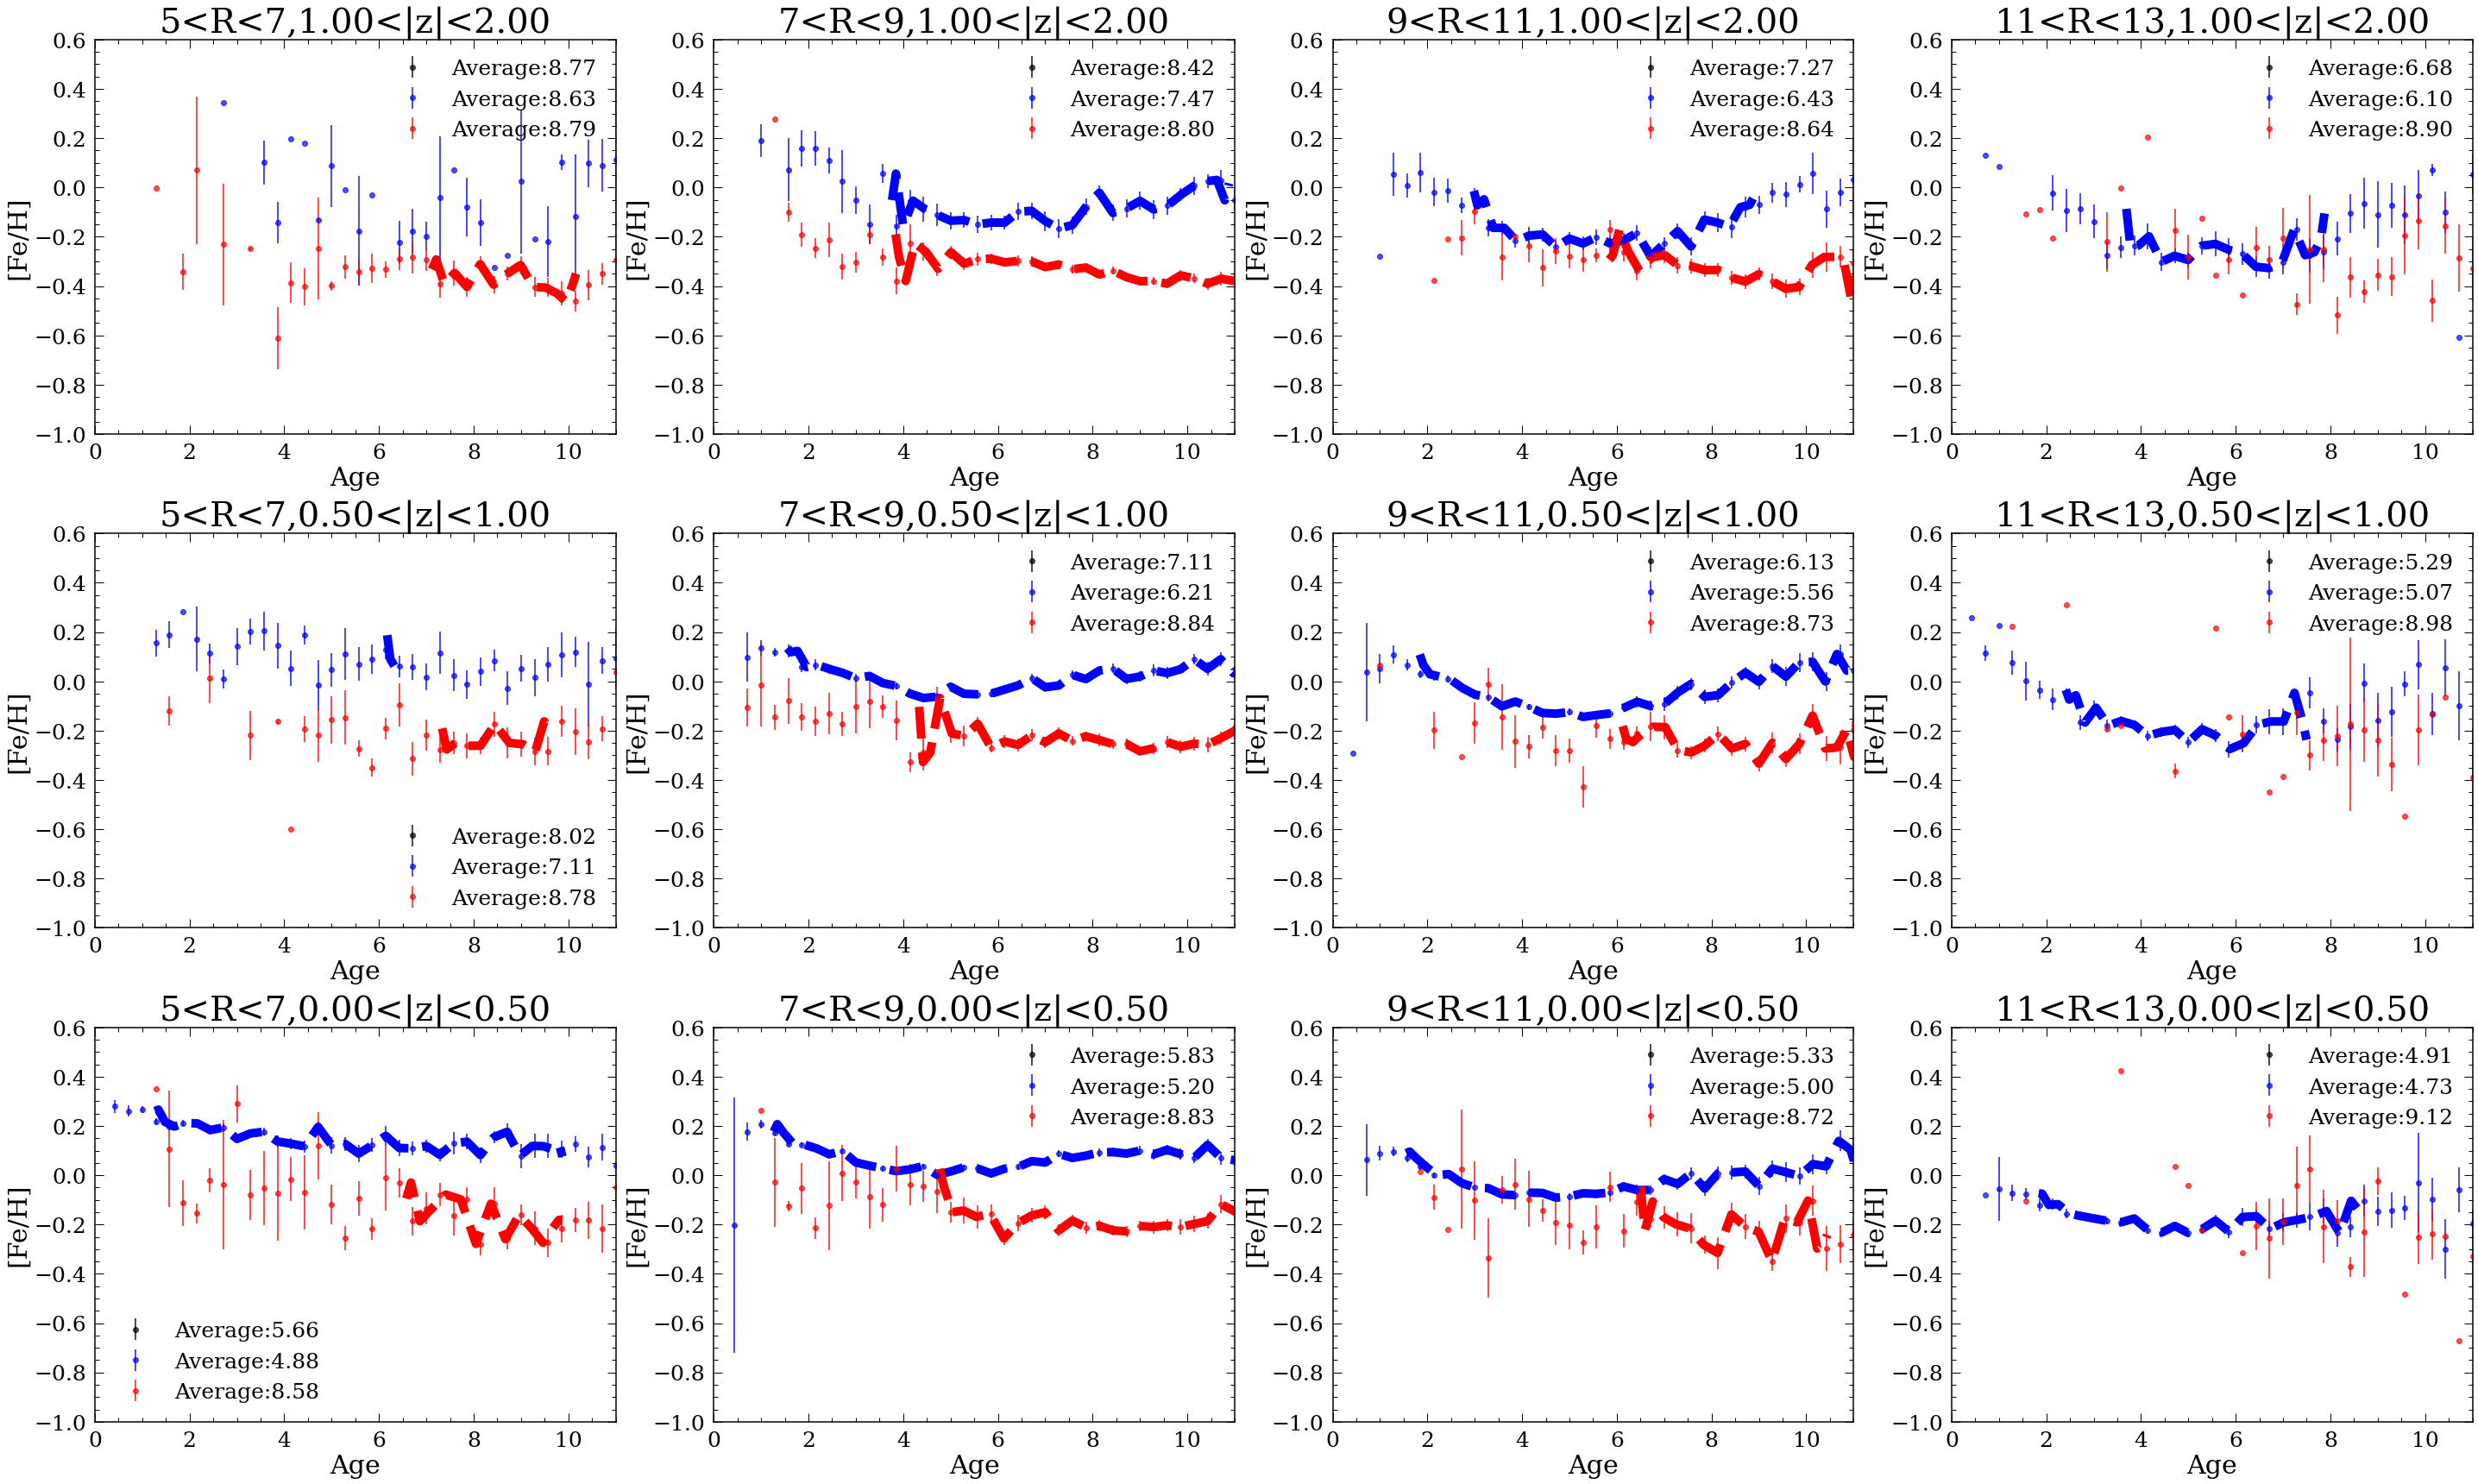

In [29]:
def getave_age(age,feh,jz=False):
    Nbin=50
    febins=np.linspace(0,14,Nbin)
    
    meanage=np.zeros(Nbin-1)
    meanage_err=np.zeros(Nbin-1)
    meanfeh=np.zeros(Nbin-1)
    starnumb=np.zeros(Nbin-1)
    if jz==True:
        meanjz=np.zeros(Nbin-1)
    for i in trange(Nbin-1):
        binlow=febins[i]
        binhi=febins[i+1]
        #print(binlow,binhi)

        m=(feh>=binlow)&(feh<=binhi)
        
        if sum(m)==0:
            continue
        meanfeh[i]=(binlow+binhi)/2
        #print(sum(m))
        
        meanage[i]=np.mean(age[m])
        meanage_err[i]=(np.std(age[m]))/np.sqrt(sum(m)-1)
        starnumb[i]=sum(m)
    return meanfeh,meanage,meanage_err,starnumb


Rbin=[2,1,0.5,0]
#zbin=[5,7,9,11,13]
zbin=[5,7,9,11,13]
plt.figure(figsize=(40,24))
count=1
for i in range(len(Rbin)-1):
    df_all=df_CM.loc[df_CM['z']>Rbin[i+1]]
    df_all=df_all.loc[df_all['z']<Rbin[i]]
        
    for j in range(len(zbin)-1):
        df_all_z=df_all.loc[abs(df_all['R'])>zbin[j]]
        df_all_z=df_all_z.loc[abs(df_all_z['R'])<zbin[j+1]]
        
        df_all_z=df_all_z.dropna(subset=['M_H','Age'])
        
        ha_bin_z=df_all_z.loc[df_all_z['hi_low_line']==1]
        la_bin_z=df_all_z.loc[df_all_z['hi_low_line']==0]
        
        #meanfeh,meanage,meanage_err,starnumb=getave_age(df_all_z['Age'].values,df_all_z['M_H'].values)
        allage=np.append(la_bin_z['Age'].values,ha_bin_z['Age'].values)
        allmh=np.append(la_bin_z['M_H'].values,ha_bin_z['M_H'].values)
        meanfeh,meanage,meanage_err,starnumb=getave_age(allage,allmh)
        
        meanfeh_la,meanage_la,meanage_err_la,starnumb_la=getave_age(la_bin_z['M_H'].values,
                                                                    la_bin_z['Age'].values)
        meanfeh_ha,meanage_ha,meanage_err_ha,starnumb_ha=getave_age(ha_bin_z['M_H'].values,
                                                                    ha_bin_z['Age'].values)
        
        
        
        clear_output(wait = True)
        plt.subplot(3,4,count)
        
        m=(meanfeh!=0)
        meanfeh,meanage,meanage_err,starnumb=meanfeh[m],meanage[m],meanage_err[m],starnumb[m]
        m2=starnumb>10
        filterage=gaussian_filter(meanfeh[m2], sigma=3)
        plt.plot(filterage,meanage[m2],'k--',linewidth=10)
        
        m=(meanfeh_la!=0)
        meanfeh_la,meanage_la,meanage_err_la,starnumb_la=meanfeh_la[m],meanage_la[m],meanage_err_la[m],starnumb_la[m]
        m2=starnumb_la>10
        filterage=gaussian_filter(meanfeh_la[m2], sigma=3)
        plt.plot(filterage,meanage_la[m2],'b--',linewidth=10)
        
        m=(meanfeh_ha!=0)
        meanfeh_ha,meanage_ha,meanage_err_ha,starnumb_ha=meanfeh_ha[m],meanage_ha[m],meanage_err_ha[m],starnumb_ha[m]
        m2=starnumb_ha>10
        filterage=gaussian_filter(meanfeh_ha[m2], sigma=3)
        plt.plot(filterage,meanage_ha[m2],'r--',linewidth=10)
        
        plt.errorbar(meanfeh,meanage,yerr=meanage_err,fmt='ko',alpha=0.7,label='Average:%.2f'%np.mean(allage))
        plt.errorbar(meanfeh_la,meanage_la,yerr=meanage_err_la,fmt='bo',alpha=0.7,label='Average:%.2f'%np.mean(la_bin_z['Age']))
        plt.errorbar(meanfeh_ha,meanage_ha,yerr=meanage_err_ha,fmt='ro',alpha=0.7,label='Average:%.2f'%np.mean(ha_bin_z['Age']))
        #plt.xlim([0,10])
        #plt.ylim([-2,0.5])
        plt.xlabel('Age')
        plt.ylabel('[Fe/H]')
        #plt.title('All stars',fontsize=25)
        """
        if count==10:
            plt.plot([4.66],[0],'bo',markersize=30)
        """
        #plt.scatter(ha_bin['Age'],ha_bin['M_H'],c='r',alpha=0.5)
        #plt.scatter(la_bin['Age'],la_bin['M_H'],c='b',alpha=0.5)
        plt.xlim([0,11])
        plt.ylim([-1,0.6])
        plt.legend()
        count=count+1
        plt.title('%d<R<%d,%.2f<|z|<%.2f'%(zbin[j],zbin[j+1],Rbin[i+1],Rbin[i]),fontsize=40)
        plt.tight_layout()
        
#plt.savefig('FeAge.png')

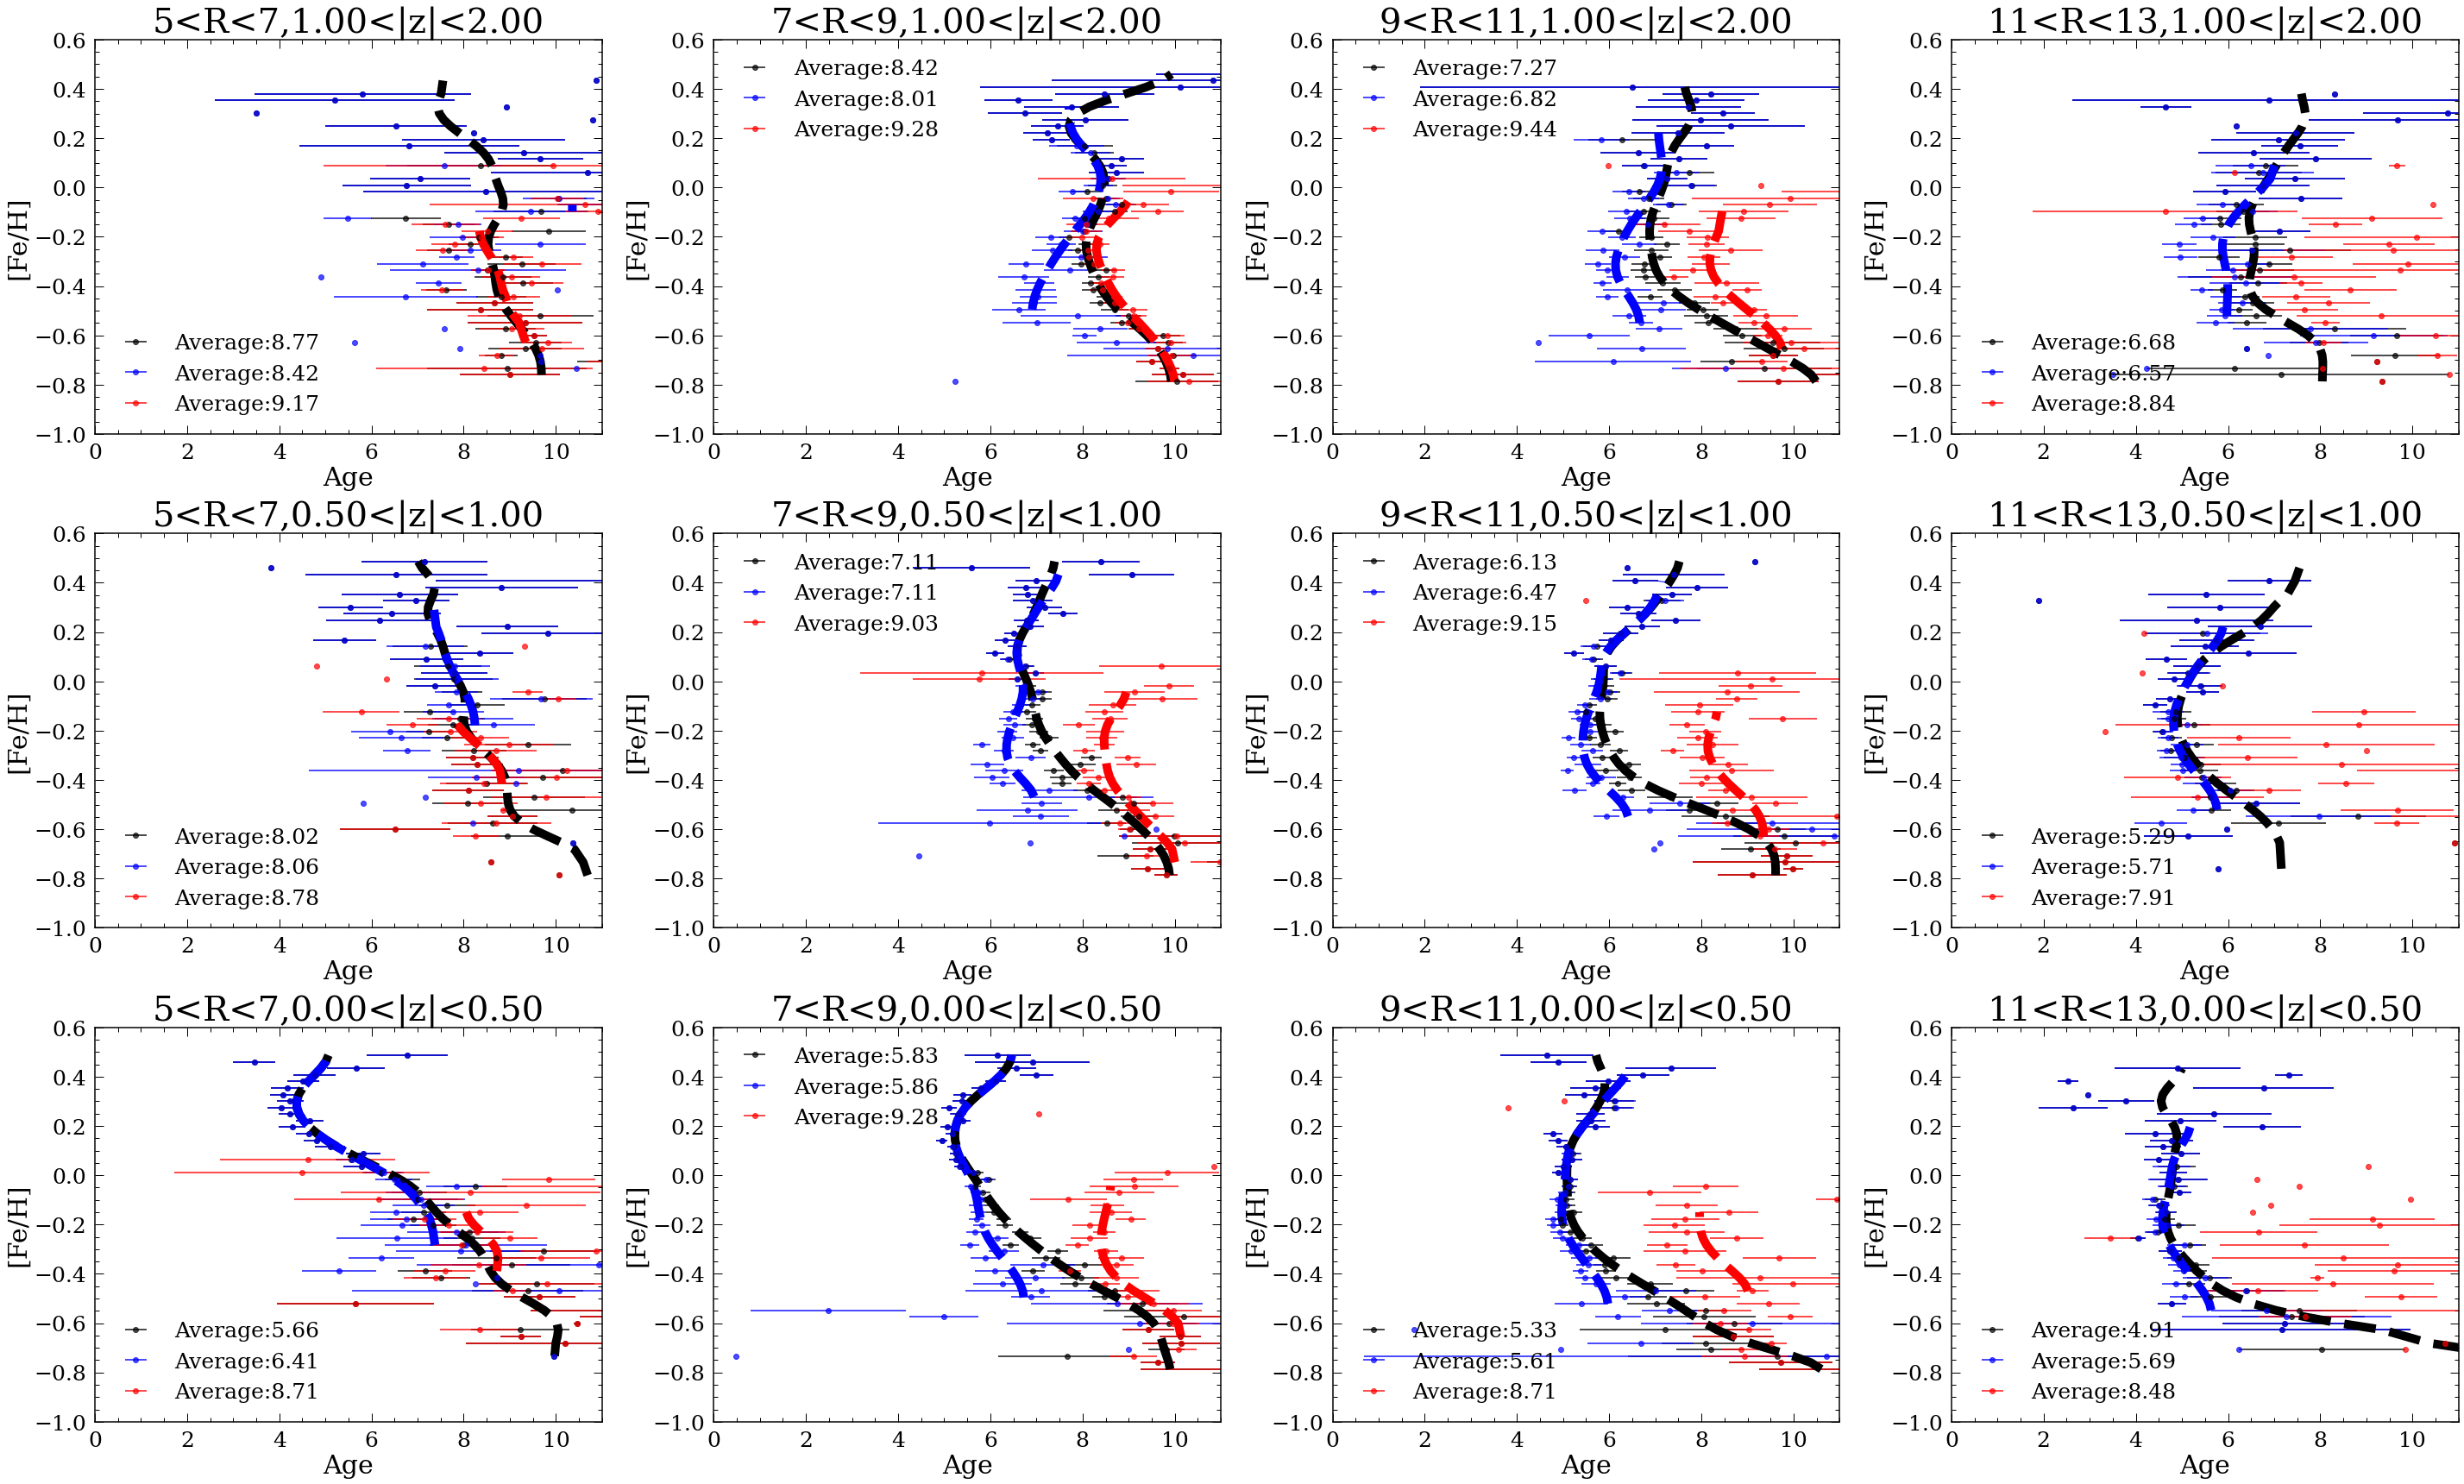

In [26]:
#Rbin=[5,7,9,11,13]
#zbin=[0,0.5,1,2]
#Rbin=[2,1,0.5,0]
Rbin=[2,1,0.5,0]
zbin=[5,7,9,11,13]
plt.figure(figsize=(40,24))
count=1
for i in range(len(Rbin)-1):
    df_all=df_CM.loc[df_CM['z']>Rbin[i+1]]
    df_all=df_all.loc[df_all['z']<Rbin[i]]
        
    for j in range(len(zbin)-1):
        df_all_z=df_all.loc[abs(df_all['R'])>zbin[j]]
        df_all_z=df_all_z.loc[abs(df_all_z['R'])<zbin[j+1]]
        
        df_all_z=df_all_z.dropna(subset=['M_H','Age'])
        
        meanfeh,meanage,meanage_err,starnumb=getave_age(df_all_z['Age'],df_all_z['M_H'])
        
        m=(meanfeh!=0)
        meanfeh,meanage,meanage_err,starnumb=meanfeh[m],meanage[m],meanage_err[m],starnumb[m]
        
        plt.subplot(3,4,count)
        plt.errorbar(meanage,meanfeh,xerr=meanage_err,fmt='ko',alpha=0.7,label='Average:%.2f'%np.mean(df_all_z['Age']))
        filterage=gaussian_filter(meanage, sigma=3)
        plt.plot(filterage,meanfeh,'k--',linewidth=10)
        
        
        colors=['b','r','y']
        for k in df_CM['hi_low'].unique():
            ha_bin_z=df_all_z.loc[df_all_z['hi_low']==k]
            meanfeh_ha,meanage_ha,meanage_err_ha,starnumb_ha=getave_age(ha_bin_z['Age'].values,
                                                                    ha_bin_z['M_H'].values)
            
            m=(meanfeh_ha!=0)
            meanfeh_ha,meanage_ha,meanage_err_ha,starnumb_ha=meanfeh_ha[m],meanage_ha[m],meanage_err_ha[m],starnumb_ha[m]
            clear_output(wait = True)
            m2=starnumb_ha>10
            plt.errorbar(meanage_ha,meanfeh_ha,xerr=meanage_err_ha,color=colors[k],
                         fmt='o',alpha=0.7,label='Average:%.2f'%np.mean(meanage_ha))
        
            filterage=gaussian_filter(meanage_ha[m2], sigma=3)
            plt.plot(filterage,meanfeh_ha[m2],'--',color=colors[k],linewidth=10)
            
            #plt.scatter(meanage_ha,meanfeh_ha,c=colors[j],label='Average:%.2f'%np.mean(ha_bin_z['Age']))
            
        
            #plt.xlim([0,10])
            #plt.ylim([-2,0.5])
        plt.xlabel('Age')
        plt.ylabel('[Fe/H]')
        """
        if count==10:
            plt.plot([4.66],[0],'bo',markersize=30)
        """    
        plt.xlim([0,11])
        plt.ylim([-1,0.6])
        plt.legend()
        count=count+1
        plt.title('%d<R<%d,%.2f<|z|<%.2f'%(zbin[j],zbin[j+1],Rbin[i+1],Rbin[i]),fontsize=40)
plt.tight_layout()
        
plt.savefig('FeAge_cluster.png')

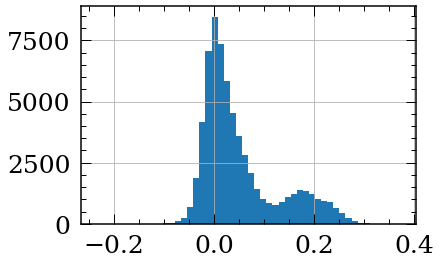

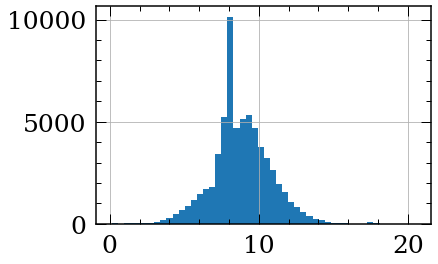

In [42]:
plt.figure()
df_CM['ALPHA_M'].hist(bins=50)
plt.figure()
df_CM['R'].hist(bins=50)

In [2]:
import matplotlib

  0%|          | 0/49 [00:00<?, ?it/s]/Users/yl4331/Desktop/SecondYear/Figures/HeaderP.py:1201: RuntimeWarning: invalid value encountered in double_scalars
  meanage_err[i]=(np.std(age[m]))/np.sqrt(sum(m)-1)
/Users/yl4331/Desktop/SecondYear/Figures/HeaderP.py:1201: RuntimeWarning: invalid value encountered in double_scalars
  meanage_err[i]=(np.std(age[m]))/np.sqrt(sum(m)-1)
/Users/yl4331/Desktop/SecondYear/Figures/HeaderP.py:1201: RuntimeWarning: invalid value encountered in double_scalars
  meanage_err[i]=(np.std(age[m]))/np.sqrt(sum(m)-1)
/Users/yl4331/Desktop/SecondYear/Figures/HeaderP.py:1201: RuntimeWarning: invalid value encountered in double_scalars
  meanage_err[i]=(np.std(age[m]))/np.sqrt(sum(m)-1)
/Users/yl4331/Desktop/SecondYear/Figures/HeaderP.py:1201: RuntimeWarning: invalid value encountered in double_scalars
  meanage_err[i]=(np.std(age[m]))/np.sqrt(sum(m)-1)
/Users/yl4331/Desktop/SecondYear/Figures/HeaderP.py:1201: RuntimeWarning: invalid value encountered in double_sc

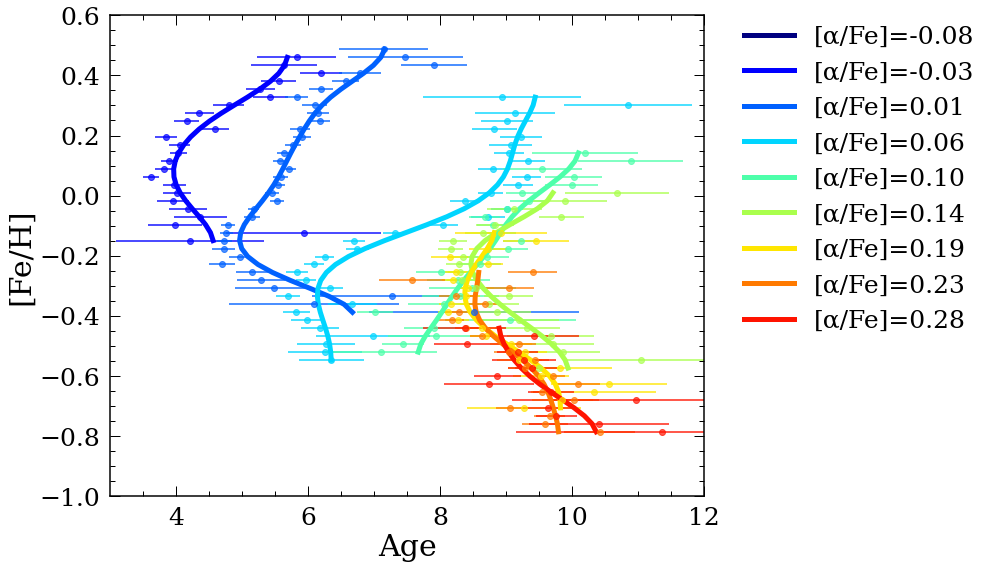

In [6]:

Rbin=np.linspace(-0.1,0.3,10)
cmap = plt.cm.get_cmap('jet')
norm = matplotlib.colors.Normalize(vmin=min(Rbin), vmax=max(Rbin))
colors_p=[cmap(norm(i)) for i in Rbin]

plt.figure(figsize=(14,8))

for i in range(len(Rbin)-1):
    df_all=df_CM.loc[df_CM['ALPHA_M']>Rbin[i]]
    df_all=df_all.loc[df_all['ALPHA_M']<Rbin[i+1]]
        
        
    df_all_z=df_all.loc[abs(df_all['R']-8)<1].dropna(subset=['M_H','Age'])
        
    meanfeh,meanage,meanage_err,starnumb=getave_age(df_all_z['Age'],df_all_z['M_H'])
        
    m=(meanfeh!=0)&(starnumb>10)
    meanfeh,meanage,meanage_err,starnumb=meanfeh[m],meanage[m],meanage_err[m],starnumb[m]
        
    im=plt.errorbar(meanage,meanfeh,xerr=meanage_err,alpha=0.7,color=colors_p[i],fmt='o')
    
    filterage=gaussian_filter(meanage, sigma=3)
    plt.plot(filterage,meanfeh,linewidth=5,color=colors_p[i],label='[α/Fe]=%.2f'%(Rbin[i]/2.+Rbin[i+1]/2.))
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.xlabel('Age')
    plt.ylabel('[Fe/H]')
 
    plt.xlim([3,12])
    plt.ylim([-1,0.6])

#cb=plt.colorbar(im)
#cb.set_label('[α/Fe]')
plt.tight_layout()  

#plt.savefig('FeAge_inAlpha.png')

100%|██████████| 49/49 [00:00<00:00, 75.87it/s]
No handles with labels found to put in legend.


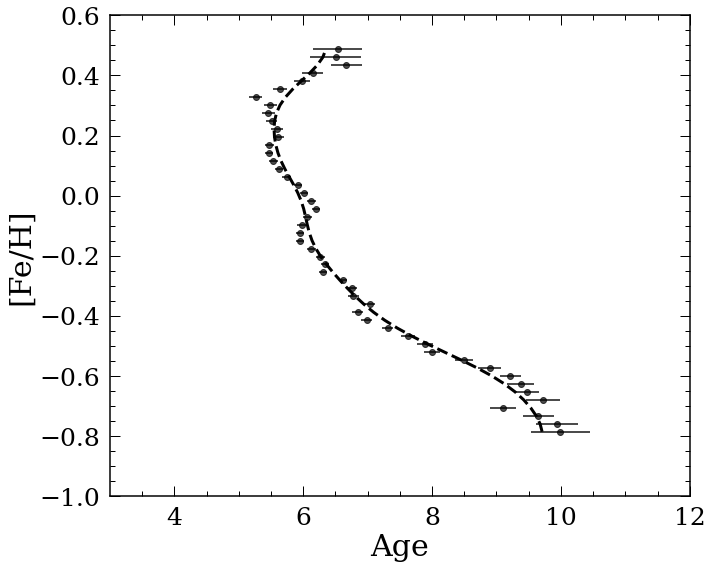

In [12]:

Rbin=np.linspace(-0.1,0.3,10)
cmap = plt.cm.get_cmap('jet')
norm = matplotlib.colors.Normalize(vmin=min(Rbin), vmax=max(Rbin))
colors_p=[cmap(norm(i)) for i in Rbin]

plt.figure(figsize=(10,8))

meanfeh,meanage,meanage_err,starnumb=getave_age(df_CM['Age'],df_CM['M_H'])
        
m=(meanfeh!=0)&(starnumb>10)
meanfeh,meanage,meanage_err,starnumb=meanfeh[m],meanage[m],meanage_err[m],starnumb[m]
        
im=plt.errorbar(meanage,meanfeh,xerr=meanage_err,alpha=0.7,color='k',fmt='o')
filterage=gaussian_filter(meanage, sigma=3)
plt.plot(filterage,meanfeh,'k--',linewidth=3)
plt.legend()
plt.xlabel('Age')
plt.ylabel('[Fe/H]')
 
plt.xlim([3,12])
plt.ylim([-1,0.6])

#cb=plt.colorbar(im)
#cb.set_label('[α/Fe]')
plt.tight_layout()  

plt.savefig('feageall.png')

/opt/homebrew/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/homebrew/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/opt/homebrew/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/homebrew/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/homebrew/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/opt/homebrew/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double

Text(0, 0.5, '[Fe/H]')

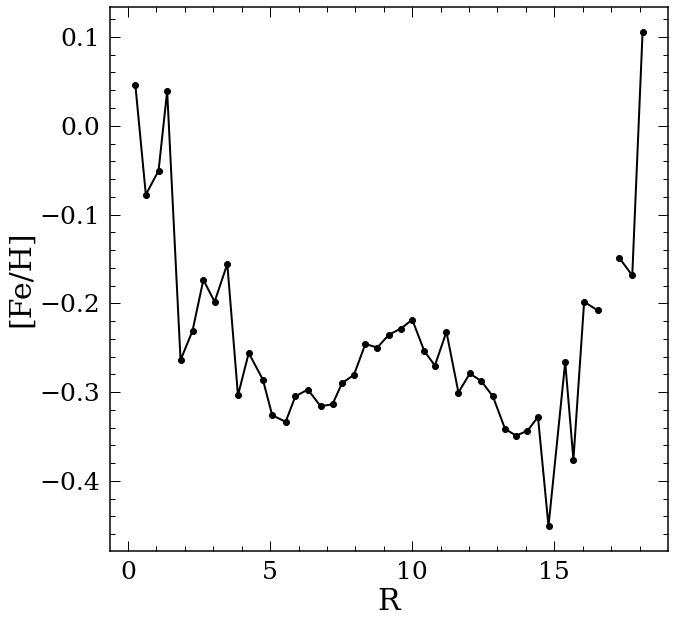

In [234]:
zbin=[1,2]
df_CM_z=df_CM.loc[abs(df_CM['z'])>zbin[0]]
df_CM_z=df_CM_z.loc[abs(df_CM_z['z'])<zbin[1]]

avefeh=np.zeros(49)
aveR=np.zeros(49)

radius=np.linspace(0,20,50)
for i in range(49):
    df_CM_R=df_CM_z.loc[df_CM_z['R']>radius[i]]
    df_CM_R=df_CM_R.loc[df_CM_R['R']<radius[i+1]]
    avefeh[i]=np.median(df_CM_R['M_H'])
    aveR[i]=np.median(df_CM_R['R'])
    
plt.plot(aveR,avefeh,'ko-')
plt.xlabel('R')
plt.ylabel('[Fe/H]')

In [63]:
pd.read_csv('/Users/yl4331/Desktop/SecondYear/papers/IndividualAbundanceTrend/APO_CAN_2021.csv')

APOGEE_ID  RC_flag    [Fe/H]      T_{eff}    Log(g)   [Mg/Fe]  \
0      2M05151428+2417349    False -0.230144  4681.049413  2.429381  0.124859   
1      2M05195482+2350417    False -0.449450  4774.993425  2.561868  0.149297   
2      2M05225734+2344337    False -0.331338  4804.005082  2.486873  0.107181   
3      2M19441366+4122541     True  0.120943  4815.302225  2.595823 -0.049038   
4      2M19442813+4119371    False -0.069200  4543.619456  2.511935  0.155229   
...                   ...      ...       ...          ...       ...       ...   
64312  2M15321226+4359404    False -0.425543  4728.588523  2.685028  0.305027   
64313  2M15340150+4317306    False -0.265547  4715.377804  2.728611  0.270722   
64314  2M15343532+4331285    False -0.021317  4562.942519  2.424942  0.031869   
64315  2M15345356+4425018    False -0.500729  4761.223077  2.695497  0.308284   
64316  2M15361301+4310171    False -0.053679  4666.960191  2.601680  0.063284   

               DP       Dnu    LogAge  [Fe/H]_err  T_{eff}_err  Log(g)_err  \
0       65.506386  4.069992  3.678858    0.131489     5.177009    0.245107   
1       40.086202  5.670519  3.839762    0.131473     5.177012    0.244260   
2       99.930008  5.684769  3.715229    0.131538     5.177027    0.244931   
3      304.012215  5.183211  3.406383    0.130871     5.176928    0.239592   
4       48.615136  5.158795  4.064674    0.131073     5.176936    0.240847   
...           ...       ...       ...         ...          ...         ...   
64312  104.188622  7.457660  3.946090    0.131857     5.177050    0.246433   
64313   69.679657  8.521639  3.997966    0.132133     5.177106    0.249302   
64314  110.293007  3.087101  3.916447    0.130836     5.176912    0.239373   
64315   97.110769  7.536125  3.936926    0.131715     5.177051    0.245704   
64316   41.515366  5.993795  3.867507    0.130876     5.176929    0.240729   

       [Mg/Fe]_err    DP_err   Dnu_err  LogAge_err          RA        DEC  
0         0.179931  6.333067  0.776250    0.086678   78.809506  24.293034  
1         0.177994  6.332850  0.776457    0.074771   79.978432  23.844934  
2         0.178473  6.333263  0.776651    0.085955   80.738934  23.742699  
3         0.172302  6.333963  0.775281    0.066865  296.056957  41.381702  
4         0.173717  6.332825  0.775943    0.061184  296.117231  41.326984  
...            ...       ...       ...         ...         ...        ...  
64312     0.175835  6.333305  0.778328    0.086832  233.051119  43.994564  
64313     0.179581  6.333463  0.780548    0.097154  233.506267  43.291855  
64314     0.171611  6.332738  0.775203    0.047745  233.647199  43.524593  
64315     0.174940  6.333137  0.778050    0.083949  233.723204  44.417191  
64316     0.172529  6.332750  0.775756    0.057686  234.054233  43.171432  

[64317 rows x 18 columns]